In [ ]:
import requests
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import random
from pprint import pprint
from bs4 import BeautifulSoup

In [2]:
YELP_TOKEN = ""

In [3]:
r = requests.get("https://api.yelp.com/v3/businesses/search?location=Toronto&limit=50", headers={"Authorization": "Bearer %s" % YELP_TOKEN})

In [6]:
print(r.status_code, r.reason, r.content)

200 OK b'{"businesses": [{"id": "r_BrIgzYcwo1NAuG9dLbpg", "alias": "pai-northern-thai-kitchen-toronto-5", "name": "Pai Northern Thai Kitchen", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/t-g4d_vCAgZH_6pCqjaYWQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=4bt_WbKZeOpn82Epm27dvg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=4bt_WbKZeOpn82Epm27dvg", "review_count": 2761, "categories": [{"alias": "thai", "title": "Thai"}], "rating": 4.5, "coordinates": {"latitude": 43.64784, "longitude": -79.38872}, "transactions": [], "price": "$$", "location": {"address1": "18 Duncan Street", "address2": "", "address3": "", "city": "Toronto", "zip_code": "M5H 3G8", "country": "CA", "state": "ON", "display_address": ["18 Duncan Street", "Toronto, ON M5H 3G8", "Canada"]}, "phone": "+14169014724", "display_phone": "+1 416-901-4724", "distance": 3009.3347434869856}, {"id": "iGEvDk6hsizigmXhDKs2Vg", "alias": 

In [7]:
r.json()

{'businesses': [{'id': 'r_BrIgzYcwo1NAuG9dLbpg',
   'alias': 'pai-northern-thai-kitchen-toronto-5',
   'name': 'Pai Northern Thai Kitchen',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/t-g4d_vCAgZH_6pCqjaYWQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=4bt_WbKZeOpn82Epm27dvg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=4bt_WbKZeOpn82Epm27dvg',
   'review_count': 2761,
   'categories': [{'alias': 'thai', 'title': 'Thai'}],
   'rating': 4.5,
   'coordinates': {'latitude': 43.64784, 'longitude': -79.38872},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '18 Duncan Street',
    'address2': '',
    'address3': '',
    'city': 'Toronto',
    'zip_code': 'M5H 3G8',
    'country': 'CA',
    'state': 'ON',
    'display_address': ['18 Duncan Street', 'Toronto, ON M5H 3G8', 'Canada']},
   'phone': '+14169014724',
   'display_phone': '+1 416-901-4724',
   'distance':

In [13]:
#requests.get(reviews['reviews'][0]['url']).content

In [4]:
#Scrape the content from the business URLs obtained from the business API. Iterating these URLs using "&start=%s" to fetch 
#reviews from multiple pages. The limit for the same has been set to 80 along with 50 for businesses, 
#fetching 100 reviews per restaurant for 50 restaurants. This gives us a total of 5000 reviews.
review_labels = []
for business in r.json()['businesses']:
    start_count = 0
    reviews_raw = BeautifulSoup(requests.get(business['url']+'&start=%s' %start_count).content, 'html.parser').find_all(itemprop="review")
    reviews_count = len(reviews_raw)
    print(business['name'] + '\n\n')
    while reviews_count != 0 and start_count <= 80 :
        print('reviews_count - %s \n' %reviews_count)
        print('start_count - %s \n\n' %start_count)
        for rev in reviews_raw:
            rev_desc = rev.get_text().strip('\n')
            rev_rating = rev.find(itemprop="ratingValue")['content']
            review_labels.append((rev_desc,rev_rating))
            print((rev_desc, rev_rating))
        start_count += 20
        reviews_raw = BeautifulSoup(requests.get(business['url']+'&start=%s' %start_count).content, 'html.parser').find_all(itemprop="review")
review_labels

Pai Northern Thai Kitchen


reviews_count - 20 

start_count - 0 


("I'm a thai foody, so I had to bring my colleagues during lunchtime and boy, was there a wait! Tip: Learn from my mistake, and call to make reservation in advance.\n\nThere's lots of great selections. I would recommend 4 dishes for 3 people to share together. The khao soi was amazing. Very rich sweet salty soup full of coconut taste and flavourings. The papaya salad is always great; it's soaked in tamarind sauce giving it a sweet & sour taste. Writing this makes me hungry for the thai food again~", '5.0')
("Super packed on a Monday evening. Grateful for the coat hangers. It's the small things.\n\nTwo of us split the pork skewer appetizer. VERY\xa0 good with a slightly sweet taste. My friend liked her pad thai. I always end up getting pad thai so opted for the Thai fried rice. It was good enough and comforting but I probably should have paired that with a curry etc. Portions are massive; there's no way you can finish o

reviews_count - 20 

start_count - 20 


("Alright, alright, I'll grant the coveted 5th star. The food was amazing, but while the food came out fairly quick, the service seemed overwhelmed by the business that evening (a little short handed perhaps?). They were, however kind enough to permit me to swap the Spicy P for something else, more on that later.\n\nThis place is popular and gets packed quick. Saturday at ~4:30 there was hardly a spot left, I got lucky and was able to snag a seat at the rear bar.\n\nThere was a little bit of a queue for the Host Stand which moved a little slow. To the staff's credit, it seemed like they were juggling a lot: seating guests, phone calls, etc. \n\nI started off with the Spicy P to drink, and it was fire! Don't get me wrong, it was quite tasty, until you transformed into a fire-breathing dragon. Mind you I have a higher than average heat tolerance.\n\nThey were kind enough to let me swap it for something else, and I opted for The Serge Protector.  T

reviews_count - 20 

start_count - 40 


("A group of friends and I visit Toronto annually in July and we've been trying to get a reservation to Pai for the last 3 years. It's always been fully booked over 1-2 months out, but this year we finally made it to lunch! I was always inspired by Pai's history and how they started the restaurant, so I was really excited to taste the food.\n\nThe inside feels stylish, hip, and authentic. The atmosphere is pretty dim especially since it's in the basement level so there isn't much natural light. We were immediately seated at a long bar-height table. For drinks we all got the thai milk-tea which was really refreshing.  For appetizers, we got the grabong (really crispy and great to share!) and kung tawt. \n\nFor entrees, people at our table ordered the Khao Soi, Pad Gra Prow, Green Curry, and Pad Thai. I got the Khao Soi with beef and farang spice, and I think it was my favorite by far. The golden curry soup base was super creamy and rich in flavor

reviews_count - 20 

start_count - 60 


("Haven't had much Thai food in Toronto but I'm glad we stumbled upon this place.  The decor is really nice inside, makes you feel like you're in a Thai market.  The food here is insane.  We ordered 5 different dishes to share with the table and I cannot think of a single dish that disappointed.  My favorite overall was the Laap salad(recommended by the server).  Come here with a big group, have a few drinks or sake bombs, and enjoy the delicious food.", '5.0')
("Almost a year after my first visit which was not as exciting and ended with a three-star review. \n\nThis visit was very different, my cousin was visiting and she wanted to have Thai food and this was the closest place. We were seated within 15 mins (minus reservation on a Wednesday afternoon) and got to try their traditional seating which was very comfortable. \n\nWe ordered the fried Tiger Shrimp, Chicken Fried Rice, Beef Panag Curry, Mango Sticky Rice, and Thai Iced Tea. The Iced Tea

reviews_count - 20 

start_count - 80 


("First off, don't get me wrong with the star rating. I rated based on my taste buds and in general with my experience. \n\nWe arrived around 845pm, had to wait approx. 20mins for our table. There was a line all the wait to the road outside extend from inside the restaurant. We took their offer with bar seating, which we don't mind at all. The restaurant was bigger than I imagined. it was hallway after another hallway leading to another bar area. \n\nThe bartender/waiter was super nice, super friendly and knowledgeable with the menu offers. He was honest with what was good and what was mediocre. \nWe ordered based on his recommendations; and it wasn't bad. \nBut it certainly didn't satisfy my cravings at that time since they don't offer what I wanted from my mind.\n\nOrdered: laap salad, chicken wings, pad gra prow with beef and crispy pork, and hunglay oxtails. \n\nLaap salad- was really good, probably would order again if I come here again. It

Seven Lives Tacos Y Mariscos


reviews_count - 20 

start_count - 0 


("Wow, the most intense tacos I've ever had! Don't go expecting to have a sit down meal and please do yourself a favour and don't go on a date here because you will get messy. I promise you it's all worth it.\n\nWait in line and order at the cash, wait for your tacos and hope there's a seat. We were there at 3pm on a Saturday and we managed to squeeze in at the bar table. You can always take out but I think dining there is also part of the experience. \n\nThe tacos are massive! I thought 2 wouldn't be enough but it was more than enough. They also have many different hot sauces you can add. Never have I eaten tacos with a fork but trust me, these are very big and I had to eat half the inside before I was able to somewhat grab them.\n\nI believe they're opening a larger location across the street, I think it's much needed to keep up with the demand!", '5.0')
('We were extremely excited to try this taco spot during our

reviews_count - 20 

start_count - 20 


("Being used to seafood on the West Coast, my expectations for Seven Lives was pretty low to begin with. Seven lives looks unassuming from its store front but once you walk through the front door, you'll be greeted with a waft of beef cheek and pork shoulder grilling on the flat top. \n\nThe ordering process is simple. Your order is taken down the conventional way and only cash is accepted. Although at first it seems that ~$6 is expensive for a taco, the double tortilla taco is very well made and is worth every dollar. You have a host of sauce choices ranging from mild to spicy. I chose to go with the spicy given my affinity for all things spicy. It was actually more flavourful than spicy which was a pleasant experience. \n\nThis taco shop nestled at the heart of the charming Kensington market is a must visit when in Toronto. The authentic music, lack of table space and endless lines are all part of a visit-again experience.", '5.0')
("Small pla

reviews_count - 20 

start_count - 40 


("4 stars mainly because I had no idea what was going on inside. Madness of people waiting for a single register that is cash only.. tough for my dumb American tourist self.\nOnce you figure it out, the food is amazing. There's only 1 table and a couple barstools at a shelf so be prepared to take your food to go.\nI guess it felt original/authentic as it doesn't look like they've made an update to this place I years.\n\nGo for the food, it's worth the rest.", '4.0')
("Two words. BOMB TACOS!!\n\nLocated in Kensington Market this small taco spot serves some of the most delicious tacos I have ever had. My boyfriend and I ordered the following: Gobernador, Carnitas, and Pollo Asado. All three tacos were delicious but the Gobernador was my favorite. It comes with shrimp and smoked marlin and the sauce really tied the whole taco together. They have sauces and limes on the counter if you want to add them to the tacos. At $6 CAD per taco the portion siz

reviews_count - 20 

start_count - 60 


('Best tacos in town. You have to line up most of the time, but the line continues quickly. Not much of a sitting area so in nice weather you can take out and eat outside.', '5.0')
('TLDR: Cash only, not much seating, small boutique, long line, $6+Tax - with lots of filling. \n\nI came here on a Thursday, rainy/wet evening, and to my surprise, it was still very busy! It is located in Kensington market, and my friends said it was a go to place for tacos! When I took a look at the menu and saw Grilled Octopus, I had to get it (I love grilled octopus tacos)! When I got the order (about a 5 minute wait), it was huge and I could not wait to dig in! My friend got the Smoked Shrimp and Cheese. The taco was very hot (temperature wise) - it looked like diced octopus stirred with a lot of celery. I took the first bite and it kind of felt like the taco was missing some flavour - the celery was very over powering! I also got a chance to try my friends Smoke

reviews_count - 20 

start_count - 80 


("if you come here to order tacos please order the beef or pork taco. i've just absolutely loved the beef and pork taco every time i come by. \n\non a friday evening, the store ran out of beef and pork taco. so i got the grilled chicken taco instead. the taco isn't that good.... and just was not worth the crazy line up for. looking on the bright side, at least now i know to never line up when the beef and pork tacos ran out! \n\nthe store is super small so be prepared to stand outside the store and eat your take out taco!", '3.0')
("My new favourite taco place- unfortunately I don't get out to Kensington too often.\n\nAlso made the mistake of coming here on one of the hottest days of the year- this place DOES NOT have a/c and it's VERY hot inside. \n\nI thought I could crush two of these easily- but they're more filling than you think. I got the Gobernador and the Cabeza and I didn't have space for the taco shells of the latter taco. I ate the i

KINKA IZAKAYA ORIGINAL


reviews_count - 20 

start_count - 0 


("Not from the area but absolutely enjoyed my lunch here! I wish I was able to visit again to try the dinner tapas portion. \n\nLunch options weren't a lot, but my lunch set tasted so good! Also the place radiates terrace house vibes...", '5.0')
("Everyone seemed like they had a good time except for me. Yes, I was there at the busy hour on Friday. Yes, my server was new and had to take care more than she could handle  (approximately 10 tables by herself). Yes, their famous performance sounds cool, and looks cool but after 4 times, you start wondering they could've delivered at least 70% their orders while every employees are screaming and banging the wall. \n\nI have ordered 3 appetizers and the service was moderate. However, when I ordered second round of drinks, I had to wait 40 minutes to come out, even though I asked more than 3 times when will they be coming out. \n\nAfter an hour of waiting (set on timer) I decided 

reviews_count - 20 

start_count - 20 


("Hubby and I were in Toronto for the holidays and we were in the mood for some Japanese. Came across this restaurant and decided to try it based on the #of reviews here on yelp and we absolutely LOVED it!\n\nWe both got the set menu deal, $40 per person and we thought we would get at most 4 dishes but we got like 10 dishes including ice cream as a dessert! We were enjoying the food so much that I forgot to take pictures of 2 dishes we received, which were the KAARAGE (deep fried chicken) and GINDARA (grilled miso cod). Their drinks were delicious too. I had the Lychee Vodka drink and my hubby had the plum sake on the rocks.\n\nLoved the ambiance, the environment. The noise didn't bother me.. it's just a fun and buzzing restaurant and one we had absolutely no complains about.\n\nA must try and a would go back!", '5.0')
("Ambiance: The restaurant is loud and energetic, but is beautifully designed and has such a great overall warm feel. All the se

reviews_count - 20 

start_count - 40 


('upon stepping in, Kinka already captures your attention right away as all the waiters will shout in Japanese to welcome you to restaurant. even though we came at 5 there were still a lot of people surprisingly. we asked for recommendations from the waiter since it was our first time here and he took the time to show us some of our favourites. \n\nas an appetizer we got the wasabi octopus which was $5.2. when it came we were surprised by how small it was. it was a little bowl with the octopus and 6 pieces of seaweed. the octopus was good but the wasabi was a little overpowering and made our noses hurt. I would not recommend this as it is expensive, the portion is very small and it hurts 2/5\n\nfor main we got the torched salmon sushi and the eel bimbimbap. the sushi was perfect, it came with 6 big pieces. every bite taste great and had a slight charred taste. the salmon was soft and tasted fresh 4.5/5\nthe eel bimbimbap was also amazing. the wa

reviews_count - 20 

start_count - 60 


("The food here tastes great, very well seasoned and cooked to perfection. Portions can be very small.\n\nThe service, however, could be a hit or miss. When we went in a large group with a reservation, we weren't seated or served for 15 minutes. A bunch of had to stand around to in our winter coats and scavenge for empty tables and seats.\n\nPrice-wise the food items are pretty expensive, and as previously mentioned, the portions are super small. Not a place I'd go to get full off of. \n\nThe atmosphere is very loud to imitate how izakayas are like in Japan.", '3.0')
("Kinka Izakaya is authentic Japanese cuisine that has successfully infiltrated the Toronto food scene. Originating from Japan, the restaurant has authentic Japanese food that comes in small portions, perfect for trying a variety of. The prices are decent, and there are lunch specials that won't break the bank. One of the vegetarian options that we tried was the seaweed and tofu sal

reviews_count - 20 

start_count - 80 


("We came around 6pm on a Friday. As soon as I walked in, this place reminded me of Guu. Even the specials menu had the same font as a Guu I've previously visited. \n\nWe started off with a pitcher of Sapporo and ordered a bunch of Japanese tapas, mostly fried. \ntakowasabi - marinated octopus w/ wasabi stem. the wasabi is incredibly intense, be careful of having too much in one bite unless you love that refreshing wasabi feeling.\ntakoyaki \nokonomiyaki\nFried brie - for cheese lovers\nScallops - not as good as the Guu in Vancouver since it was smaller and less flavorful. still good value imo.\nkaraage\ndeep fried calamari \n\nBeer paired well with all the fried foods, so I'd highly recommend that. Had a festive time here with the good company, drinks, and food. 2 hour seating maximum in case you have too much fun.", '4.0')
('One of the most memorable experience so far in Toronto. Fantastic place with an amazing atmosphere and food.  Seat on th

Banh Mi Boys


reviews_count - 20 

start_count - 0 


('AMAZING Vietnamese Sandwiches!!!!\nAMAZING Vietnamese Sandwiches!!!\n\nThis stop was pre-planned for our trip to Toronto based on the awesome reviews and I wanted to have different cuisines while in town. When we arrived in Toronto, this was our first stop for a quick bite. but I was lucky that the parking we found was walking distance to the GEM!. \n\nIt\'s a boutique restaurant franchise with limited seating and people tend to order, sit and eat if there\'s available seats and then leave. We were lucky to get seats as it was a busy Friday afternoon. \n\nI could tell my sisters were skeptical about the cuisine based on their facial expressions cause they never had this before. We ended up ordering a 5 spice pork belly, grilled chicken sandwiches, a grilled chicken Taco and fried chicken Bao. Everything was delicious from there reaction.\nThey were really impressed by taste and crunchiness of pickled toppings paired with the sauc

reviews_count - 20 

start_count - 20 


("Came here for late lunch and the place was empty. The seating is very limited so I can imagine the place getting crowded quickly.\n\nYou order at the counter and they call your name when it's ready.\n\nI and my sister shared the grilled chicken bahn mi and kimchi fries. I definitely recommend getting the fries, they were really good and the bahn mi was great as well. The meat in both fries and sandwich was full of flavor. \n\nThese two items was enough food for two people. \n\nThe service is fast but I was disappointed by the cleanliness of the place. The tables were dirty so I had to wipe it off with a tissue paper.\n\nParking can be hard to find in the area.", '4.0')
("It was the start of our Toronto food adventure and Banh Mi Boys was first on our list! Interior of the place is really small so expect to be standing if you plan on eating here! It does get packed and everyone seems to come here and I can see why. \nWe went with the grilled po

reviews_count - 20 

start_count - 40 


("Completely satisfied my Banh Mi craving! Coming from Vancouver where you can't find a banh mi for less than $4.50 (and that's at a grocery store), and the fact that I get to choose the type of meat I want (I only eat chicken), for a few dollars more ($7.00), is a pretty good scenario. I also love that they have a veggie option - lemongrass tofu - that I will be trying the next time I stop in. \n\nBMB is more of a to-go place; there are seats in-house, about a dozen or so if you want to eat-in instead. Service is super quick and friendly. We came just before noon on a Saturday; sat for about 20 minutes and noticed the door opening and closing nonstop with people coming in either to pick-up or sit down. Place is clean and presentable. Will definitely be back the next time I'm in the area!", '4.0')
("Maybe this is because I'm Vietnamese, or maybe it's cause I'm crazy but I didn't enjoy BMB like everyone else seems to. \n\nPerhaps it was overhyped

reviews_count - 20 

start_count - 60 


("Always delicious! I ordered the chicken banh mi and it's fantastic. Bread is always soft, lots of fillings. Great place!", '4.0')
("Small joint that can get really busy. Personally wouldn't wait long, but the eats here are tasty.\nThink of Viet subs with a Asian fusion twist. Eg. They out Korean and Japanese toppings on a Viet sub, or Taco or Bao. \n\nGreat for a small snack. My Faves are the Baos. I've tried all of them and they're all good.\n\nIMO service is a tad slow for such a small menu, but they're all really nice.", '4.0')
("My first time eating a Banh mi sandwich and oh my god it's soooo good! I got the grilled pork Banh mi ($6.50) and it's amazing. I usually hate carrots but in this sandwich I'm starting to like them. Can't wait to try the rest of the menu.", '5.0')
("I've been looking for good Bao for a while now, and this place has it. Unfortunately, i don't live in Canada, but I would definitely stop back again.", '5.0')
('This pl

reviews_count - 20 

start_count - 80 


("This has been my go to place for take out for the last year. Pair a simple banh mi with some fries and you got a huge meal that'll keep you satisfied. They also have baos there if you're over the whole banh mi scene. \n\n\nIt's quick, easy, and definitely very tasty.", '5.0')
("The Tofu Kimchi Fries are a guilty pleasure of mine. At $7.50 they are cheaper than Smoke's poutine and have really tasty ingredients. The squid banh mi is another (healthier) go-to but I find it a little overpriced. Nice chain with consistently good fast food. For a smaller, cheaper banh mi check out Nguyen Huong on Spadina.", '4.0')
("THIS PLACE RECIEVED 4 STARS FOR THEIR KIMCHI FRIES ONLY. \n\nIf you want real banh mi go to Nguyen Houng at Jane and Wilson lmao this places' banh mi is okay; like their flavour was directed towards more white people than it was towards actual Vietnamese people. \n\nTheir cashier that day was really really nice and the enviroment seemed 

Richmond Station


reviews_count - 20 

start_count - 0 


("Went here for dinner on a Wednesday evening around 6, and it was quite busy! I tried the duck liver mousse, rabbit fettuccine, and the dessert special at the time - carrot cake. After having three different dishes, I had nothing to complain about after my meal! \nThe duck liver mousse was a really good texture, and the raisin bread went well with it. The rabbit fettuccine had a good amount of rabbit and butternut squash in it, where I wasn't overwhelmed by just a mountain of pasta. The carrot cake cake with ginger sorbet, which actually paired really well with it! \nDefinitely worth the price, my total before tip was around $60 and I was pleasantly full.", '5.0')
('Every restaurant has a signature dish that is unique to them.  The Chicken Fried Oyster Mushrooms ($12) is that special dish I have not had at any other restaurant, including Michelin Star restaurants.  The crispness of the light batter and the tenderness of the mu

reviews_count - 20 

start_count - 20 


('An overall great dining experience!\n\nI came for a birthday and made sure to make reservations before as it is a very popular spot.\n\nThe service was attentive and on point. The overall ambience to the restaurant felt very relaxed and local but also elegant. \n\nI was seated closer to the back next to the chefs table. I ordered a chacutorie board which came with house baked sour dough. It was very tasty! The bread was not too dry and very fresh while the board was a very nice appetizer to start.\n\nNext I ordered the lobster spaghetti and my boyfriend ordered the lamb done two ways. The sauce to my pasta was rich but not to heavy balanced with chunks of lobster certainly made the spaghetti very flavorful. The lamb was also juicy and done very well made in three unique ways paired with perried eggplant. \n\nLastly since it was a birthday I ordered honey and milk dessert as finish. It was a light and rich dessert to finish off a intimate yet c

reviews_count - 20 

start_count - 40 


("We went at a slightly odd time during our recent trip to see this highly rated restaurant. The ambiance was nice and quiet, and the food varied a bit. But it was a good meal, and would consider it for another visit if I were local.\n\nThe flavors were fairly mild, which was a refreshing change of pace. I think what threw me was the timing of the meal, to be honest... between lunch an dinner, where I was neither starving or stuffed. \n\nThe cocktails were also great as well. Smooth, delicate, and refreshing.\n\nOverall, I think the subtlety of our selections weighs on the review a bit. While my dish was tasty, it didn't scream for attention to my tastebuds. But the desserts were noteworthy. Looks like they do certain ones on a daily basis based on what's available so if something new and interesting is on offer, best to give it a try.", '3.0')
("Finally found a great time to visit this special bookmark. \n\nFor my dads 66th birthday i reserved 

reviews_count - 20 

start_count - 60 


("This is my third time at Richmond Station. The first time we went for the chef menu at the chefs table. What an outstanding experience. The service was exceptional and the food was comparable to Michelin starred restaurants that I've been to. The value that you get for the tasting menu is amazing especially when you compare to some of the NYC ones. \n\nThe second and third time, I came here for the Station Burger. Perfectly cooked to medium rare. The beet chutney really balances out the saltiness of the patty. Every bite was a delight. \n\nWill be back many more times. It is a true gem in Toronto.", '5.0')
('Had a fantastic experience in this spot with my friend. The food comes rapidly and the service is just excellent. Prices are fair.', '5.0')
("!do not come here! \n\nright after we paid for a $400 bill, they kicked us out after my graduation dinner because they had another table coming ??? time manage better\n\n food was mediocre but the se

reviews_count - 20 

start_count - 80 


("Incredible food, and deceivingly filling.\n\nI had the roasted eggplant-based appetizer, and fish as my main. Both were delicious, blended multiple flavours, and incorporate different textures. Even the accompaniments, like the sauces on my plate were delicious on their own! Plus, the free bread is one of the best I've had and  ensures you leave this place full.", '5.0')
('Did not disappoint.\nService was great - it was me and my bfs anniversary and they started us off with cava on the house. They checked in on us enough to feel like we were taken care of but not so much that it was annoying.\nEverything I ate was so so good. We got the portobello mushroom wellington starter, super yummy and flavourful. And for my main I got the harvest chicken. Also equally delicious. Portions were also surprisingly decent! \nI want to go back and try their other dishes now...', '5.0')
('Was out looking for upscale food for my family- wandered upon this resta

Byblos


reviews_count - 20 

start_count - 0 


('Read about it as one of the top-100 restaurants in Toronto and more than lived up to the hype.  The place had a nice cool but casual vibe.  Service was very efficient, water and wine were constantly kept full and service was always present but not obtrusive.  \n\nThe food was the highlight.  We were a group of 4 and share four dishes from the starter side of the menu, three mains, a rice and a couple of veg.  For the starters, the highlight for me (for the meal actually) were the lamb ribs.  Also really enjoyed the hummus with wagyu.  My only disappointment was the ahi, it did not have as much flavor as I expected (and tuna is one of my favorite meats).  I also expected it to be slices rather than a tartare diced style.  Not bad but not as great as the ribs or hummus.\n\nFor mains, we went with the signature dish, lamb shoulder, which was excellent and a very good sized portion.  I also enjoyed the middle eastern fried chicken, lots of

reviews_count - 20 

start_count - 20 


("No complaints about anything! I'm sort of surprised at some of these reviews. We were promptly seated upon arriving. The decor and ambiance are chic and laid back. \n\nOur party of 4 wasn't exactly ravenous so we ordered less than the recommended amount of dishes. We got the beet and labneh, oxtail dumplings, lamb shoulder for two, short rib kebab, tah dig, and fries. We were STUFFED. Everything was hearty and delicious. The balance of flavors in each dish was great, especially the tah dig and short rib kebab. Those were probably my two favorite things. All of the meats were perfectly cooked and super tender. \n\nDinner was less expensive than we thought so that was a plus on top of everything. I would definitely recommend it for a dinner date with friends or a partner.", '5.0')
("Hi Yelpers!\n\nSo for a few days I'll be in Toronto!\n\nArriving this afternoon we decided to go to Byblos since I saw many IG posts.\n\nWe ordered Turkish manti dum

reviews_count - 20 

start_count - 40 


("I made a reservation for a special occasion here and requested a quiet table for an anniversary celebration. They put us at one of the noisiest places upstairs right in front of the kitchen for that matter; which had a cold draft blowing onto our table. \n\nOur server barely came to check on us and to top it all off the food was lack lustre. Being Lebanese myself I was expecting an amazing melding of middle eastern flavours done in a new fusion style. Not what I got at all! For the prices that you pay here there are better places you can go. \n\nThey also didn't even acknowledge that we were celebrating an anniversary at all! Didn't even mention it! \n\nFor those reasons I give it 3 stars based on quality of flavours and lack of good customer service. \n\nOh also forgot to mention we arrived right on time! And our table wasn't even ready yet. We had to wait even though my reservation was made days before. \n\nI really hope they step it up here

reviews_count - 20 

start_count - 60 


('Byblos is that place in town that opened a few years back to much fanfare. Most of the time, these places tend to cool after Toronto Life or other local outlets move on to the next hot spot. I really liked it when I went back then, yet love it now. Based on the meal I had in early October 2018, I consider this one of the top few restaurants in town.\n\nIf you like delicious food with varied influences from the Middle East and Mediterranean, you will love this. I left here thinking, "I have never had lamb this good. I have never had eggplant this good. I have never had mussels this good." And on it went.\n\nByblos is festive, fun, and hip, yet do not be fooled. The vibe is secondary to some seriously delicious food and expertly-prepared cocktails.\n\nHands down one of the best restaurants in Toronto.', '5.0')
("One of the best dining experiences in Toronto to date. \n\nMy parents, brother hubby and I came here in the summer for a special dinner

reviews_count - 20 

start_count - 80 


("This place is the bomb.com, now I know what your thinking... who still says bomb.com? Not me, but I was at a lose for words!\n\nFood (5/5)- I would love to give you a rundown of what you should order but to be honest it's all perfect. Ok ok fine, your nervous here are your must try items: Lamb shoulder, anything with zaatar in it especially the fried chicken, and please for the love of god save space for dessert and get the stuffed baklava and the  Orange blossom mousse (I know not a very appealing name, but I didn't say they were marketers, just great foodies).\n\nDrinks (5/5)- The cocktails are to die for! But if you want to feel extra cool (which is my usual m.o.) get the tea punch service. Yeah, it feels like your getting buzzed in an Istanbul alley watching local street performers as you sip your spiked tea from colorful intricate designed glasses. Sigh, can you tell I miss Turkey?\n\nService (5/5)- How can they always have friendly and h

Bang Bang Ice Cream and Bakery


reviews_count - 20 

start_count - 0 


("Bang bang bang. This place was actually kinda hard to find without the GPS. There was nothing really indicating that was the ice cream shop besides the light banner that says ice cream but I wasn't sure if I was at Bang Bang ice cream if that makes sense. \n\nBut regardless the ice cream was pretty good. I don't think it blew me away because I've had alot of good ice cream but I will say all of the flavors were really unique. I got the lychee rosewater and it was amazing. It was lychee ice cream with raspberry flavors swirled in it. I also sampled the totaro and I will say the taro ice cream was definitely something I would come back and get", '5.0')
("Interesting selection of flavours that are a well balanced mix of nouveau to the classics. I had the matcha genmaicha blend, which had real bits of genmaicha (rice tea) mixed in. I appreciated it because the genmaicha cuts down on the sweetness and gives it a more

reviews_count - 20 

start_count - 20 


("Was it worth the wait? Of course! The line was out the door and down the block, but moved quite fast. I visited on a cold, windy Friday night. A perfect night for ice cream if you ask me. \n\nThe store itself is very small and has no indoor or outdoor seating. People pretty much order and eat their treats outside or as they walk away. \n\nThey offer over 30 flavors and you can get it served in a cup, cone, between two cookies as a Sammie (sandwich), or in a puffy waffle cone which is made fresh to order. \n\nThe staff is really friendly and efficient. They let you sample the flavors you're interested in and it makes it easier to make your selection. \n\nI got the Cinnamon Toast ice cream in a Ginger Cookie sammie half, and it was big enough to satisfy my sweet tooth cravings. \n\nMy group also got the Flin Flan in the Everything Cookie, Golden Oreo in a Birthday Cookie, and Fresh Mint in the Everything cookie.", '5.0')
("I was really excited t

reviews_count - 20 

start_count - 40 


("If you're looking for unique ice cream flavours, this is the place to go to! Although there are usually long lines in the summer, it's so worth it!\n\nMy top 2 flavours is - London fog and Avocado! \nI always get my scopes in a waffle cone. \n\nThey are open all year long, so it's never too cold for ice cream!", '5.0')
("This ice cream store has such a wide range of flavors to choose from that I was very overwhelmed when I first arrived. I love that they allow you to choose 2+ flavors even if you just want half a cookie sandwich. I ended up getting the London Fog (earl grey tea) and dark chocolate with a captain p'nut cookie. I really enjoyed this combination of flavors. The textures were perfect together. I highly recommend the captain p'nut cookie if you are a fan of peanut butter! Be aware that there is no seating so you must get your ice cream to go!", '4.0')
("Bang Bang has been on my list for years, long before I ever considered myself a

reviews_count - 20 

start_count - 60 


('So after a number of years... i finally decided to check out this place (yes in the winter time) to get some of their ice cream to try. and WOW. my mind is blown. I love that they have different flavours, but not only that, those flavours change by season and the combinations are the most intriguing. It wasn\'t a very busy night on a Thursday, so my friend and I were lucky enough to try a few flavours before deciding on what to get. I ordered the 1/2 sandwich (it was huge) with the burnt toffee and everything cookie. OH MY GOD it is delicious... the cookie was nice and soft and paired perfectly with the burnt toffee ice-cream! Obviously my stomach cannot handle more than that, so i ended up pinting a few flavours to take home. Aside from Burnt Toffee, a few of my now favourites is the lychee rosewater (for those who want something lighter and not too heavy), boba milk tea, London Fog, mango coconut, miso cherry, taroro, and because it was holi

reviews_count - 20 

start_count - 80 


("Always love coming to bang bang one of my favourite places to go for ice cream. You always feel so welcomed which I love and their ice cream flavours are unique and to die for. \n\nYou can usually taste more then one sample if it isn't busy but if it is only one is allowed nonetheless it's so worth!\n\nGot the birthday cake cookie dough today and it's absolutely tasted delicious.\n\nOne of my all time favourite is totaro which it's taro would totally recommend it", '5.0')
("I consider myself a amateur ice cream connoisseur, and this spot definitely satisfied my sweet tooth! I went mid-afternoon on a Tuesday hoping to avoid the long lines. There were only around 5 people in front of me and the queue moved quickly. The day's flavors were posted on the wall as well as some suggested combinations. Athens woman behind the counter kindly let me try two flavors due to the short line. I ended up getting golden oreo and reeses in a half cookie sandwich

Khao San Road


reviews_count - 20 

start_count - 0 


("I love KSR so much. Their stir fry dishes are the best. My top recommendations are pad gra prao and the pad see Ew. Everytime I go it's one of the two. All their options are solid choices as well though.\n\nThe only thing I want to note is that the wait time for the food can be slow sometimes, but in my opinion it is very worth the wait.", '5.0')
("Incredibly rude staff, stupid policy about not seating you even if 3 out of 4 people are present. YOU USE THE SAME SIZED TABLE. You could have made money off of customers buying drinks and appetizers. Terrible business plan. Don't bother coming. Go to Pai instead.\n\nEDIT: I will also add, I have actually eaten at Khao San Road before, and from what I remember, it was great foods But I'm not sorry with this review because since moving to Toronto, in over 2 years, I have never experienced such disrespectful service. Additionally, the owner literally drinks all night, then uncomfortably

reviews_count - 20 

start_count - 20 


("Probably the best Thai restaurant in Toronto. Waits are long and you can't get around it. They really should serve food upstairs instead of separating it into a bar and having a few empty tables there while there is a constant wait for the dining area. \n\nHad the green curry with chicken (good) and the Pad Gar Prao (heavenly). While waiting upstairs had the mango salad (very good) and chicken skewers (too small). Don't order wine upstairs as it's one option, terrible, and over priced.", '5.0')
("For Thai Food, there's really only three places I would go to in the GTA. PAI, Koh Lipe, and Khao San Road.\n\nI know KSR has been around for awhile, and since the relocation a few years ago, many more Thai spots have popped up around the neighbourhood. With that said however, KSR still remains a hit everytime I visit here. Always consistent with the flavour, and always consistent with the lineup. I don't think they take reservations and it's first co

reviews_count - 20 

start_count - 40 


('I used to be an avid customer of Khao San Road when it was located on Adelaide St. I was not aware that they had reopened at a new location - have been going to Pai instead - and was excited to try the new location on Charlotte St.\n\nI ordered one of my favorite dishes, pad gra prao with beef. The beef was overcooked and hard. The taste was one single note, sweet; no beef taste, no other discerning flavors. It was an extremely disappointing dining experience.\n\nThe decor is cool, the ambience is lively. Service was fine. Thumbs up for offering a vegan menu. Easy TTC access. Garage parking available on both Charlotte and Adelaide Streets.', '2.0')
("Went to dinner here with a coworker.  We did have to wait approximately 30 minutes to get a table, but they have a bar upstairs to wait, if you want.  Our one hiccup is that they called us when our table was ready, but since I had a US phone number, for some reason their call didn't go through.  T

reviews_count - 20 

start_count - 60 


("I've been here two times and I had to wait both times. Its really good and serves some authentic Thai food. \n\nKhao Soi was decent but the Penang curry was hot and delicious. Really felt like what I had back in Thailand and so it was a nice throwback. Thai milk tea was good too and was made with good ice (I didn't get sick for once) so try that!\n\nFor khao soi, definitely liked pai a lot better but many would beg to differ. Try it out! Definitely my number two for Thai restaurants in Toronto", '4.0')
("My love of Thai food continues with a visit to Khao San Road. I've been hearing about this place for a long time so I was looking forward to this.\n\nIt was quite busy when we arrived but we got a table near the entrance almost right away. Good timing. The menu was simple, a double-sided card, with enough choices to satisfy most cravings. For three of us, we chose a couple of starters and a couple of mains, all with Medium to Thai Spicy level.

reviews_count - 20 

start_count - 80 


('So good!!! The khao soi was the perfect size for me and the medium spicy was a good medium-level spicy (unlike some Thai places whose "medium spicy" is actually super spicy). The garlic shrimp was also really tasty as well. The restaurant itself was quite stylish and had an upstairs bar. The only thing that I wasn\'t happy about was their "everyone must be present to be seated policy". What happens if someone is running very late and everyone is starving? Thankfully my cousin wasn\'t that late and we were able to get seated.', '4.0')
("my favourite thai restaurant!!! My favourite dishes are the chicken khao soi and beef pad seew. the thai iced tea is also amazing. Highly recommend this place. \nIt does get really busy and they don't take reservations so i suggest to go for an early lunch.", '5.0')
('Awsome place. The food was yummy and the service was great. We went for a team lunch here. And all of us came back happy with only good things to 

Ramen Isshin


reviews_count - 20 

start_count - 0 


("One of the best ramen bowls I've had without a doubt. Isshin is also nice in that it uses Nowait, so you can easily get in line while you're doing something else and plan your visit without waiting in line at the restaurant. The chicken karaage is definitely worth an order as the chicken has such a delightful crispy skin with perfect white meat on the inside.\n\nFor the ramen, I had the Red Dragon which is advertised as a bit more spicy than the spicy miso. The broth has a great depth of flavor and there are bits of peppers floating around that build up with spice overtime, making it an ideal bowl of comfort. \n\nI definitely recommend Isshin for a great ramen! Parking wasn't too awful on a Saturday night either.", '5.0')
("There are SO many varieties of ramen to try here, but I think their classic Kotteri Rich Shoyu ramen is one of the best in the city. It's a hot bowl of comforting savoury deliciousness, perfect for winter! \n\

reviews_count - 20 

start_count - 20 


('I\'d been hearing that Ramen Isshin serves some of the best ramen in Toronto, so this visit has certainly been a long time coming.\n\nI\'d also heard that the place gets very crowded, but since we arrived a little before noon on a Sunday, we were able to snag a table in less than ten minutes.\n\n(It was a table meant for four, which meant we were sharing with two other people. It was annoying but what can you do?)\n\nA quick perusal of the menu led me to the Red Dragon Ramen ("Pork belly cha shu, whole soft boiled marinated egg & thick twisty noodles").\n\nIt\'s definitely a top-notch bowl of ramen, although at first I was a little disappointed by the one-note flavor. I will admit, though, as I mixed everything together and kept eating, the concoction really grew on me. It\'s not nearly as spicy as I would\'ve preferred, though, and there was nothing on the table to add more heat, which was disappointing.\n\nStill, I definitely quite enjoyed m

reviews_count - 20 

start_count - 40 


("This is the winner so far!  \n\nReally great cozy Ramen place with lots of choices, and few seats, very busy obviously a local favourite.     Line up outside and wait.  Join the locals and huddle to keep warm.    \n\nWhen you get inside warm up with a big salty bowl enjoy the happy staff trying to speak Japanese.   Best in Canada they say, on the wall and it's definitely up there.     \n\nFor me It's number 1 out of 6 favourites.", '5.0')
('Ramen Isshin is my favorite ramen joint in Toronto! In addition to this being my favorite ramen joint in Toronto, this place has an amazing vegetarian ramen that my friends love!\n\nThis place has super delicious ramen. The super spicy dragon is just the perfect amount of space.', '5.0')
('Very good springy and chewy ramen. Solid broth. Well-executed pork belly.', '4.0')
("Delicious ramen! I got the spicy miso ramen. Very flavourful. I've been trying a lot of ramen recently and this place is in my top 3. \n

reviews_count - 20 

start_count - 60 


('I\'m starting to think that I can\'t keep claiming that I\'m "not a ramen person" anymore, because man, I\'ve been eating some GOOD ramen lately.\n\nThe Black Sesame Tan Tan Noodle was so. good.  I loved being able to try to grind my own sesame seeds (turns out I\'m not great at this), and with an added egg, this bowl was pretty much perfection.  The broth is very rich and flavourful and I loved the texture of the noodles.  My DP got the Red Dragon ramen which was too spicy for me, but still very tasty.\n\nMy only minor complaint is that the broth is a little too salty for my liking, but that\'s a personal preference and would absolutely not deter me from coming back ASAP.', '4.0')
('Walked in and was greeted immediately, waitress was very nice. We quickly ordered and food came around 15-20 minutes. I usually can\'t justify paying more than $15 for ramen when you can just make a pack of instant noodles for $1, but this was GOOD. I got the red 

reviews_count - 20 

start_count - 80 


('Ramen ramen ramen.... These guys got it right... Fresh broth and ingredients... Welcoming service and rightly priced...', '5.0')
("Okay yes this is what I'm TALKING ABOUT - if I'm gonna pay $16+ for tsukemen it better put up a fight when I'm eating it. The dipping broth was still boiling when it was served to me, daring me to taste it and risk burning my tongue. The noodles were so springy, and thicc, none of that pansy-ass thin noodle crap you find at some joints. \n\nI see people just pour the noodles into the broth and I want to scream at them - those heathens. You're literally supposed to dip the noodles into the broth, and slurp it all up like a degenerate. That's how you enjoy this to it's fullest.\n\nThe broth is so strong, and the noodles have so much bite to them, I feel like I'm getting slapped in the face with each slurp. It's really hard to stop convulsing at how good this is and eat this fast enough that the broth doesn't go cold.

Blaze Fast-Fire'd Pizza


reviews_count - 20 

start_count - 0 


('A Californian transplant, this pizza chain is taking the savoury pie game right up to the stratosphere.  And it looks like We the North have embraced them fondly.\n\nThe fast fire oven and the assembly process really makes use of some of the simplest and most effective methods for working as a team of people making a satisfying meal.  Speaking of the Blaze team, they are most often very friendly and kind individuals with a welcoming care to patrons.\n\nHaving first discovered Blaze Pizza in NorCal, it was a genuine surprise to discover their shop right here at home across from Yonge-Dundas Square.  Accessible, easy to access via transit, nestled within a busy community, and at the hub of Toronto commerce, this little pizza place almost fills the absence left by the Hard Rock Cafe.\n\nI personally love a customized signature Red Vine, but there are plenty for both meat lovers and vegetarians alike.  They often seem to b

reviews_count - 20 

start_count - 20 


("Love blaze pizza!! Especially the build your own as you can choose as many or as little toppings as you want! The pizza is just a individual sized pizza that is super filling! \nI always see this location as being pretty busy but the lines move really quick. Definitely a good place to go if you're feeling pizza!!", '5.0')
('Rating 4.75/5\n\nSummary: \nWe are usually reluctant to give such high ratings, but we think @blazepizza (Yonge-Dundas) is worth it. Everything you could possibly think of for a casual-fast dining experience is on point. Blaze Pizza is like the Raptors\' championship season. A lot of things could have gone wrong with management, the new coach, and Kawhi\'s health/attitude; however, in the end the Raptors experienced a best-case scenario by winning a championship. Likewise, Blaze Pizza could have easily been like just any other pizza chain (Like any other Raptor\'s year: good but not great), but instead it has earned the tit

reviews_count - 20 

start_count - 40 


('Pretty fun place - can add a TON of ingredients to your pizza... but the quality is not that great. After having pizza in Italy, my pizza expectations are quite high now. It is definitely better than a commercial pizza joint like Pizza Hut or Dominos, but definitely does not compare or come close to a traditional Italian pizza joint. Given the price, I would prob pass on this in the future.', '3.0')
("4 stars are for the pizza ! The pizza is made in the blink of an eye..  they have a wide variety or toppings and you can choose as many as you would like. It's one of the most delicious pizzas I've had in a long time!!!! \n\nThe lack of stars would be for cleanliness... it's quite dirty including the bathroom and the store itself. There is garbage everywhere. Tables aren't cleaned up. \n\nDespite the mess I would definitely return to give them a second chance. . Get take out or try a different location. The pizza is definitely worth coming here f

reviews_count - 20 

start_count - 60 


("ABSOLUTELY DELICIOUS \nI love the style of this pizza place as you can build it yourself \nI got the green dragon here and it had pesto juicy tomatoes, yummy chicken stretchy cheese and you have options to put your own personalized toppings\nthis place reminds me of chipotle and the pizza is a reasonable price for the amazing taste \nthere are so many different options to build your pizza so everyone can find something they like ! \nthe service here is excellent and the people were quickly and are nice \nthe seating is limited so most likely you will need to do take out \nwould come again I just love the pizza and one of the best I've had !!", '5.0')
("Gord, Trish and I saw Ocean's Eight this evening.  We had supper beforehand at Blaze Pizza beforehand.  We've been there before and like it.\n\nYou can order one of their signature pizzas or build your own ... we built our own.  There are lots of ingredients to choose from.  A pizza takes just 1

reviews_count - 20 

start_count - 80 


("Love this place! My friend and I walked over here from the bus terminal because we wanted a quick bite to eat, and we were not disappointed! The wait was a tad long since we got here during the Friday post-work rush hour but it went by pretty quickly. The way that the restaurant works is that you can choose from their signature menu or build your own pizza for $12.95 with unlimited toppings - score! \n\nOne thing that really made my experience 10x better was the service here - the employees are all super friendly and very efficient which is appreciated when the place is so busy. \n\nThe pizza itself was delicious and the perfect size. If you're looking for a quick bite that's better than your typical fast-food place, I would definitely recommend coming here!", '5.0')
("So excited that I finally got to try Blaze Pizza! Since it was my first time i got the unlimited topping pizza on the extra thick crust ($2 extra). The selection for the sauce, 

Miku


reviews_count - 20 

start_count - 0 


('Lovely restaurant for good quality sushi that is fresh and handcrafted by chefs that you know put effort into every single nigiri sushi they made. As you wouldnt need any soy sauce with each bite, every nigiri made by the chef serves its own purpose. I also appreciate them telling you which to eat and in which order so the flavours dont get muddled/overpowered from a bite you previous had from another nigiri.\n\nThat being said, be prepared to pay lots for the quality and you possibly wont be full. Came with a party of 4 and definitely left feeling hungry, but we did include the steak which was simply divine and highly recommend! So tender, juicy, perfectly cooked to medium rare. Steak was sliced but still soft to touch and blood did not drip all over the plate. Perfectly seasoned and well balanced. \n\nDessert could not be faulted as well. Great matcha flavours pairing well with the textures on all aspects of the plate. \n\nWill come ba

reviews_count - 20 

start_count - 20 


('Checked out Miku with a friend last Friday and we ordered the Miku signature sushi selection and the Aburi Oshi Sampler. The fish was definitely fresh and the quality of the sushi was good, but not fantastic. It was also very expensive for what you get and neither of us were full. \n\nThere are definitely places that are just as good in Toronto where you can get a better bang for your buck. The atmosphere was nice and the waiters were very attentive, I felt like I was paying more for the ambiance/service as opposed to the food itself.', '3.0')
("Miku has some of the best aburi sushi I've ever tried! My favorite is the ebi aburi with creamy sauce on top of flame grilled prawns. \n\nMiku roll is also awesome with uni on top! And the seafood soba is a surprisingly delicious combination of pasta and stir fry.", '4.0')
('As a vegetarian, its a tough spot to come to eat but I did enjoy the nigiri, I order them all and probably loved the eggplant one

reviews_count - 20 

start_count - 40 


("Rather disappointing. The Miku location in downtown Vancouver was my favourite Japanese restaurant since 2015. I pressured my beau to treat me to this place to celebrate our 2nd year anniversary as boyfriends and the only reason that I'm giving this place a 4* is because my boyfriend treated me to the entire meal and he did his best to make the experience at this restaurant more enjoyable.\n\nLocation: 4/5\n\nGreat location right at Queen Quay station near the waterfront. Accessible by transit.\n\nDecor/Ambience: 4/5\n\nElegant, but nothing outstanding or that beautiful about this place even though it charges more than other places. I like how dressed up all of the staff here are, though.\n\nFood quality: 4/5\n\nThe Aburi set was simply underwhelming. I usually do not mind spending more money on better quality food, but $59 for just 9 standalone pieces felt like a ripoff. It has a thin slice of wagging beef but I still do not see the value her

reviews_count - 20 

start_count - 60 


("Amazing. Some of the BEST sushi I've ever tasted! My friends and I were thoroughly impressed with the food. I love that each piece of sushi is super flavourful and it does not require soy sauce at all - you can tell each piece was carefully thought through and made. The chefs recommend you eat each piece without any soy sauce because they were made to be enjoyed without it. I was literally making sounds after I had each piece of sushi - it's that good. \n\nYes, this place is quite pricey.. but it really is a great place to try, maybe for special occasions or events when you are craving some quality sushi and don't want to get all you can eat. The average price of a dish is probably $18.00 I would say, but a lot of the dishes were made for sharing with friends so definitely come with a party. They also have a lengthy drink menu with some unique cocktails - I very much enjoyed the Miyazaki drinks. I'll definitely be back to try more of the sushi

reviews_count - 20 

start_count - 80 


("Went here with a few friends for their $33 Winterlicious lunch menu. Came with ample food for a great price. \n\nWe booked a reservation ahead of time and when we arrived, we were promptly seated with no wait (cannot say the same of other Winterlicious restaurants).\n\nWe ordered the Miku Zen that came with four different types of appetizers, the Aburi Sushi platter that had 5 different types of their delicious sushi, and passionfruit panna cotta (dairy free) and their matcha cake (both amazing).\n\nThe aburi sushi was so good that my friend and I ordered an extra plate of it and we were still craving more, even though we were fully stuffed at this point. \n\nWhen each dish came out, our server would explain the dish, what its ingredients were, and where it was sourced. They were also very accommodating towards my friend who had a peanut allergy and made sure to emphasize each of her dishes were peanut free, which she really appreciated. \n\nO

Jacobs & Co. Steakhouse


reviews_count - 20 

start_count - 0 


('A fine dining for really good steaks, wonderful service and  exclusive ambiance. \n\nThe servers are knowledgeable and well trained to ensure you have a great experience while you are there. The Sea Food Tower has a nice combination of fresh selections. The Snake River Wagyu is really great! Almost melts in mouth. \n\nIt is at the higher end on price. But the ambiance and quality makes it justifiable. They also have valet parking, which definitely makes life easy.', '5.0')
("I came here for my birthday celebration. It was a surprise, so I was super excited when we stopped by this place. As we walked in, you walk up a very instagram-able set of stairs. We were greeted promptly, and offered coat-check.\n\nWe got a table by the live piano. The piano playing added a nice ambience to our dinner. But I found the piano a little bit too loud at times, so it was hard to hear my date talk. But I did enjoy how he would play to th

reviews_count - 20 

start_count - 20 


("Typically not a fan of very upscale, boujee restaurants like Jacobs because of the atmosphere, but the food and service pleasantly surprised me. \n\nOf course, we had to order their famous Caesar salad that's prepared table side along with the duck fat fries. Never thought I would like lettuce so much until this. The Wagyu steak was very tender and buttery, it just melted in your mouth and I barely had to chew - definitely my fave dish of the night. They also give you some complimentary shortbreads at the end of your meal and Jacobs branded muffins to take home. \n\nThe service here was incredible. The staff was super attentive and welcoming. Although pricey, it was a great experience and would recommend for a special occasion.", '5.0')
("we went there for my husband's birthday. this place has wonderful service especially when we asked our server for his recommendations, he was very knowledgeable about the steak. Unfortunately we cant remember

reviews_count - 20 

start_count - 40 


("The good: what in the world is A5 Black Tajima steak...the best steak ever. It has some nice fat marbled into the meat that make it so easy to melt in your mouth. It was worth it...and I wanted more. I highly recommend to try it, even the little piece! As the waiter said there aren't many locations in Toronto that actually have it; so if you won't be able to travel to get it, here is the place. The Caesar salad had a nice show, where they mixed it in front of you and divided it to two bowls. I liked the bread that they served beforehand and at the end, they give you some cute muffins to take home. I came her on my birthday and was also nicely surprised with a plate of chocolates and candle. It was a nice touch. \n\nThe bad: The time that I went was on a Monday, and I had no idea how noisy it would be. We were seated right near a very loud table and it interrupted the mood and our conversation (even the table next to us complained). I understan

reviews_count - 20 

start_count - 60 


('Excellent food matched with excellent service !!! They even give you muffins to take home to eat for breakfast!!!', '5.0')
("Went for hubby's birthday dinner. They only had a table available in the piano lounge, very intimate. Our server was very attentive and helpful. Service was above and beyond. She recommended we try two different cuts and share, the chef can carve the steaks for sharing. We had a striploin from Alberta and tenderloin from Guelph. The tenderloin was cooked beautifully at medium rare plus however the striploin that was aged longer would have probably tasted better if cooked rare. We also ordered the stuffed potato, broccoli and mushroom (portions are HUGE). Overall the meal was great. For dessert we had the creme brûlée, it was good nothing fantastic. If you want something and it's not on the menu ask chances are they will make it for you. Overall we had a great dinner with amazing service. It is quite pricy but for well wo

reviews_count - 20 

start_count - 80 


("I went here for my fiancée's birthday, we ordered the Caesar salad which was prepared beside us. It was nice but a bit too spicy. We also ordered half size  potato gratin and the duck fat fries, which were both great. Server was friendly.\n\nWe both ordered the 8oz Japanese California cut striploin, which was fantastic. However, it started to get cold halfway through eating. Which was very disappointing considering it was a 200$ steak.. So.. this review is only 4 stars.", '4.0')
("Me and my boyfriend came here for the first time and we were very impressed! \n\nThe service was incredible, probably the best I've had in Toronto. Extremely knowledgeable, good recommendations, complimentary surprises, and very attentive . \n\nWe ordered the Caesar salad made at the table which was really cool to see, it was very fresh and delicious. My boyfriend had the steak which he said was fantastic - but ultimately overpriced and not much better than a good st

Sansotei Ramen


reviews_count - 20 

start_count - 0 


("Ramen is absolutely SPOT ON here!\nThe shop is quite small and had a line when we first passed by, but the time we went to eat, we were seated immediately. \nThere are a line of tables and then a couple booth seats, and we were lucky enough to get a booth seat. :)\n(There's another ramen place a couple shops down from here that didn't have a line, so we figured this place was better!) \n\n\nWe ordered the Tonkotsu ramen and the Spicy Tan Tan ramen with a side of rice. The ramens took about five minutes from the time of ordering and it was VERY DELICIOUS! \nThe broth was very rich and the pork belly was cooked JUST RIGHT. \nThe Spicy Tan Tan wasn't super spicy, but had enough kick that balanced the rich taste of the pork belly. We loved how they cooked the eggs too - for some reason, it seemed like they boiled the eggs and marinade them before putting it in the ramen. \n\nABSOLUTELY recommend this place - especially on a cold wi

reviews_count - 20 

start_count - 20 


("I'm so glad this spot was right around the corner from our hotel.  The Tonkotsu Black was amazing last night!  My favorite ramen I've ever had.  The flavor...there are no words, just purely delicious!!  Too bad I don't live nearby, I would be a regular.  I also loved the decor!", '5.0')
("I'm visiting Toronto and was in search of a good place to get Ramen. The customer service was excellent; I was greeted and seated within moments of entering. I ordered the Tonktosu Black Ramen - comes with Chashu (Pork Belly), Black Fungus, roasted garlic oil, a soft-boiled egg and scallions. The serving size was huge and the thin noodles were springy. I liked the flavor of the broth but definitely not anything to write home about. I also got an order of Gyoza and it was alright, could have done without it. Overall, great service and you'll get a satisfactory bowl of ramen; not the best, but certainly not the worst.", '3.0')
("Pros:\nSolid Ramen\n\nCons:\nZan

reviews_count - 20 

start_count - 40 


("I went there alone so they gave me a table facing the window. I didn't mind. I had the best shoyu ramen I have tasted so far. The broth is seasoned/flavored just right, it is not too salty. Pork belly is sliced with enough thickness.", '5.0')
('Ordered a tonkotsu black, the broth is good and the pork and chicken is cooked just right (10/10). Service was good and fast.', '5.0')
("Taste is good, though not the best that I've ever had. Service is ok. It's a small restaurant, and almost full during lunch hours when I came. Price is on the lower side.", '4.0')
("There was a fly in my miso black ramen. The broth for both the miso black and tonkotsu Black was mediocre, no wow factor. The only reason they get two stars and not zero is because one for the amazing waitress who apologized right away when we told her, and second is for their gyudon (beef with rice) side order, which was good. We probably won't return as it was our first time at a sansotei

reviews_count - 20 

start_count - 80 


('After a long drive back from Montreal we ware craving a good bowl of Ramen. We stop at Sansotei and there was a line up (good sign), luckily we were 3rd in line and soon after there was a very long line. Waited for about 15 min and we were in. Very simple menu but has all you need! Ordered deep fried chicken, gyoza (dumpling), Spicy Tan tan Ramen and tonkatsu black (garlic).\n\nYou get a choice of thin or thick noodles. Picked thin noodles for tonkatsu and thick for tan tan. Both were very good! perfectly cooked noodle and broth is rich with flavour. The pork (Cha Siu) was thick but did not have much flavour (my heart broke, almost perfect). That being said I enjoy the Tonkatsu Black over the Spicy Tan Tan. \n\nGyoza were good as well, fried chicken was okay. Fried chicken would be better if it had a sauce.', '4.0')
('Excellent ramen-ya!!! Went the last night for much needed ramen and was not disappointed.  Small interior and may require waiti

Kekou Gelato


reviews_count - 20 

start_count - 0 


("I've been coming here for years and Kekou has never failed to satisfy my sweet tooth. My go to flavors: HK milk tea, Viet coffee, rosewater pistachio, and rum & condensed milk. I'm pretty sure I've tried every flavor at this point and none of them have disappointed! \n\nThere's not much else to say about Kekou that hasn't already been said. Consistently good gelato, great flavor offerings, cozy decor and decently priced.", '5.0')
("I think this ice cream place is more for if you like tea flavoured ice creams. There were at least 8 different tea ice creams on the menu, from matcha to earl grey, and hojicha... but I don't go for those flavours. Instead, I opted for an $8 cone of two scoops:\n1. Rum and condensed milk: Couldn't taste the rum, and while the sweetness is there, it lacked the creaminess \n2. Peanut sesame: this one was pretty good, with both flavours mixing really well, especially the sesame flavour \n\nOverall, for th

reviews_count - 20 

start_count - 20 


("Bubble tea gelato float  The black tea matcha at Kekou is SO GOOD. Most of the time I find bubble tea places water down their matcha a lot but at Kekou you can really taste the tea flavour! I got the peanut sesame gelato with it and together, they create the perfect drink! The gelato is smooth and packed full of flavour and honestly, there's nothing to critique and it's everything you could ever want in gelato", '5.0')
('Stopped by here with friends and their ice cream was amazing! They have interesting flavors that are strong and tastes perfectly like the actual flavors. \n\nPricing and portions are good and once you pay you can try out as many samples as you want. This might be a bad idea because they are all so good it was very hard to choose.', '5.0')
("I went on a Tuesday after work, place was busy with customers for a cold October day. Gelato is expensive in general, here it comes to $5 with taxes for 1 scoop. They make everything with e

reviews_count - 20 

start_count - 40 


("Kekou Gelato is definitely not like any place I've been before. \n\n- You order and pay first, then pick up your ice cream. Frankly I felt a little judged because I bee-lined for the gelato and the server told me to beat it to the register\n\n- The flavors are super exotic. I don't remember exactly what I got, but it was definitely a unique taste - not really like anything I've had in the world. And it wasn't too heavy, either - a perfect treat! \n\n- They have a sign about the process of their gelato-making - the sign kind of hates on other gelateries, and I didn't really care for that (I mean good gelato is good gelato, no?)\n\nI'd give it three stars because I feel like there's a lot of hype over this place and it's kind of unnecessarily bougie, but I'll keep one star because it is actually unique and worth visiting.", '4.0')
("if you are looking for delicious gelato with unique flavours, this is the place for YOU!! the ice cream at a decen

reviews_count - 20 

start_count - 60 


('Delish ice cream/gelato here - WARNING! Once you\'ve had ice cream from here, you won\'t be able to walk past without getting a scoop (or two!)\n\nI\'ve been here multiple times in the past and haven\'t been disappointed once. Fave flavours include: HK Milk/Jasmine/Thai Iced Tea flavours, Rose Pistachio, Peanut Sesame, and Green Bean Coconut (this must be a new variation, as I\'ve only just seen this today!). Their tea flavours are quite delicate and very well balanced - just enough sweetness to balance out the floral notes and to keep you coming back for more! Their boozy flavours (Whisky Matcha and Rum and Condensed Milk) are actually quite boozy, be prepared for a little kick! For those that are a little more adventurous (and with SOs with high tolerance levels for funk) try the Durian gelato!\n\nThe gelato comes by the scoop (in a cup or cone), double scoop, or in frozen bar form. Grab a pint to go to satisfy any late night dreams/cravings

reviews_count - 20 

start_count - 80 


("The gelato flavors here are amazing. I sampled the black sesame and soy star anise which were both really good, but landed on the jasmine tea gelato. It wasn't overly sweet and had a super creamy texture.\n\nI also tried my partner's Saigon Fog float with boba and that was really good too.\n\nThe location is super clean and the staff was really nice.", '5.0')
('STILL a favourite. Sometimes, I walk home and everytime, I\'ll pass by Kekou. And, it\'s a real first-world-struggle of: "Should I or Should I not get ice-cream?" -40 degree be damned. This space has been renovated over the years; now with booth seating available. Can see this being a cute and casual first date place:)', '5.0')
('My favourite place to get Vietnamese ice coffee ice cream. I love the variety of tropical flavours available. They are always so sweet and nice when offering samples.', '4.0')
("great place to enjoy gelato, affrogato, ice pops and more. They offer more Asian in

Yasu


reviews_count - 20 

start_count - 0 


("I took my fiancée to Yasu for his birthday, and we both loved it! \n\nTime: Thursday at 6pm - we booked a reservation \n\nService: \n- Friendly\n- Their knowledge of the menu amazes me\n- Our chef did an outstanding job, he's also funny - made some jokes throughout the night\n\nFood:\nUNREAL- every piece was made with so much care and precision. Each piece was really a piece of art, we loved every bite. \n\nIn conclusion, I can't wait to go again!", '5.0')
("I've always wanted to try out omakase, but was never able to due to the price points and I usually enjoy going to special places with a friend or two. This time around I decided to celebrate my birthday solo with an omakase. I know, cute.\n\nLet me just say the service is outstanding here. The food? I'd say some flavours and fish tastes were kind of repetitive. Was it worth the $135? Maybe not, but it was definitely an experience to have since it is my first omakase. My favourites we

reviews_count - 20 

start_count - 20 


("This place is located in a quiet street of Harbord, but it is located in a cluster of great places to eat including Piano Piano and the Dessert Kitchen.\n\nThis is the third time I've been here, and it doesn't disappoint. The quality, however, seems to vary a bit depending on the chef. The last time I went the chef was better. We got a selection of sushi from around the world which is prepared with care and skill. You can definitely taste the difference. It takes time to thaw out the fish to the right temperature, and you can taste and see that it's done right here. It doesn't taste like frozen ice when you put it in your mouth. It tastes like rich, flavourful fish with the right amount of seasoning. One of the classics at Yasu is the three cuts of tuna, and another highlight around this time of year is the firefly squid. Sometimes there is also the shirako or the sperm of the cod, which is very flavourful! And another classic at the end is th

reviews_count - 20 

start_count - 40 


('Heard good things about Yasu since couple years ago! Finally decided to try this place last month - service was 5 stars (Japanese are always very polite and smiling) and the quality of the food was very good (very fresh!). However, I do believe it is slightly overpriced.', '4.0')
('Was an amazing experience. It took weeks to get a reservation. They only do omakase and have 18 seats per time slot available. Book in advance. The only gripe i had was rhey used a lot of ponzu sauce for pretty much all their sushi, which i thought made it not as special. I liked how they had a wide array of fresh fish and seafood available and it was quite filling. The portion sizes were great and the entire meal took just a bit under 2 hours and the chefs were efficient and very caring towards your preferences.\n\nFood: 4.9/5 (ponzu sauce even asking for less felt like it was still too much. Yuzu grated was amazing :3)\nPrice: 4.5/5\nService: 5/5\n\nOverall: 4.8/5

reviews_count - 20 

start_count - 60 


("WOW. $105/person (+$25 for the premium sashimi plate) seems to be very excessive for sushi but this is MORE than just food...it truly is an experience that comes with it!\n\nWhat is OMAKASE?\nIt's basically a tasting menu of seasonal fish of the sushi chef's choosing that differs every time (which is why they don't have a specific menu). The sushi chef makes the dishes right in front of you and explains the ingredient while serving it.\n\n//THE FOOD//\n~20 sushi pieces/dishes were served, with a small scoop of black sesame ice cream at the very end of the meal. \nMy personal favourite dishes were the monk fish liver, salmon roe with sashimi on seasoned rice, uni sashimi, and the medium fatty salmon sashimi.\n\n//THE EXPERIENCE//\nThey only take reservations and make sure you request for the bar seat so you can witness all the sushi making magic! Once you walk in, only 2 servers are present, come early so you get to choose where you sit. There'

reviews_count - 20 

start_count - 80 


("This is one fine Japanese restaurant.  The omakase experience is extraordinary and the ingredients can't be more fresh!\n\nSitting at the bar allows you to interact with the chef and see their delicate and skillful techniques while they prepare each piece.  The attention to detail and subtleties add so much to the flavours of each unique piece of sushi.\n\nThe steady pace of the meal leaves you comfortably full at the end in such a way like it's the healthy pace and portion to eat at.\n\nWhat used to be priced at $80pp was a steal.  At $105 I would call this fair market value.  An optional $25 upgrade for a premium sashimi is fair too and the meal is pleasant whether you opt in or out of that.\n\nProbably not an everyday meal sort of destination but certainly a great way to indulge for a special occasion.\n\nThe only drawback?  You gotta book way ahead to ensure you get a spot!", '5.0')
("Yasu specializes in Omakase sushi set course. There's n

Insomnia Restaurant & Lounge


reviews_count - 20 

start_count - 0 


("This is my second time at Insomnia and I've loved the experience both times. It's really just the perfect place for a lazy weekend brunch when it's too cold out and you want some comfort food but in a lively non-judgmental atmosphere.\n\nWe got the Heaven on Earth French toast and the pear grilled cheese sandwich (this one for a second time). \n\nHeaven on Earth just looks so delectable that I couldn't pass on it even though I am not a sweet for breakfast person. It didn't disappoint. It's actually not too sweet and it's very much eggy and also savory thanks to the cheese. A heavenly combo indeed! \n\nThe pear grilled cheese sandwich was burned this time around, but delicious last time we had it, so I think it was just a slip-up and I can't wait to have it again. Gooey, crunchy and fun. In fact, we liked this sandwich so much the first time around that we started making it at home!\n\nPortions look gigantic when t

reviews_count - 20 

start_count - 20 


("So they are kind enough to offer a free waffle stack if you check in but be warned this is apparently only for week days even thou there are no terms and conditions for the deal! Very disappointing \n\nSo don't bother downloading over the weekend I guess\n\nThe food is great thou and a great place for brunch \nGreat vibe and good service", '3.0')
("Not my favourite brunch spot, and I think it's a bit overrated.  There is always a line up here, but honestly not worth the wait.  The eggs benny was not anything special, and the restaurant is always SO dark and loud inside.  When I went for brunch, it also took FOREVER for our food to come out.", '3.0')
("Great brunch spot with accommodating services.  We came early on a Saturday to avoid the expected line up at prime brunch hours.  The home fries have a nice crisp to it, even thou coated with a ketchup-y sauce the fries were not soaky. \nThere was a slight line up at around 11:30 but really wasn'

reviews_count - 20 

start_count - 40 


('This is one of my top brunch places in Toronto. It is extremely busy on weekends and they do not take reservations. As with most other popular brunch spots in Toronto, you will need to come really early to avoid a long wait. \n\nMy favorite items here are their eggs Benedict. I absolutely love the home fries that it comes with. These home fries are covered in a sweet bbq sauce and they are just so tasty and perfectly crispy on the outside. The hollandaise sauce on the eggs are also very rich in flavor and creamy. I\'ve tried several including the "Manami Eggs Benedict- eggs Benedict on curried patties" and this was probably my least favorite. This was different so I wanted to give it a try but I find the curried patties to be a bit dry. My personal favorite is the "Memphis Eggs Benedict- eggs Benedict with bbq pulled pork". \n\nThe portions are huge and the home fries definitely make the whole dish really filling. Insomnia have good eggs Bened

reviews_count - 20 

start_count - 60 


("Went here with a friend on a Sunday afternoon and it was packed! We were seated in the back of the restaurant where it was quite dark with minimal lighting. The interior didn't blow me away, but I didn't mind too much. I ordered the General PLT that consisted of peameal bacon, egg, cheddar, lettuce, tomato, and garlic aioli on a bun. The garlic aioli added nice flavour to the sandwich. The sandwich came with a side of homefries and mixed greens. My friend ordered the Pear Grilled Cheese. Not a fan of the mixed greens but the sauce on the homefries was great! The serving size is quite generous as well. Overall, it was a classic brunch experience.", '3.0')
('Not good as expected. Very slow in the weekends. Moderate price with just-so-so brunch.', '3.0')
("Food was delicious!!! Would come back next time we visit Toronto. The potatoes were toasted in ketchup (which I've never had before) was amazing! The potatoes were still extremely crispy and ta

reviews_count - 20 

start_count - 80 


('I was craving eggs benny and found that this was the top rated place in Toronto. The service was great, we were immediately seated after walk in and took our orders promptly!\n\nI got the Insomnia Smoothie, which was delightful. It was thick and not too sweet, you could tell it was made using real fruit. For the main dish, I got the Memphis Eggs Benedict. The pulled pork was surprisingly tender and delicious, accompanied with the perfect yolk, yummy fries drizzled in their homemade sauce and the salad. \n\nI would definitely recommend this place to anyone for a great, filling brunch and will come back to try the other dishes!', '4.0')
('A really cool and cute place. The food is really good (I got mussels at a very good price) and the drinks are well made and affordable. The atmosphere is my favourite part and combines lounge and amazing design.', '4.0')
("Insomnia is great! We went for brunch on a weekday so it wasn't too busy and we didnt hav

Baretto Caffe


reviews_count - 20 

start_count - 0 


("Absolutely another one of those hidden gems! I very much recommend going if you're looking for delicious yet affordable cheap eats!\n\nI had the prosciutto bruschetta toast. Unlike the bruschetta with the diced tomato, this is more of your open sandwich idea. The bread was garlic bread! Super pleasing. The prosciutto was plentiful and the arugula was a great match.\n\nWe sat in and it took little time to get our food. The server was genuinely so nice and attentive. \n\nI really recommend stopping by and enjoy a no frills eating environment.", '5.0')
("The first thing that'll happen when you arrive (after a tiny struggle to find this place cus it's in the corner where the main entrance is) is that you'll be greeted by the nicest lady everrrrr! You can order at the counter for takeout or have a seat by the windows and she'll come over to take you order.\n\nWe ordered the alfredo pasta and a pizza. Pizza was a thin flatbread style 

reviews_count - 20 

start_count - 20 


('I found this gem when searching for a great place to have a nice cappuccino and croissant. From the moment I walked in I felt extremely welcomed. Having been to Italy it felt like I was there all over again. The hospitality was amazing the owners wr so nice and passionate about their cafe. I got a cappuccino and my husband got a ginseng latte we both loved our drinks and the beautiful latte art made it that much more special. During our vacation we came in everyday to have our coffee time. \n\nI also purchased a bag of espresso beans and they are the best beans I have purchased. Whenever i make a cappuccino at home i remember how delightful this cafe was and cant wait to visit again.', '5.0')
("Finally came to this place after bookmarking it yelp for months!\n\nCame with my coworkers for lunch and totally missed the entrance, be careful since it's hidden behind the building.\n\nThe service was great. Everyone was so friendly and polite, checki

reviews_count - 20 

start_count - 40 


('Bookmarked Baretto Cafe on Yelp for a very long time and finally made my way here! Definitely worth the trip!! Ordered Penne with rose sauce, rich & creamy! And a slice of chicken and mushroom pizza that came with salad. Super filling & reasonable price! Staffs were friendly and attentive. Will definitely come back here to try other items on the menu.', '5.0')
("Baretto is the quintessential hidden gem. Discovered by a coworker of mine, a fellow foodie. This quaint caffé and eatery is connected to a medical building. So random. But totally holds its own with a small but chiche store from and glassed in seating area. The owner and cook makes almost everything to order, mainly the fresh pastas. Uniquely he does this with a pan on a panini grill! I got an amaretto cappuccino and my friend got the rigatoni in a rose sauce as well as an amaretto latte. I'm a coffee snob but I was so surprised with the quality and flavour of my cappuccino. It was am

reviews_count - 20 

start_count - 60 


('I had the prosciutto toast and a hazelnut latte! Delicious!!! The toast had amazing flavor, the latte was yummy, and the latte art was so cute!', '5.0')
("This place serves some great Italian coffee with some of the best latte art in the city!\n\nAs part of their Yelp check-in offer (free drink with a pizza purchase), I tried their Prosciutto pizza. I really liked the toppings they put on the pizza: lots of Prosciutto and arugula with garlic sauce in top.\n\nI'm not too fond of the dough they use as I prefer thinner and crunchier crust. This one was thick and fluffy.", '4.0')
('I have been meaning to try this for place for awhile now since a lot of people who work near there said it is a good place for lunch. There\'s also a free cappuccino offer if you check-in on Yelp. Even though I was told that the restaurant is hidden inside a medical building, I expected a large sign on the street for people to see. Unfortunately, the sign only faced one

reviews_count - 20 

start_count - 80 


("Wanted to find a stroller-friendly place to meet up and chat with a friend and discovered this cafe via Yelp. It deserves the 5 star review and I will definitely return if in the area. \n\nFood and drink: 5 stars\nService: 5 stars\nAmbience: 5 stars (inside cafe)\nPrice: very reasonable! (Our drinks were free on this visit!!)\nStroller-access: yes! (I came with a newborn and a chunky stroller)\nBaby-friendly washroom: yes! There's no change table but there's a large ledge in front of the mirror in the washroom which sufficed\n\nFood is delicious, pretty, and fresh. We ordered fettuccini rossa with prosciutto, pizza with prosciutto, dark chocolate cappuccino and hazelnut cafe latte. I LOVED that there was art in my cup! Fancy place :) \n\nThey had plenty of staff and it was a very relaxed atmosphere. Everyone was really nice and served with a smile like they cared. \n\nI agree that the building is rather unassuming from the outside. It looks li

Gusto 101


reviews_count - 20 

start_count - 0 


("This is a fantastic establishment with embodies delicious Italian cuisine and a culture that resembles Italy. It has a really vibrant, open roof top and a nice, buzzing, dim indoor space. Both areas are loud and roudy and give a great environment to hang, grab food and grab a drink with friends.\n\nI got the infamous Mafalde Al Funghi which is basically their mushroom, truffle pasta! The shape of Mafalde is perfect for picking up the super delicious truffle cream sauce and making each bite so good as you soak in that savoury, creamy sauce. They could've definitely plated the food better and I was originally skeptical when it arrived. But when I had it I was surprised how simple and elegant the dish was, yet it was so tasty. I wish the portions were bigger though for the $22 I had to pay!\n\nThey have their own house wine on tap for $1 per ounce! So it was $5 for a glass of wine, which is ridiculously cheap and it tasted pretty reaso

reviews_count - 20 

start_count - 20 


('Only had a few dishes for brunch and they were okay. Will likely come back to try more. \nNote the place is always packed.....', '4.0')
("Came here for brunch and were seated at the upper level which was gorgeous on a sunny day. Seriously needed shades.\n\nI had the EGGS IN PURGATORIO, which was great. Not as heavy as most brunches tend to be. Couldn't finish the last (third) piece of bread, so much food!\n\nShared the nutella pancake (I believe? can't see it on current menu but it was BOMB) and that was the best life decision I made that day.", '4.0')
('This review is for drinks only. \n\nMy boyfriend and I stopped in Saturday morning for a drink. We sat on the rooftop at the bar and truly enjoyed ourselves. The decor is very trendy and unique and the bartender was absolutely delightful. We had a nice chat with him over our delicious cocktails.  \n\nThe bathrooms smelled like a litter box I held my breath the entire time it was so bad. I noti

reviews_count - 20 

start_count - 40 


("Mmmm delicious! I'll come back here just for the mafalde al funghi - super delicious if you like truffle cream sauce. I like that it's not heavy at all and a decent amount for $20.99. The spaghetti was also tasty and you can definitely taste a nuttier cheese in the sauce. If you can, request to sit on the upper level. It's brighter and has a great vibe to it!", '5.0')
("I came here on a weekend for a late lunch around 2PM, and I was immediately seated. I was handed a brunch menu, and to be honest, most of the items looked quite ordinary and American; even though I didn't end up trying any of the main brunch items, I don't think I would come here for brunch. I ordered the banana bread after confirming the size of the dish (it's small). I didn't see any pastas on the brunch menu though, so I asked for it and was told there was only the mafalde which comes with a creamy mushroom sauce. I had looked on Yelp before going and knew that's the pasta I

reviews_count - 20 

start_count - 60 


("Food: 4/5\n\nAtmosphere: 4/5\n\nService: 4/5\n\nWent here around 2pm on a Sunday and there were lots of tables available. They have many areas that you can sit at (rooftop upstairs, patio, and indoor dining area). We chose to sit inside since it was really hot out. My friends and I were hoping to get their lunch menu but they only offered their brunch menu around this time. Our server explained that the only non-brunch items that they offered were their pizzas and their famous funghi pasta. Luckily, I have been wanting to try the pasta for a while now (I love mushrooms). One of my friends also ordered the pasta while the other had a pizza. The food was delicious and full of flavor. My only complaint was that the pasta was a little undercooked and therefore pretty tough to chew. I usually like my pasta al dante but this was a little more than I would've liked. The service was pretty good and the atmosphere was casual.", '4.0')
('Gusto 101 (Toro

reviews_count - 20 

start_count - 80 


("I loved the setting and layout of the restaurant! It's located in the heart of downtown.\n\nIt was a sunny afternoon and we were celebrating my boyfriend's birthday. If you'd like to sit outside on the patio, I recommend making reservations and bringing sunglasses! \n\nOur waitress was kind and helpful when it came to asking for a dessert and candle for my boyfriend (not complimentary - you do have to pay for it). It was a success and he was definitely surprised! However, the service was quite slow for brunch and perhaps that was due to the busy hour. I wasn't too bothered by it, as were some people.\n\nI ordered a Berry bowl because I was feeling 'fruity', however I wasn't too happy with the overall taste of it. It was more on the sour side and I prefer sweet - plus the yogurt was actual warm rather than cold. I've never had warm yogurt served as part of a berry bowl. Don't get me wrong, I still ate it but it wasn't the best. Probably WOULDN'

Canoe


reviews_count - 20 

start_count - 0 


('Beautiful view of Ontario Lake. This is my second visit. Affordable upscale restaurant. I tried lamb should and short rib, both delicious. House wine, cannot.complain. Foie is a bit dry. \n\nWaiter and waitress are friendly and helpful.', '5.0')
("Always detailed, always classic, I really appreciate the consistency of what you're getting at Canoe. It's as close to perfect food and perfect service we'll find in Toronto. \n\nThe view of course tips the restaurant into a home run with a perfect setting. \n\nThe only place I see room for improvement is how stiff the place can sometimes be both in terms of service, and in terms of creativity on the menu.", '4.0')
('I have been here three times and each visit has been disappointing. I keep coming back hoping for this 5-star experience that everyone else seems to be having. I give up on trying and frankly, will never return. Expect subpar service and food. The only exception being, if the staf

reviews_count - 20 

start_count - 20 


('Came here for Winterlicious multiple times.  \nDuring Winterlicious, the price is much more reasonable. The lunch was great and definitely worth it! Delicious well thought out menu items, decent portions (slightly on the small size depending on what you ordered), great view and atmosphere, as well as very attentive service. \n\nI definitely need to highlight Steven, our waiter, he was amazing! Even got on top of the window ledge to get us a good family photo! The waiting staff were very attentive and took the time to describe each dish when it got to us.', '5.0')
("Canoe is a very dancing date place right up at the top of TD towers getting a nice view of the landscape and the lake. Though when it is sunny in the direction hitting you from the windows make it hard for photos and your own personal viewing as you eat - but the scene is great. \n\nServers are well trained and professional, they definitely\nexude the confidence you expect in such a

reviews_count - 20 

start_count - 40 


("My husband and I came to Canoe for my birthday this year and chose the restaurant because of it's view, but also because of the playful tasting menu.  Overall, I enjoyed the experience. Some courses were better than others, as is to be expected with a tasting, but I thoroughly enjoyed the experience. It is a big loud, and slightly more business friendly than I anticipated, but overall, it was a lovely evening.", '4.0')
('Overall appetizer 6 out of 5 stars! Amazing! Very good appetizer with combination of food. Main course 4 out of 5. Not that wow experience I was hoping for. Dessert also 5 out of 5!', '4.0')
('Amazing view. Amazing innovative food. Selected fresh ingredients, hats off to the chef. Great selection of drinks. Definitely pricey but great place to splurge once in a while. CN tower view once the sun is down is amazing.', '5.0')
("Came here for the summerlicious dinner menu. I ordered the cured west coast salmon for the appetizer, t

reviews_count - 20 

start_count - 60 


('Delicious! Beautiful views and amazing food. Tasting menu was well worth the money and the wine pairings worked beautifully.', '5.0')
("I've been to Canoe on numerous occasions, but each time I'm less and less impressed. \n\nIt's definitely a great spot any foodie should check out at least once for the view and pretty decent food. I'd suggest during a licious time so you can enjoy some menu highlights and a 3 course meal. \n\nThe ambience is great - just as special as I first remember it. Unfortunately this time I did not get a seat with a view due to the high volumes of winterlicious diners. However, the staff are very courteous, friendly and attentive. \n\nI was not particularly impressed with this year's menu, in particular the kale and fennel salad appetizer which was in essence a ball of kale which was quite bitter. \n\nThe main halibut was quite delicious, and the winter trifle dessert was amazing! Each course got better and better. \n\n

reviews_count - 20 

start_count - 80 


("Canoe never disappoints me. From the second I walk in with the view, even on a gloomy day.\n\nAppetizer: Cured rainbow trout, nori, Taramasalata,\nInk cracker and seaweed persillade. \n\nIt was a good portion for appetizer and the flavours were good.\n\nAlbacore tuna, at first when I saw licorice potatoe, I wasn't looking forward as I don't like licorice at all. I even asked if I can substitute.  However they told me that it's very light. The flavour was very unique and went surprisingly well with the potatoe. The holland marsh leeks was tasty and fresh. This plate usually have all the ingredients that I don't like but turned out well.\n\nI find my mint chocolate torte was a bit dried so I tried my friends lemon tarte. It was much better. Again service was great, will come back.", '4.0')
("Visited Canoe recently for the Summerlicious festival for the $33 lunch (which is a 3 course meal). \nOverall:\nFood: 5/5\nAmbiance: 5/5\nService: 2.5/5\n\n

Wvrst


reviews_count - 20 

start_count - 0 


('So I\'ve been coming to Wvrst for ages, in which time I have had good experience after good experience...a few weeks ago I finally had my bad experience in which the food really let itself down, so we emailed hoping this was just a 1 off and not the diminishing of a great place.\n\nThe reaction of Wvrst was not only to apologies and explain what went wrong on the night but to also invite us back for a complimentary dinner and ultimately give us what I can honestly describe as one of the best shows of customer service I have had from a restaurant.\n\nThe food was back to its usual - great! but more so we was so attentively looked after it made you think that your custom was as valued and appreciated as it should be.\n\nThis is such a small thing in the grand scheme of things for a business to do but it really makes a difference and thanks to their care and service I will (to quote Tony Soprano) "eat here til i fall off the chair (or benc

reviews_count - 20 

start_count - 20 


('I love coming to WVRST. I threw an amazing surprise birthday party here for my boyfriend and we remember it so fondly to this day. I recently visited with a cousin from Belgium, and we had a lovely time too! He enjoyed the duck fat fries with racklette and the truffle dip. Would come back for sure. The beer hall layout is so easy to hang out around with friends.', '5.0')
("Great place to go if you want some out of the ordinary sausages and an extensive beer menu.\nTheir sausages range from game meats, to beef, pork, poultry and they also have some vegetarian/vegan options. Also don't miss out on the duck fat fries!\n\nThe atmosphere inside is basically like beer hall - wide open with long tables and communal seating - easily suitable for both small and big groups.\n\nAnd although they do have a huge beer selection, the menu was really confusing to me so it might be helpful to ask a server for help with that.\n\nService overall was pretty good 

reviews_count - 20 

start_count - 40 


("Wvrst was good. The space is clean and the loft-like layout made the space seem bigger than most other restaurants in the city. \n\nWe got the duck sausage (topped with the sweet peppers and onions), the jerk chicken/turkey sausage (topped with jalapeños and onions), and a large duck fat fry with the Wvrst and roasted garlic aioli sauces. Fries were yummy - sauces were too. The sausages were also good, but the bread was a little on the thick side so some of the bites were a tad dry. They did have some tasty sauces on the table to add, though. \n\nNote: they also have a location in front of the train station on Front St. the menu there is extremely limited. I don't think they had fries either, so just stick to this one!", '4.0')
('Great spot for a first date or friend hang. They have a lavender cider that goes amazingly with the fries and sausage!', '5.0')
("Styled after German beer halls with communal seating, this spot offers a diverse range 

reviews_count - 20 

start_count - 60 


("Came here on a Thursday night and there was no wait, but this place was definitely decently packed. We were able to get some seats at a communal table. You order at the counter and then get a number and they bring you your food. \n\nWe got the:\nBERKSHIRE PORK honey/garlic on a TOASTED FRESH BUN with SWEET PEPPERS and SAUERKRAUT.\nCHICKEN artichoke/basil with the CURRYWVRST style. \nDIRTY DUCK FRIES (Peppers, jalapeños and sauteed onions topped with our WVRST special sauce)\n\nEverything was really good, but I think everything is better when it first comes out nice and warm. The cooler the food got, the less tasty it was (or was I getting more full?) Anyways, would definitely stop by here especially if you're out with friends and wanted a snack and some drinks. I don't really drink, but they had a really extensive drink menu.", '4.0')
("It's a pretty cool concept and would be great for a large party or group of friends. I went with just my hus

reviews_count - 20 

start_count - 80 


("Food was great, especially the green curry sausage (very coconutty), and service was really quick.  I liked that there were so many vegetarian/vegan options and the trendy-modern-beer hall vibe.  It was a little loud inside, but we were there later at night.  There are also a bunch of sausages made from meats you don't often see on a menu (kangaroo, wild board, etc.) if that's your kind of thing.", '5.0')
("Very tasty sausage, I really enjoyed the wild boar with curry sause and duck fat fries. Beer selection is also good. Long communal tables, need to wait if there isn't a reservation in the evening. Can get very loud as well. Price is on the higher side. Good spot for special occasion.", '4.0')
("I again always have to preface this with my own personal background so that people understand where I'm coming from. I detest beer, or rather I can't seem to like it no matter how many I try. I prefer and can drink a cider and I'm also not a wine per

Pearl Diver


reviews_count - 20 

start_count - 0 


("Easily my favorite restaurant in Toronto - drinks, food, service were all phenomenal! Drinks were so yummy and mixed very well. We tried 3 of the martinis (lychee, pear, and raspberry) and doubled up a couple times because they were just so dang good! The bartender did not hesitate to share what liquor she used upon inquiry - I ended up purchasing a handle of the Soho lychee liquor when I got back to the states and now use it in everything. I'm struggling to recreate the drink though because white cranberry juice is near impossible to find here.\n\nWe chose a handful of oysters from their extensive list to create a dozen and by the time we were wrapping up our meal, we realized it was oyster happy hour, so we ordered a dozen more! My happy sentiments about the oysters resonates among all the other seafood items we ordered except for the tandoori cod, which was overpowered by seasoning and seemed to be a strange addition to the men

reviews_count - 20 

start_count - 20 


("Tasty chowder and good value for money daily special oysters. It's a cozy place and the staff is helpful and friendly.", '5.0')
('Food: 4.5 Stars\nService: 4.5 Stars\nAmbience: 4 Stars\nFill Factor: Satisfied\n\nI have not visited Pearl Diver in years and it just so happens that we were in the area so we figured why not as our previous experience was so good.\n\nWe were in a rush so opted for some of the easier to eat options on the menu which turned out to be scallops for appetizer and a burger and fish & chips for main. It felt a bit weird for me to order a burger from a menu that is predominantly seafood but I am glad I did as the burger was good. The patty was juicy and overall the burger was flavourful.\nThe fish & chips were good as well. I felt like the ratio of batter to fish was good and the fish felt less flaky than fish & chips at some other places. Also have to mention the scallops which I thought were done exceptionally well. The 

reviews_count - 20 

start_count - 40 


('I found Pearl Diver while researching some happy hour options in Toronto. They offer up a really good deal for happy hour and for brunch - $18 for a dozen oysters - 6 East Coast and 6 West Coast. \n\nWe came in on Easter Sunday at around 11am for brunch and were seated immediately. We actually had our pick of tables. By the time we left though, at around 12:30pm, it was pretty packed. \n\nWe started with the dozen oyster special and both thoroughly enjoyed our oysters. They were very fresh and well-shucked. I liked the West Coast ones better, but BF preferred the East Coast oysters. \n\nFor our mains, I had the Lobster Benny and BF had the Fried Oyster Benny. They both come with a side salad and the most amazing fried potatoes. They were glazed in some kind of sauce, which was phenomenal. My lobster benny was really good - I really enjoyed it. \n\nService was attentive, but it did take a bit of time getting our check. I would happily return to

reviews_count - 20 

start_count - 60 


('Was in the mood for some shellfish and so decided to give Pearl Diver a try. Quite a small spot so was lucky to get in during the dinner hour. Cozy atmosphere with friendly and knowledgeable wait staff.\n\nTo start I had the zinc and drink special with Malpeque and Savage blonde oysters and a Trailhead lager. For my main I had the coconut mussels with focaccia. The mussels were a nice size and the coconut broth with chilies, lemongrass, ginger, and garlic was amazing. Finished off the meal with an espresso. \n\nExcellent!', '5.0')
('I was walking by and decided to stop in and grab something to eat. Talk about fate! This place is amazing! The late night bar menu is phenomenal! The breakfast/ brunch is also really good- with huge portions. Overall I was impressed and would return! The breakfast took a long time to cook and the waitress in the morning charged me for an extra item ( I brought it to her attention and she fixed it).\nOtherwise good!

reviews_count - 20 

start_count - 80 


("This place is absolutely one of the coziest places I have ever been to! \n\nWe went there around 11:30pm and caught the late night menu and had some delicious chowder, muscled and calamari! \n\nBeautiful ambiance, perfect for a date night or some drinks at the nice bar (we only had food but I'm sure the drinks are delicious too!)\n\nHighly recommend trying this spot if you're looking for something cute, romantic and cozy!", '5.0')
('My family went to the Pearl Diver this week. We were staying at the Holiday inn express which is a very short walk. \nWe went 2 nights in a row because we loved it. We had oysters both times which was fresh and delicious.\nThe second night we had fish and chips also. They came with a homemade apple coleslaw and tartar sauce.\nDefinitely will be back the next time I am in Toronto.', '5.0')
("The tandoori fish dish was wonderful!! So tasty. Definitely on the higher end of spicy, avoid it if you're sensitive to spicy 

Fahrenheit Coffee


reviews_count - 20 

start_count - 0 


("A reliable and delicious stop whenever I must head to the downtown core by car. \n\nFahrenheit my lighthouse beacon painting the edge of a cold and rocky shore.\n\nIf you are on Richmond heading west, STOP at Jarvis, turn left, and then take the FIRST right. Parking can be sparse but it's not unusual to find a spot right in front for the 8 minutes you need to grab and go. \n\nMy faves are the East African espresso grinds they offer and the savoury scones. Always a great cup. I find all baristas here are confident and cheery when asked what's great about the day's offerings.", '5.0')
("The KISS (Keep it simple, sweetie) method is tried and true. Unassuming, unpretentious, great coffee, great baked goods, friendly staff (I mean, it IS Canada, but still). \n\nThe cappuccino was delicious and just the right amount of strength. I also love that they have several coffees to choose from! I'm not coffee connoisseur enough to critiqu

reviews_count - 20 

start_count - 20 


('Great vibe, great employees, great coffee. The space is limited so if it is the type of coffee shop you are looking to spend some time at it may not be the best, but the staff was extremely engaging and you can tell that they have a lot of "regulars" I arrived around 8:30 on a Friday morning to a line outside the door, but did not wait more than a minute or two, they are fast, efficient and friendly. Would certainly recommend, and I will be returning when I am in Toronto', '5.0')
("TLDR: Some good coffee and quick service.\n____\n\nA few blocks from my hotel I ended up here for a quick morning coffee. It's a small shop, so not many places to sit down.\n\nVanilla latte on a super cold day hit the spot. I drank it as I roamed the streets of Toronto.They make the vanilla in house - I can always taste the difference from in house and the pump syrups.\n\nI also had a little baked good. A cinnamon thing - I beleive that's actually the name of it aha

reviews_count - 20 

start_count - 40 


("Walking in, I was welcomed by a surge of super hot air. Which doesn't help when one is still bundled up. But once the layers are off, it's the perfect temperature to sip a cup of good coffee. It's my first time here and I heard a lot about this place so of course I have to give it a try when I happened to be in the area! \n\nThe shop is quite small... There's only two benches with a total of 7 chairs here. So if you want sitting room, it's hard to find esp at 3pm it is packed with people. There are lots of ppl who drop in and grab coffee and head out. They sell three types of beans, flavours are described and you get to choose which bean to use as your espresso. Since its my first time here, the barista recommended I try the Brazil blend first as it is closer to the traditional latte. I ordered a medium latte with 1% milk. Their default is whole milk but they also carry lactose free, soy and almond milk as other alternatives in addition to the

reviews_count - 20 

start_count - 60 


('I ordered a latte here over two years ago and to this day the memory of how great it was still haunts me. If I ever visit Toronto again I am certainly going back.', '5.0')
('Great on the go place with the smells and sounds of a pleasant coffee stop and go.  Great fellows and service.', '5.0')
("I decided to visit this coffee shop after reading about it on blogTO.  Upon entering the coffee shop, I was greeted by two very friendly and enthusiastic baristas, who are clearly passionate about what they do. I ordered a latte; my boyfriend ordered an americano. I love that you are able to choose the type of espresso your drink is made with (there were 3 kinds to choose from, all with different flavour notes).  Both of us ordered a carrot muffin with our beverages, which we were able to get warmed in their oven.  The latte looked great (I'm a sucker for latte art) and tasted delicious. The rich flavour of the espresso complimented the creaminess of th

reviews_count - 20 

start_count - 80 


('Great service and incredible coffee. Being from the Pacific Northwest, we can be snobs. These guys get it. Drink coffee. Be amazing.', '5.0')
("So when I came to Toronto for the weekend I made it my mission to visit as many of the coffee shops as I could, and I would say I did a pretty good job of that.  Out of the 5 we made it to over the weekend Fahrenheit Coffee was by far my favorite, and for a lot of different reasons.\n\nFirstly the barista's were the nicest I have probably ever met.  While we were in line I witnessed him happily explain all of the different drinks to the people in front of us in such a helpful way. When we ordered he took general interest in striking up conversation and it was really nice.  After getting coffee we continued to talk with him for a little bit about or weekend, coffee, and photography and it was overall just a really pleasant experience.  After we left I decided that we would come back the day we left to s

The Stockyards


reviews_count - 20 

start_count - 0 


("This is a small but staple in the St. Clair west area. The burgers were delicious and BBQ was unreal. \n\nThe place is on the smaller side so make sure you time it right. I've visited this location twice and have always managed to find a seat. \n\nIt's absolutely worth the wait though!", '5.0')
('I live in the area now, so I come here frequently for breakfast.  I love their biscuits, and their potatoes are quite tasty too.  Their service is always really friendly, and they also always have awesome motown jams playing! \n Their bacon, although housemade, is a bit salty for me.  \n\nAlso, they have the BEST burgers!', '4.0')
('If you love chicken l, then give this place a shot!! Came buy to try the chicken dinner and the chicken n waffles and neither disappointed. The chicken and waffles had a solid taste with there own sauce making syrup unnecessary for the waffles. And the chicken dinner was more then enough and left my tummy f

reviews_count - 20 

start_count - 20 


('Detoured some ways out to dine here, my partner and I had this restaurant on top of our list for a while. Ordered our meal around 7PM. Hoped to order the fried chicken dinner as well as barbecued ribs, but... womp, womp... barbecue isn\'t a menu option on Thursdays. \n\nOrdered the fried chicken dinner between 2 people. You get a 4-piece plate with a more than generous helping of french fries and a side coleslaw salad. The chicken had good flavour and breading and was tender to the bone. The french fries were the best part of the meal... they were well-salted and cooked... however the fries on the dish we were initially served with were obviously out of the fryer for a while, because the server apologized before we had even fully looked over our plate and brought us a freshly cooked side of fries without us even asking. Sadly, the coleslaw was underperforming - easily brought the platter at a 4 down to a 3.5.\n\nWe chose a pair of bar stools b

reviews_count - 20 

start_count - 40 


("The Stockyards have a wonderful breakfast treat on weekend, Sausage Gravy and biscuits, both home-made, served with scrambled eggs. Right up there with the incredible fried chicken.\n\nOther have mentioned the super-friendly service. I back this up in spades: they are compassionate, kind people. After I smashed my hip and was adjusting to its replacement, having some difficulty on the icy banks between my car and the sidewalk, they offered to come out to the car with my order if I'd phone it in.  Now that is amazing, especially for a busy place!", '5.0')
('My out of town cousin was up for a visit so I wanted to take her to a place my wife likes called Emma\'s just down the street from the Stockyards.  Unfortunately Emma\'s was closed due to renovations for about a week so since we made the trek all the way from the west end to St. Clair and Oakwood I wanted to find a place to have a nice breakfast/brunch.  \n\nFor so long I\'ve had the Stockya

reviews_count - 20 

start_count - 60 


("I came here with my boyfriend and we thought the vibe was rad. It wasn't fancy but just a cool spot you can walk in to, grab some good chicken or a pulled pork sandwich which is what I had. It was so flavourful and probably some of the best pulled pork i've had. The portion was just right for the $$. I loved the coleslaw too. The waitress is amazing. She runs around helping each and every person with such respect even though it's busy! The owner noticed my boyfriend didn't finish his chicken and personally came up to him and asked him if everything was okay even though he was in the kitchen cooking up a storm! The chicken was perfect, the portion size was just so big we needed a doggy bag =) How often do you see the owner of a joint take care of their customers this well? I would definitely come back here!", '5.0')
('I love the Stockyards but when I went last week, I learned that they are very recently under new management. Tom the owner, is n

reviews_count - 20 

start_count - 80 


("One thing.... They need to make chicken n waffles all day!! Arguably the best in the city at that dish. Haven't had one thing here that I didn't like in this very chill, come as you are environment.", '5.0')
("Some of the best fried chicken in Toronto. Their fries are huge in portion for the fried chicken dinner, so I suggest sharing if you can't finish. The half rib combo is also tremendous. For the price you're paying, this is probably going to be the most filling restaurant you'll run into in Toronto!", '5.0')
("The burger and fried chicken here is soooo good! This is a great place to go if you need a burger fix. It's a small place, so be prepared to wait for a seat during busy hours, but it will be worth it!", '4.0')
("Two of my all time favorite things to eat available in one spot. Fried chicken and burgers ^^  the Beast Burger is mesmerizing and their fried chicken is always made to order hot, crispy and juicy. MmMmm good~ Making me sali

Mildred's Temple Kitchen


reviews_count - 20 

start_count - 0 


("Yum!\n \nMildred's is excellent. Placed our order for take out, which was simple and straightforward. We parked at a garage nearby. Employees here are very kind and helpful. While we waited for our order, a sweet employee gave 2 toy dinosaurs to our little one. Thank you! Our order was neatly wrapped. The restaurant is clean and organized. Love the ambiance in here. \n\nTried the Mrs. Biederhof's Blueberry Buttermilk Pancakes, The Manhandler, Rosemary Bacon, and Hand Cut Frites. Everything from start to finish was delicious. Quality ingredients are used and you can taste the difference. The flavors and consistency of each dish was on point. If you're looking for a nice brunch spot, look no further. Mildred's is where it's at. \n\nWe had a lovely meal.", '4.0')
("I came here years ago and remembered thinking how delicious and mouth watering it was, however based on our most recent visit, we were underwhelmed.\n\nWe arr

reviews_count - 20 

start_count - 20 


("Went for brunch with a couple friends around 10am, and though there was a line out the door, it moved fast.\n\nThe place was quite spacious and had nice natural lighting, though it was quite cold, so I'd recommend bringing a sweater (though I heard they also have blankets you can borrow).\n\nI tried the biscuit, scone, and Mrs. B's pancakes.\n\nTIP: You *can* order one of each (1 biscuit, 1 scone) - they don't have to be ordered in pairs!\n\nBoth the biscuit and scone were great (especially with the jam) though I think I liked the biscuit better because it was crispier?\n\nMrs. B's pancakes were also great. They were quite fluffy and not overly sweet. It doesn't come with a ton of syrup though, so it's helpful to ask for some extra on the side either when you order or immediately after receiving your pancakes. Otherwise, it might take you a few minutes to flag down someone to ask!", '4.0')
("Slow slow slow slow service. We waited 45 mins to ge

reviews_count - 20 

start_count - 40 


("Top notch.\n\nThere's a substantial wait at this place. They manage it well though. It's a minimum half hour wait. That's a testament to how popular the restaurant is. Good food and excellent service.\nI had the veda which is a croissant sandwich with soft egg benny. My wife had the skillet breakfast which was lovely. Lots of steak and egg. Just yummy. The pancakes are delicious too. We had them last time around.\n\nIt's tough to get in, but worth the wait. There always plenty to do whilst waiting as the restaurant is in the heart of liberty village.\n\nFine brunch place this.", '5.0')
('Understaffed.\nUnderwhelming.\nGood for business engagements.\nAsked for biscuits, was given a scone and airy butter with no taste.\nThe lady seated beside me believed the mango sorbet is plant-based ; I assumed it is plant-based (the attendant confirmed it with the kitchen) : the texture is of gelatine.\nMushroom skillet tastes OK (the cremini was either unde

reviews_count - 20 

start_count - 60 


("Great Instagram worthy place. My friends and I had the the bungalow island caesars, mine was vegan- they were pretty good. I got the B'lunch skillet with spicy pork, it had a kick to it that opened my sinuses. We didn't get the blueberry pancakes and most certainly regretted it! It seemed to be a very popular choice for patrons. \nGreat venue with large windows, great food options for  B' lunch - it had a great selection of options, but not too much where you're overwhelmed with choices, and food poses for great  pictures!", '4.0')
("Overdue review for the many many times I've been to Mildred's for their brunch and dinner. Great service at Mildred's and awesome food. \n\nFor brunch: must try their pancakes. It's actually the best blueberry pancakes I've had (bold statement). The wait is a bit long for brunch since it's a popular spot. \n\nDinner: tried their winterlicious type pre fixe menu. Also really good. Did a pairing with the wine. The d

reviews_count - 20 

start_count - 80 


("A group of 4 of us arrived a little before 10am on a Saturday morning to see that there was already a line up outside. We waited in line for approx. 20 minutes only for the hostess to tell us to leave our name and number and wait another 30 or so minutes for them to call us. There was a lot of bench seating outside, so we waited there. We ended up being seated around 10:45 - so a total wait of 45-50 minutes. \n\nI ordered their famous blueberry buttermilk pancakes after hearing so much about them and I definitely think they are worth the hype. They were so fluffy and thick - better than any pancake you could make at home. The portion size is huge, so consider sharing them amongst the table! \n\nOur server was very friendly and made conversation with us, but the food took quite a while to arrive (yes... more waiting). They also took a long time to bring us our bills after we asked for them, so we had to wait an extra 10-15 minutes after our tab

Scaramouche Restaurant Pasta Bar & Grill


reviews_count - 20 

start_count - 0 


("I have only eaten in the pasta bar here. The main restaurant has pretty much the same food but is significantly more expensive and you can't order pasta. The pasta is homemade and amazing! I also really enjoy the chicken. The coconut cream pie is a classic dessert and made for sharing! This is an expensive restaurant serving great food in a fancy atmosphere.\n\nIf you have time take a look at the view of Toronto from the huge glass windows in the restaurant. Additionally, there's always interesting art hanging.", '5.0')
("My boyfriend took me here for our 2 year anniversary and it was a great experience. The host sat us at a window seat with a view of the city which was amazing. \n\nNow for the food, I got the mushroom pasta and my boyfriend got the lamb rack. The pasta was cooked to al dente and the sauce was very creamy. It was lacking in flavor a little bit though but the Parmesan wafer on top helpe

reviews_count - 20 

start_count - 20 


('Probably would be my favorite restaurant in TO if I had to pick one, as hard as that is. I get the same two dishes everytime and they never dissapoint, the beef peppercorn fettuccine as my pasta and coconut cream pie for dessert and I sprinkle in different mains and starters. \n\nLove how the vibe is a bit less formal than the main dining room. They also offer a corking fee which is a bonus.', '5.0')
("We had a really good time at Scaramouche restaurant.\nIt's the one of the best restaurant I've ever been.\nThe service is great just like the dishes. Our server always came to check out the food and asked what does the dishes taste like.\n\nNo need to say any word for dishes.\nIt was fantastic.", '5.0')
("This is probably the best restaurant I've ever been to. It's rare to find a fine dining restaurant that is worth it solely based on the food itself.\n\nTo start, we ordered one of the appetizers not on the menu - a grilled octopus they had. It 

reviews_count - 20 

start_count - 40 


('Best food and service in town. Creative cuisine made with high-end selected local resources.', '5.0')
("3.5 out of 5, I wish yelp had half star options.\n\nHmmm... this one is a tough one to review! Staff starting from the valet to our wait staff were polite and provided great service. The ambiance is nice and well suited for special occasions and special family gatherings. \n\nHowever, for a premium culinary restaurant the food lacked to draw out the natural flavours of the meat and vegetables. \nSteak Tartare: I have had others that were much more flavourful and the sauce in this one masked the flavour of the meat and left an after taste.\nLamb: Nicely plated, the meat looked great, but again flavours are not something I rave about.\nFilet Mignon: My husband had this and he said he has also had better filets and compared it to $20 dish. \nCoconut Cream Pie: Overrated, hyped by the masses. It is nice but not heavenly.\n\nOverall: The restaura

reviews_count - 20 

start_count - 60 


('Scaramouche has been our go-to restaurant for the past 17 years and has never failed to impress. The food is always spectacular (my favourites are the filet mignon with whipped potatoes and the signature coconut cream pie) and the service is always flawless. Ian the sommelier is not only incredibly knowledgeable and great at picking the perfect pairings, but he is also very personable and takes the time to check in and ensure that everything is going well. We have visited with family and countless groups of friends, and have never been disappointed.', '5.0')
("oh hell yessssssssss. \n\nI came to scaramouche earlier this month for my birthday and was really happy with my experience here. \nThe environment is really relaxed and posh. The entire dining experience felt nicely paced out and intimate. The service was attentive but not intruding, they were there when they needed to be. Also the water refills were super speedy. \nIn terms of the food,

reviews_count - 20 

start_count - 80 


('The service was incredibly fast and attentive. The food was like nothing we have every tasted and so delicious. We got the filet mignon, and the lamb they were both divine. The filet mignon was so juicy and tender, it melted in your mouth. The potatoes that came with it were amazing, my favourite potatoes I probably every had. The lamb was cooked to perfection and loved the sauce it came in. We also got the chocolate moouse with apricot sorbets. The sorbet was delicious, very acidic and fresh.', '5.0')
("I went there because they said it's the number one recommended restaurant in Toronto. The view of the city is beautiful, and luckily we got the windows seat. The service and food is great. Personally, I think the wait for the food is kind of long, but I understand it's French cuisine. I like to eat my food without a gap, so that's just me. Also, the soup I ordered was cold(I didn't pay attention to the menu), even though I was expecting warm s

Ripley's Aquarium of Canada


reviews_count - 20 

start_count - 0 


("This vast attraction was such a magical, amazing exhibit to visit and experience; I'm glad I made the trek to their area.\n\nNever been to an aquarium that big before and one with so many diverse marine life.\nFelt as if I had entered another world.\nMe and my partner were honoured, and lucky to be experiencing this aquarium with a couple we met at the aquarium whom knew so much about marine life. They ended up educating us on the various marine life we didn't know much about.\n\nThankful for the experience and staff here, I would visit again.\nDefinitely a MUST DO, when in the Toronto area.", '5.0')
('A definite must do for anyone visiting the Toronto area! This was an unexpectedly large and robust aquarium with a variety of rooms and aquatic species. They do a great job of making you feel immersed in the tanks, with moving conveyor belts through the large tank area, that slowing take you through the area to obser

reviews_count - 20 

start_count - 20 


("This aquarium!!! No better indoor attraction for kids in Toronto!!  \n\nThere is a large variety of displays, a lot of hands on experiences included with admission (YOU CAN TOUCH A STINGRAY!) and a playground area for the little ones!\n\nWith it being right next to the CN Tower and a Ripley's brand I expected it to be gimmicky but it was not at all. Don't be deterred by the name!!", '5.0')
("Lets start by saying I don't usually frequent aquariums but since we had gotten the City Pass and it was one of the places included we decided to check it out. At first we thought we would just go in for a quick look to get out money worth. Boy we were wrong this place is beautiful and it has something for everyone.\n\nMy favorite part was getting on the moving walkway that takes you on a journey to see sharks, turtles, stingrays and plenty of fish.\nI love the concept you just stand there and it moves slowly while you feel like you are inside a fish tank.

reviews_count - 20 

start_count - 40 


("Nice place! It is very big and there is definitely a lot to see. Lots of fish. There was a stretch of the aquarium that had a tank from floor to ceiling and it was pretty cool to see all the wildlife. If you have young kids they will definitely enjoy it. \n\nThe one thing I did see some people do when there was taking flash pictures of the octopus. There were signs saying to not take pictures with flash of it as you could make it go blind as it's extremely sensitive to light. So please be careful.", '4.0')
('This place is amazing!! I love aquariums so i always make it my mission to go whenever i visit a city that has one! My favorite parts were the sting rays, jellyfishes, and the moving floor area! I came on a Wednesday afternoon around 12 and it was already packed! They have a pretty big gift shop too.', '5.0')
("My daughter and I bought a combo ticket for the aquarium and the CN Tower.\nZoo's, aquariums and aviary's are among my favorite pl

reviews_count - 20 

start_count - 60 


("Do not visit in the summer. Possibly avoid all weekends. We paid the hefty admission price this past Saturday after driving from the U.S. and we were extremely disappointed. It was impossible to see anything due to enormous crowds of people that were so large it was unsafe. We left after half an hour and we had planned to spend the afternoon. \n\nSecurity needs to limit the crowds here. It is clear they only care about taking tourists' money and not about the experience you receive as a visitor. We had four children with us and none of them were able to enjoy themselves. As for buying lunch or snacks? Forget it. Too crowded to even have a seat! \n\nThe real crime is that they claim to be Autism and sensory issue-friendly. There is no way any child with any sort of sensory issue could enjoy themselves here! We had to take our child out because it was causing a meltdown. \n\nVery unhappy with our experience.", '2.0')
('Loved sharks and jazz nigh

reviews_count - 20 

start_count - 80 


("Aquariums are fun when you have a kid! However, they can also be nerve wrecking when they are crowded. My husband and I brought our daughter here and we all had a good time. It was pretty crowded on the day we went so it was a little hard and slow to maneuver. We had a ball seeing all the various types of sea creatures out there. It was a nice experience and gave us something to do. It's a nice size aquarium so it will take about 2 hrs depending on how in depth you look at all the displays. We took tons of pictures and created memories. We enjoyed this experience as a family! It's also good if couples want to go as well.", '4.0')
('If I lived in Toronto I would come see the sharks, jellyfish and stingrays ALL THE TIME a little on the pricey side but definitely worth it!', '5.0')
('This is an "ok" aquarium. Took me about 25 minutes to get through both floors. Plenty to see. However, overpriced and too crowded. Also feels a bit outdated. Recomme

JaBistro


reviews_count - 20 

start_count - 0 


("What an amazing find! This is the best sushi I've been to in Toronto. WOW mind-blowing. It is expensive but I think it's worth it for what you get. The quality is something I've never seen here. \n\nWe tried a lot of different items on the menu. We have the Lobster Miso Soup which was full of flavour and have a nice chunk of lobster in it. \nThen I got to try sea Urchin for the first time. It didn't taste like a lot but it was very pleasant and a really nice texture. Neat to try but I won't be rushing to get it again. \nThe main event was the sushi, sashimi and rolls. SOOOOOOO good. The sushimi tasted so fresh. A great mix of different fish. Really neat to compare the flavour and texture between them all. \nThe Ja Bistro roll just melts in your mouth. Such a great collection of flavours. \nMy favourite was the Aburi which was  4 pieces of nigiri and 3 oshizushi. Wow! I just love torched sushi. It brings out all the wonderful flavours

reviews_count - 20 

start_count - 20 


("Sushi that brings you back to Japan.  Fresh pieces of all kinds of fish.  Our favorites, by far, were the Chu Toro and Wagyu Beef.  The Salmon Oshizushi is amazing because they sear (aburi) the fish so it's half cooked/half raw for this amazing flavor/texture combination.  Only nit was the rice/salmon ratio as there was just a little too much rice in the bite.  \n\nOverall, highly recommend and would definitely come back. \n\nKyukyoku (assorted pieces): 5/5\nSalmon Oshizushi: 5/5\nJaBistroll: 5/5\nChu Toro: 5/5", '5.0')
("JaBistro was the first upscale sushi restaurant I went to and after trying many more, I still end up coming back to the OG. If you are a fan of torched sushi (aburi), this is the spot for you! \n\nIt's usually a busy place, so reservations are highly recommended. The lobster platter is great and you do get some high quality fish. Everything tasted fresh and so yummy, despite being on the pricey side. My favorite aburi sushi w

reviews_count - 20 

start_count - 40 


("Decent sushi at Jabistro. They are famous for their torched sushi but I don't particularly like it so I ordered another sushi set, with 11 pieces at $55(though we found rice to be on the sweet side). Fresh waygu beef carpaccio, and the table beside stared at us when the fish head arrived  but I really couldn't bring myself to eat the fisheye lol!\nOverall good service, no wonder they were so busy even on a Monday evening.", '3.0')
('If only Yelp would do 1/2 stars because I would definitely give it a solid 4.5. It deserves more than just a 4! \n\nI like to use the "Worth It" price point analogy to categorize my sushi restaurants. Jabistro would fall in the $$ or mid-tier/above average price range for Japanese restaurants in this city. It is not your everyday type of sushi joint, but it is definitely a fancier place to splurge on a night out or a place just to enjoy some premium quality sushi. \n\nWhat I have come to appreciate is not only thei

reviews_count - 20 

start_count - 60 


("Still hands-down my favourite sushi place -\xa0perfect for special occasions and date nights. Amazing service, delicious aburi, and fresh sashimi! \n\nFOOD // My boyfriend and I ordered the Miso Soup to start, a Small Sashimi Platter and Aburicious Sushi (2 ebi, 2 saba, 2 salmon, 2 JaBistroll) to share as mains, and Matcha Crême Brulée for dessert. The Miso Soup is made of lobster broth and is so delicious! It has the perfect hint of lobster and tastes very complex. It definitely is a great appetizer! The Sashimi Platter was also extremely enjoyable and fresh! They give two soy sauces for dipping -\xa0one regular soy sauce and another which is sweeter. I like trying both with each sashimi to see how they complement the fish! The Aburicious Sushi is also really flavourful and creamy, and it's fun to try the different aburi here. My personal favourite is the JaBistroll (which I recommend trying without soy sauce), but I loved all of them! The Ma

reviews_count - 20 

start_count - 80 


("Solid sushi spot. I had the Kyukyoku platter, which included 9 pieces for $45. My favorite ones were tuna belly, wagyu beef and the trout (which looks like kind of like salmon). The fish was fresh and tender, so 5 stars for quality and speed. The drink (emu margarita) was ok but nothing special. I took one star off for the service: the hostess was not efficient (making people wait while the restaurant was half empty) and not accommodative (demanding to sit at a particular chair at the center of the bar even though half of the seats were open, including the one in the corner that I've asked for). Good vibe overall, but a little pricey.", '4.0')
("The sashimi, Japanese uni and fish collar tasted great!  I think they use good quality ingredients.  I tried the lobster sushi too, it's hard to go together because raw lobster has a chewy texture, and their rice breaks apart easily.  The disappointment is the aburi sushi and JaBistro roll, Miku at wat

Lee Restaurant


reviews_count - 20 

start_count - 0 


('I was told if I only had the opportunity to do one single thing while in Toronto, it was to visit Lee\'s and get the Singapore Slaw; therefore, I did just that! Came on a Friday night and the only seating (non reservation) was at the bar - fine by us! We settled up, got comfortable, and had an amazing evening! \n\nLee\'s has a beautiful upscale ambiance, but not in a pretentious way. It was dim-lit but very comfortable. We were greeted by the nicest bartender/our server who quickly gave us a run down of the menu and recommended some cocktails based off our preferred flavors. I took a mezcal-based beverage which was out of this world. Spicy, smokey, just the way I like it! The name escapes me.\n\nNext, it was time for food! Of course we ordered the Singapore Slaw, a 20 ingredient "salad" that was fresh, crunchy, nutty, with a spicy peanut dressing, truly a unique (and beautiful) dish! The server who brought it out named off each

reviews_count - 20 

start_count - 20 


("Came to celebrate a friends birthday! Nice and easy to get a last minute reservation for 4 people. The staff was nice and friendly and greeted us very promptly. When we sat down the waitress went over the menu and told us about a special Sangria that was made in house. We ordered 4 of those ($18) per drink. We started with the slaw sashimi which was the restaurants recommendation. That was very tasty and quite flavorful. We also ordered the tofu which was average, nothing special. The wagyu sushi was mouth watering and super tender! Highly reccomended to try. We also ordered the black cod which was our friends recommendation, it was tender and soft and cooked perfectly. Overall the food was very good , a tad on the expensive side but worth the money that we paid for the food. Would definitely reccomend to anyone who hasn't been! I will be back again.", '4.0')
("Was there on a Wednesday at 6pm and it was packed. The service was excellent and st

reviews_count - 20 

start_count - 40 


("Came here with a group of 5 for the first time during Summerlicious and was pleasantly surprised. \n\nFood: For the starter I had the Shrimp Toast, the shrimp on top was sweet/sour/spicy but a bit too much. The pancake however was stuffed with shrimp and very tasty. My friend got the Penang Chicken which she liked but the Shrimp Toast was better.  We also ordered their classic slaw with salmon sashimi off the a la carte menu and it was delicious. It's a huge portion of 19, fresh ingredients with a light dressing. However, it was $12 extra for only a few pieces of fish. For mains I ordered the Pan Seared Halibut. The fish was okay but I liked the turnip cakes a lot. My friend tried the Duck Confit which was tender and flavourful, I wish I had ordered that instead. For dessert, you get a trio of Strawberry Rhubarb Compote with chia seeds, Coconut Panna Cotta and a Brownie. The compote was probably my favorite, while the brownie was nothing speci

reviews_count - 20 

start_count - 60 


('Amazing food, delicious  and worth the wait!!! Came here for a private party and will definitely come back for\nMore!!\n\nThe Singaporean slaw abs the cheeseburger spring rolls are to die for!!!!!!', '5.0')
("I definitely have mixed feelings about Lee! We came to eat as a group of 6 last Thursday, when friends were visiting from out of town. Here's the deal:\n\nThe pros:\n-Friendly service and good explanation of dishes on the menu\n-Very accommodating - we did a $65 chefs choice menu and they accommodated peanut allergies and vegetarians (vegetarian actually got her own individual servings of veg dishes when the course brought for the table contained meat)\n-Decent food and interesting dessert\n\nThe cons:\n-The 'scene' - very loud, very hot, and very dark. Hard to have a conversation, especially with someone at the other end of the table. Tables are also really close together where we were sitting so overall felt very uncomfortable.\n-Very e

reviews_count - 20 

start_count - 80 


('Food was good - we ordered the famous slaw, Thai red curry, samosas and chocolate lava cake. The dessert was my favourite part. The servers were alright.', '4.0')
('The last time I was vacationing in Toronto I made a point of spotting by Lee Restaurant due to being a big fan of Chef Susur Lee. The food and service were both amazing. I was very impressed.', '5.0')
("Honestly I can't even think of words to begin this review. This restaurant is simply AMAZING. From the moment I entered, we were treated with incredible service. We arrived 30 minutes early for our reservation, and the manager personally took our drink order to enjoy while we waited for our table. The dim lights and ambience of the place made it easy to relax and enjoy dinner. Its a large plate sharing type of restaurant where a different server brings out each dish and describes it to you. We ordered multiple dishes and they even switched our plates and utensils between each order 

Katsuya


reviews_count - 20 

start_count - 0 


("I'm back to Katsuya again! I honestly love their deep fried japanese fusion cutlet so so much~ I tried the carbonara cheese Katsu this this, and my friends got the red carbonara Katsu, and white snow cheese katsu.\n\nCarbonara was sooo creamy and rich in flavour, pairs the crispness of the cheesy cutler perfectly. While the red carbonara had a super unique taste, great for spicy lovers cuz it was quite spicy!! I also really liked the white snow cheese katsu, it was sprinkled with melted cheddar and mozzarella cheese, and stuffed with even more cheesy goodness! We were so stuffed and filled by the end of the meal, to full to even get refill on their rice nor miso soup. Loved it overall! \n  \nMy friends and I have been waiting for their Rosé sauce Katsu to come out for so long, but hopefully it will be releasee in January next year or soon~ \n\nCarbonara Cheese Katsu\nRed Carbonara Pork Loin Katsu\nCheese Crabmeat Croquette", '5.0')
("

reviews_count - 20 

start_count - 20 


("Finally got to check this place off my downtown Toronto food bucket list! A little way off from main transit lines (like a 7-10minute walk), it was a kinda trek, and it was mildly hard to find due to its concealed entrance. Nonetheless, late afternoon on a Sunday showed a really empty restaurant. \n\nI ordered the curry katsu pork loin with a side of takoyaki to try out the different flavours Katsuya had to offer. From the menu alone, it was clear they had lots to choose from with unique flavours and protein choices. The takoyaki was super good, with a large number of toppings on huge pieces of the takoyaki. Plus, the octopus inside was piping hot. As for the katsu; the serving is huge! I definitely think that one serving can be easily shared between two people, considering there is unlimited refill on the rice (as well as the miso soup, and cabbage salad). The breading was perfectly done, where it wasn't excessively greasy but still had a nic

reviews_count - 20 

start_count - 40 


('The deep fried takoyaki was good. Very crispy and fresh, so was the meat in Katsu. But I am not a big fun of the Katsu. I had the fried garlic spicy katsu. The sauce was not strong enough and did not have much garlic flavor. However, the portion was huge and the waiters were really nice.', '3.0')
("Now I understand why Katsuya is such a well-loved restaurant by the locals. Not only are the portions massive, but the katsu meats are super delicious and the meal is really affordable, making it a top choice restaurant for the Ryerson students nearby and anyone looking for a filling meal at a great value.\n\nEnvironment:\nThe restaurant is only about a 5-minute walk from Eaton centre, which makes it really accessible to visitors. The restaurant itself tends to be really busy due to how popular it is with the students, so it is recommended to come earlier to avoid the lunch and dinner rush. The tables are quite small and since it is a casual dining 

reviews_count - 20 

start_count - 60 


('Recommended:\nFish katsu, both original and curry. \n\n^They were both good, but the breading was a bit hard for my liking. The fish itself was cooked the right way (not overcooked).\n\nOverall, Katsuya is good, but lacking a special something.\n\nNote: Check-in soft drink was honoured.\n\nWe were the first group in line at ~7pm on a Wednesday in the summer. It was a short wait 10 minute wait. If you are third or fourth in the queue, consider going elsewhere.\n\nOverall, Katsuya is good. Portion sizes are huge, but this offset by the flavours being relatively homogeneous. Because katsu is likely to be far worse as leftovers, it is best to come here on condition that you are very hungry.', '3.0')
("Katsuya was absolutely a fantastic experience. From the moment I walked in with a group of 12, the staff were extremely accommodating and although we knew we couldn't all sit together, they had a perfect plan of splitting us into 4 & 8. \n\nKatsuya m

reviews_count - 20 

start_count - 80 


('I really liked the curry loin katsu. The cabbage with the salad dressing (on the table) is fantastic. The pink garnish is actually raddish, not ginger, which works so much better with pork! \n\nthe classic katsu sauce was too sweet for me. The cheese katsu was alright but I still preferred the curry katsu pork loin, no cheese.', '5.0')
("Holy crap. This place is great. Legit, the tonkatsu here is as good as it gets. I ordered the spicy garlic pork tonkatsu and OMGAH it was absolutely amazing. I'm a huge garlic lover and the fried garlic with the sauce had me making unnatural noises. HIGHLY RECOMMEND! Each tonkatsu dish comes with a bowl of miso soup, radishes, rice, and some coleslaw(?) salad. The miso soup doesn't taste watery at all, and the best part is - the miso soup is refillable!! Not sure how many times you can ask to refill your bowl but it's good to know you can have more than one bowl. \n\nI can't believe this place has been open fo

Hokkaido Ramen Santouka


reviews_count - 20 

start_count - 0 


("When I went to Japan, I had ramen specializing with lard in its broth so I ordered the Kara Miso ramen with extra lard. The smell when you walk in is definitely the heavy lard smell. The dish as a whole was fantastic, quality and serving was well set, and the taste was authentic - my friend calls it the closest thing to real ramen in Japan and he's a enthusiastic Japanese cuisine eater! Definitely a bit pricier but it's worth the quality of ramen eaten here.\n\nThe size may seem small at first but it's plentiful.", '5.0')
("This is a place where I used to frequent, especially when I lived downtown and it is close to work. The ramen here is not bad (though I have yet to find a Tsukemen that was as good as the ones I had in Japan) but a recent bad experience with the wait staff left a bitter taste in my mouth. \n\nThe waiters are generally friendly but they can be quite inflexible when it comes to rules. One of the days 

reviews_count - 20 

start_count - 20 


("I've always wanted to try Hokkaido Ramen after reading all the good reviews about it. Well, it was surely delicious and was worth the try, but I cannot say that it's the best ramen I've tried. \n\nMy friend and I dined in on a late noon weekday and the restaurant was not too busy. The waitress quickly got us a seat and also provided a small basket to store our belongings which was impressive since I haven't seen any restaurant doing the same thing. \n\nAnyway, their menu was pretty straightforward and had a good variety of ramens to choose from. I decided to get the Negi Meshi combo with Shio Ramen, while my friend opted for the same order but with Spicy Miso Ramen instead. The Shio Ramen that I got was absolutely amazing. The broth was creamy and flavorful without being too salty like some other ramen spots. The noodle itself was just right, neither undercooked nor overcooked. I especially enjoyed the pork - super tender and had just the righ

reviews_count - 20 

start_count - 40 


("A small restaurant that seats about 24-30 people. Your wait is at the door, because once you are seated, put in your order, the soup comes very quickly. Spicy Miso Ramen was spot on with well balanced broth and al dente noodles. The broth wasn't greasy or heavy like some restaurants I've eaten at. A perfect bowl.", '5.0')
("Haven't been there for 4 years! And it's still 2nd on my favourite ramen list - along with Kinton ramen. \n\nI ordered the Shio ramen. I wanted to taste how their original ramen tastes like. The broth was very rich, pork belly mostly fat, the noodles come in one size unlike other ramen places that have thin or thick noodles. Also, the toppings in the ramen cannot be substituted with anything else. \n\nOverall, I liked the broth and noodles, but I don't think I'll be back in the near future for $14 a shio ramen when I can get my favourite ramen at another restaurant for cheaper and that offers more flexible toppings choice. 

reviews_count - 20 

start_count - 60 


("3.5 stars\n\nPrice: More than an average dt ramen place at $14 a bowl. I got the Shoyu Ramen. \n\nNoodle: Al dente, bouncy.\n\nBroth: Amazing. I usually don't drink the broth but the Hokkaido's is so flavourful. Asked for less salt which was perfect. When you walk into the restaurant, the first thing that hits your nose is the smell of pork bones simmering away. You can also ask for less lard but why. \n\nToppings: I love bamboo, glad it's included. I also had seaweed, slice of fish cake and green onion. Extra toppings are pricey (corn is $2.50, egg $1.80) which I didn't opt for. \n\nChashu: Seems like I got the chashu scraps...got two small chunks of meat cut along the grain and a slab of pure fat. While it was tender, it was upon leaving the restaurant and seeing the display of noodles that my friends told me that they both got 2 regular slices of chashu. What the. \n\nService: Friendly. Fairly quick turnover of tables. \n\nBathroom: The ske

reviews_count - 20 

start_count - 80 


("Authentic and delicious. Friendly staff, perfectly cooked noodles at a great price. I had the tonkatsu ramen. It wasn't salty at all, and there is ramen sauce at the table so you can ratchet up the salt to your liking.", '5.0')
("When eating noodles, individuals have personal preferences, such as thick noodles over thin ones.  I so happen to really like finer noodles, therefore i was enjoying my ramen that came in a flavorful soup base.  The soup was supposed to be spicy, but i didn't find it to fit its menu description.  At $13.95, there were a couple of slices of pork, but mainly you are paying for the noodles and soup.  For an additional $1, you get a larger bowl, and for $1 less, you get a smaller portion.  \nAbove all, be prepare to wait in a long line.  Is it worth the wait, you ask.  Hmmm...", '3.0')
("Lunchtime Ramen Special.. Get the special! I fucked up and didn't.\n\nThis place is on dundas.. 91 dundas... kind of on the end of dunda

Eggspectation


reviews_count - 20 

start_count - 0 


('Felt like this is very Canadian style of joint, love the vibe, servers are chill and professional. Portion of foods are average, but the quality and display really made their game to step up. \n\nFresh squeezed orange juice was sweet and delicious, but their coffee was just an average', '5.0')
('A pretty average breakfast spot in my opinion.\n\nWe ordered omelettes, which were okay but nothing to write home about. \n\nThe best thing on the plate were actually the home fries which were nice and crispy. \n\nThe service was okay and ambience was somewhat forgettable. \n\nNot a bad spot by any means, but pretty ordinary.', '3.0')
("Yum,\nWe came here while on vacation in Toronto and I must say I liked it a lot. Place was packed for brunch so you do need reservations. Luckily we didn't have to wait too long for a table. Service was friendly.food was fresh and delicious.\nFresh squeezed orange juice was the best as I do not drink boxe

reviews_count - 20 

start_count - 20 


('Service was fast but could be more friendly.\nI tried their signature French Toast flambe which l found too very sweet for my taste and absolutely nothing special about it. I could not even finish it!\nUnfortunately the food did not meet my EGGspectations!', '2.0')
("We had a fabulous breakfast here on our only morning in Toronto!  I had the poached egg with avocado & my wife had waffles.  Both were good, no problems with the food.  The coffee was also fine!\n\nWe were fortunate to be seated right away, maybe because it was a weekday?  Anyway, the service was a little confusing.  We waited a bit for our check, I think our server had gone on break or something.  She was no where to be found.  \n\nThe atmosphere was what you'd eggspect (sorry) but it was built into the first floor of an office complex, so it wasn't obvious how to get there just looking at google maps.  Once we went inside the building, we figured it out, though.  The location wa

reviews_count - 20 

start_count - 40 


('This is my favorite breakfast spot in Toronto. The food is always well made and the wait time is reasonable.', '5.0')
('So many choices. Very crowded. Seats are too big for the tables. Food was excellent. Service was attentive and prompt. Make a reservation if you can. Worth the wait.', '5.0')
('To make it quick: awesome! I signed up for the waitlist and the wait was supposed to be 15 minutes. When I arrived 5 minutes early I immediately got a table. The eggspectations were high and got met indeed! The food and especially the juices were fresh and delicious. I do recommend a reservation in the morning but it sure is worth the wait! The server made our day by being very attentive and even more funny.\nGreat place for breakfast!', '5.0')
("Went here while on a long weekend from Buffalo NY. 100% a repeat visit kind of place. The atmosphere is chill and the food is amazing. We went for brunch and got the Eggspectaional Breakfast Sandwich. The bage

reviews_count - 20 

start_count - 60 


('Delicious and unusual breakfast spot in a terrific location next to the Old City Hall. I had the breakfast poutine. Highly recommended', '5.0')
("Out of all breakfast places I've been to, Eggspectation has really stood out. Whether it was wait times, the service or the food all was wonderful. The waffles were large and was covered in fruits. The Eggspectation omelette was also delightful, having a fresh taste and delicious as well. Will definitely come back in the future.", '5.0')
('Didn\'t have the best first impression of the restaurant and their hostess service. After waiting 45mins for best available table, we were seated outside right behind the check in spot. While there were 6 (yes I counted) open tables inside, when asked if we could move inside due to the heat and we would rather sit inside, our hostess told us, "they are full and you\'re unable to be moved" after not taking no for an answer the first time, a manager was able to move 

reviews_count - 20 

start_count - 80 


("Really liked this place. Juice is freshly squeezed, home fries are excellent, have smoothies (although I didn't get one), eggs were tasty, bacon and sausage tasty. Only complaint: to put blueberries in one side pancake is an extra 4 bucks. Really?", '4.0')
("We arrived a little past noon, hungry for breakfast food (arrived early morning in Toronto and slept in late) with a wait time of about 15 mins.  Table opened up quick, lucky us.  The staff was very friendly and especially the manager Nishant and our wait staff who paid attention to every little detail for us and for others.  Sorry don't remember getting her name, memory is starting to slow down.\nThe food was simply delicious and too beautiful to eat.  Needless to stay, we enjoyed every morsel.  Great place for having conversations or for chilling out solo.\nThank you for the recommendations for dinner!  Avani was a great Indian restaurant.  Indian food in North America is the best in Tor

Alo Restaurant


reviews_count - 20 

start_count - 0 


('The best meal I have had in my life. I usually only leave my "scathing" reviews, but today I will leave a "raving" review. \n\nThis was culinary and hospitality and its best. If you enjoy watching professionals work, I recommend the extended kitchen seating tasting menu. It\'s $165 per person, which I thought was reasonable compared to other places. \n\nThere was not one bad dish. Most places I find there is usually at least one. I don\'t like lamb, so lucky there was a waygu substitute. It was $65 though. That part wasn\'t worth it. Most tender steak I\'ve had though. \n\nDesserts were also not "the best", but usually I don\'t find desserts to be the make or break part of the meal. \n\nI don\'t comment on the exact food because I believe the menu changes a lot. \n\nFree complimentary sparkling water!\n\nServers were great. I like when they fill water as soon as you\'re low. I like when they wipe your table. Food came out at a 

reviews_count - 20 

start_count - 20 


("Chef's table (13 courses) at 160$ pp+ 1 bottle of Etna bianco+ 2 glasses of Pearl Morisette chard + 1 glass of Greek red+ tax n tip = almost 630$ for two\n\nPros\nService: Exemplary in TO. Very obliging, and no expense spared e.g. zalto wine glasses. \n\nNice ambience, and given we chose chef's table (abt 7 seats), we sat at the kitchen counter. \n\nCons: \nFood is good, but not omg good with the exception of 1-2 dishes in the 13 course meal. \n\nValue: as my partner put it, when it comes down to taste, it is no better than many restos in Ont's wine country and TO for around 2x the price. But if you're vying for the 100 best restos or Michelin stars as a fine dining resto I guess service and visuals are just as important as taste....or perhaps more?\n\nGreat there is corkage with advance notice, but at 80$, you better be taking a 100$ + to make it worthwhile. \n\nRepeat: Likely not. \n\nWould I recommend this resto? I think if you travel aroun

reviews_count - 20 

start_count - 40 


('Wow wow wow! All that can be said about this fantastic restaurant. From the moment you walk in you are presented with such amazing service.\n\nI am always skeptical about restaurants with small plates but after the 10-12 dishes, we were absolutely filled, and I can eat! The dishes were beautiful and take your taste buds on a wild adventure. Highly recommend for any special occasion. Will certainly be back!', '5.0')
("The bar here is a gem, have been visiting here for 5 years now whenever in need of an impeccably crafted cocktail, and it's still going strong. \n\nThey have profound understandings of liquors and how to balance flavors. Presentation, garnishing is on-point, no more, no less. Service and quality have been consistently excellent. Moreover, they are very approachable. \n\nThe combination of such dedication, professionalism, and stability is a rare sight in this city.", '5.0')
('*Review for Bar Room*\n\nOur experience can be summed u

reviews_count - 20 

start_count - 60 


("So I've  been here about 5-6 times in the past couple of years. Cant believe i havent made a review after all this time. I guess its a good thing since now i can provide a pretty honest  review.\n\nService: it deserves a 5 star it is always excellent.  They have never missed a step here servers always professional. The wine pours from the tasting is generous. No complaints here.\n\nFood is mostly good. Overall most of the dishes ive had here are  4-5 star rating. Ive had a few miss and those dish were pretty mediocre in flavour. So i can see why some folk on yelp would give it such a low rating.  After waiting for months and end up having an unfortunate bad experiance.  I guess there really no average dishes for me here either it was extremely good or just meh. The food was either too bland or not overly exciting. Maybe they are just trying too hard to keep things fresh? I would say 80% of the dishes ive had here were great and i would come ba

reviews_count - 20 

start_count - 80 


("The level of service at Alo exceeded our expectations.  The team of wait staff worked seamlessly together.  They were very attentive, offering my pregnant wife a back cushion after observing she was not very comfortable. The presentation of the food was excellent,  since my wife was pregnant,  several of her dishes were substituted.  My wife wasn't happy with the substations since they replaced most of the uncooked dishes with vegetarian options.  My favourite were the duck dish and the wagyu steak.  Overall a great experience,  service and food wise.  Would definitely return.", '4.0')
("Most dishes were absolutely phenomenal and mind-blowing. However, there were a few pitfalls. We added the additional cheese dish, and it was extremely salty that we couldn't finish it. And I was very excited for this dish as I am a huge salty cheese fan! So that was a letdown. The wagyu was the best dish, so buttery, smooth and flavourful. The signature bread 

Fresco's Fish & Chips


reviews_count - 20 

start_count - 0 


("I came here on a weekday night solely to try poutine. I was definitely not disappointed. Disclaimer: the only other poutine I have tried has been from Mcdonald's. \n\nIt was really easy to go up, order, and sit down to wait for our order to be brought to us. We ordered a large Quebec style poutine. The large was big enough to feed 4 people; to be fair, we had just come from eating at Juicy Dumpling. \n\nI literally cannot emphasize how delicious the poutine was. I loved how smooth the gravy was, and how it was not too salty. Also, I hate soggy fries, so I was afraid the gravy would make the fries soggy, but somehow that did not happen. The cheese curds were an excellent addition to the poutine; it was so fun to dig around for the curd to eat with a crispy fry covered in gravy. \n\nI definitely recommend coming here for great poutine. There was a kid sitting near us eating fish and chips, and it honestly looked so good to

reviews_count - 20 

start_count - 20 


("The best poutine I had while in Canada for a long weekend!!\n\nMy friend and I went and each ordered fried cod and poutine. She got the regular poutine and I got vegetarian. We got half regular cod and half extra crispy. Both were good but I would recommend the extra crispy. The poutine was amazing. The cheese curds had a pull to them and the gravy was delicious. I'm so happy we stumbled upon this place and if I find myself in Toronto again, I will be going straight here. In addition to the food, the guy that took our order was extremely helpful and well informed about the fish.", '5.0')
("So glad my bf found this joint on yelp! This place is an easy 5 stars! First off - this place is pretty big inside, a lot of booths and tables. I also love that they have free WiFi! Awesome! \n\nYou basically go up to the counter and order. They'll bring the food to you. I ended up getting the haddock dinner. It came with cole slaw and fries.. a lot of fries

reviews_count - 20 

start_count - 40 


("This place stands out as one of the best fish and chips places.  \n\nThe fish was very fresh, fried perfectly and was not oily.  I ordered the halibut and asked for one regular battered and the other with Miss Vickie's extra crisp batter.  In my opinion, I preferred the regular batter and would just stick to that the next time.  The fries were also very good as they were crispy and not greasy.  \n\nThe décor is what you would expect from a fish and chips place, nothing fancy with just enough seating, and the service was very good.", '5.0')
("Twas a weekday afternoon in the middle of this year's FIFA cup. The guy at the cashier was nice and managed to make me get the best tap water in town (lol). I ordered the crab cakes + chips.... don't let the picture deceive you, the plate was pretty big! Waited about ~10 minutes and it was brought to my table. The cakes were crispy and piping hot! Well seasoned too - still could taste the crab. \n\nThe fri

reviews_count - 20 

start_count - 60 


("After a return visit, I feel like Fresco's is a bit average. Despite the hundreds of TripAdvisor rave reviews, the place is just ok and this is further reflected in the light crowd on most days.\n\nA fish n chips with fried cod will set you back around 14$. The fish has a flaky crust, yet is bland overall. They have a batter that uses Mrs. Vickie's chips for a bit of extra flavour and crunch.\n\nThe fries on my most recent visit were a plentiful mound of soggy, unseasoned potatoes.", '3.0')
('My friends and I, in total of 3 people, ordered 2 haddock fish and chips for sharing. The chef was so nice that he gave us 1 fish for free so all of us can have their own fish. Fish was super moist and juicy. Definitely go back again. The place is spacious and good for groups.', '4.0')
("Very fresh fish and chips, batter was crispy and not too heavy.\nI also tried the clam chowder which was rich and tasty, and not too salty.\nCouldn't resist ordering frie

reviews_count - 20 

start_count - 80 


('The extra crispy fish here made me think to myself, what kind of fish & chips have I been eating all this time? Impeccable service; these people know their fish well and will help you order the perfect meal. I am now a new fan of battered cod!', '5.0')
("The fresco fries.\n\nI can't. They taste SO good.  My constructive criticism would be, add more frescho to the fries.  I need to overdose please.  I need to swim in it Fresco chefs!  Next time you order ANYTHING from here, GET the fresco fries and then you can thank me later.\n\nI can't remember what the other stuff tasted like... Deep fried battered fish really just starts to gross me out after 5 mins with them oil levels... But the FRESCO FRIES THO. OMG I can't get over them.  Oh, and don't forget to squeeze some lemon on that for the #saltbae garnish of it all. Gimme dat zest. Please don't gimme one of those weird lemons with the varicose veins either! hmmph!\n\nI've only ordered via UberEa

Tinuno


reviews_count - 20 

start_count - 0 


("Came here for the first time on a Tuesday at 3pm. As soon as we walked into the place, we were shocked at how small and cozy the place was. The owners had put on some karaoke tunes and the customers paying their bills were just singing their hearts out. It was such a wholesome, warming sight on that cold Toronto day. \n\nService is so kind and quick. We were seated fast and our orders were taken. This being our first kamayan feast, we weren't sure between the choices of fish (tilapia or milkfish) so we asked the kind waiter. He said definitely the milkfish so we ordered that. The presentation of the food was gorgeous, the spread was so colourful. The food was so flavourful and there was a great variety of vegetables, seafood and meat. We really liked the garlic rice. After our feast, we decided to order the ube ice cream, which we LOVED. \n\nAll in all, the cost was $15 per person, $1 extra for a scoop of ube ice cream. Super inexpensi

reviews_count - 20 

start_count - 20 


("Definitely book a reservation if you plan on visiting! This restaurant gets super crowded and busy. \n\nThe menu consists of two sections. You can either order the $15/person kamayan feast or one of their all-day breakfast options (meats + rice).\n\nMy boyfriend and I opted for the kamayan. Everything about this dinner is already pre-selected for you -- the only decision you'll need to make is whether you want milkfish or tilapia. As a hands-only meal, they offer plastic gloves on the side for you which makes things really easy. \n\nThe garlic rice was our favorite part about this meal. It was the perfect balance to all the super salty, sour, and savory foods that are a part of this meal. \n\nThe seating is tight and the staff can be a bit overwhelmed with the insane amounts of people who come in. But other than that, I would highly recommend trying this place!", '4.0')
("LOVE IT HERE! \n\nIt's good every time we come! I always recommend my fr

reviews_count - 20 

start_count - 40 


("I always make the time to go to 2 places whenever I visit Toronto (and I visit Toronto atleast 3-4 times a year) and Tinuno is one of them.\n\nMy sister found this place randomly about 5 years ago as it was nearby to where we were meeting and I've wanted to try a kamayan feast and man I am so so glad because Tinuno is still my fav place! It's also incredibly shocking to see that the price hasn't changed, especially with the growing popularity of this restaurant. Filipino food is having a moment (about time) in the world and I'm really happy to see Tinuno always packed when I visit.\n\nTip: you can make reservations on Yelp! Must do! \n\nYou can order both fish for an additional charge which is so worth it. I also still remember the first moment I had a bite of that pork. And to be honest, the flavours of the pork has not changed. I still look forward to eating it!", '5.0')
("What a delightful and unique experience! Eat garlic rice, grilled mea

reviews_count - 20 

start_count - 60 


("Tinuno is pretty hyped up but I think they live up to it!! There's a solid amount of food for a very reasonable price plus the layout is always aesthetic. Service is also nice and fast. My only complaint is that since the space is sort of cramped it can get really humid and I don't think there's air conditioning. If you're going in the evening consider trying to sit out on the patio in the summer, it's probably cooler out there.", '4.0')
('Really really great value! We came in as a group of 10 and the amount of food we got was more than enough, we probably had 1/4th of the food left after stuffing ourselves as much as we could. \n\nThe rice is garlicky heaven with the combination of the assortment of seafood, meat, and veggies.\n\nWould definitely recommend for bigger groups, but make sure to make reservations because this place gets packed fast!!', '5.0')
("Set menu - $15 per person and seemingly authentic. If you want the crispy pork - it's 

reviews_count - 20 

start_count - 80 


("Came here last Friday night with a reservation for four people at 8PM. We still had to wait around 20 minutes for a table even with a reservation. The food came around 25ish minutes later so expect to wait around 45 minutes even with a reservation (likely when it's during mealtimes as well). \n\nFor $15 a person, the kamayan feast included: mango salad with orange slices, garlic rice, pork skewers, bbq pork, tilapia, milk fish, grilled squid, shrimp, mussels, eggplant, and okra (hope I'm not missing any items!). With the variety and quality of the food you get, it's quite delicious and worth the price tag. It's also an experience wearing gloves and eating with your hands where the food is laid out on bamboo leaves. \n\nThe service was okay, they were definitely busy for most of the night but still friendly. They gave us our bill towards the end when we didn't ask for it haha which was a bit awkward because we all wanted to order taro ice cream

GB Hand-pulled Noodles


reviews_count - 20 

start_count - 0 


("Got there on a Friday around 12:30 so I waited about 15 minutes for a table for 2. Hubby and I split a mega special Lanzhou beef noodle with the picked daikon radish side and jellyfish side.\n\nBroth is perfectly seasoned (I asked for them to make it spicy and to add green onions and coriander/cilantro). Broth may seem bland to a lot of non-Asians but it was just right because of eating it with aforementioned side dishes. \n\nThe noodle makers scared the $hit out of me when I was waiting in line because they didn't start pounding the noodles until about 10 minutes in. \n\nPaying bill is easy, multiple card readers on hand.", '5.0')
("I have to give credit where credit is due - GB Noodles is the restaurant that made me a noodle-soup fan. I lived in China from 2015-2017, and while I was there, I didn't find a noodle soup I enjoyed. \n\nGB Noodles changed all of that. I used to love coming here. It was consistently delicio

reviews_count - 20 

start_count - 20 


("Conveniently located diagonal from the bus station, yet much better than someone like me deserves as a mere bus passenger. Broth and noodle flavor are just right, up to the usual standard for this sort of restaurant. The noodles don't quite have the chewiness of the LanZhou place in Montreal, though.", '5.0')
("Located across the Red Lobster, it's relatively small on the inside with about 9 tables inside along with bar seating. \n\nWe ordered the lanzhou beef noodle soup. Between 2 people we just shared a large. But there's also a really large MEGA size which seemed too cool we wish he had ordered that size just because it looked unique. The broth was good however I wish it could be heavier and more rich. Broth was on the lighter side.The sliced meat isnt as flavorful as it is slice very thibg\n\nThe selling point for me is how fresh the noodles are. They literally pull your noodles when you order your dish. Rather than do them in advance, the

reviews_count - 20 

start_count - 40 


("Delicious hand pulled noodle soup!!! Perfect for a cold day. Noodles were Al dente. Broth was good. Service was fast which was perfect for a quick lunch. \nWill be back when I'm in the area", '4.0')
("Went here for a later-ish night dinner. It was busy, but we were seated right away.\n\nI was pretty hungry, and ordered a regular (small) size Lanzhou Beef Noddle Soup with normal/thick noodles. With a side of spicy beef shank.\n\nBroth tasted fresh which depending on how you like it, could be good or bad. Personally I like the taste of something that has been simmering for awhile. \n\nNice amount of beef, and chili oil added to the soup. Small was plenty for me. Beef shank was nicely seasoned - I'm always a fan of chili oil seasoned meat. All around not bad - good quick dinner. Around $20 per person.\n\nI think next time, I will try the minced meat and noodles instead.", '3.0')
("Having had authentic Lanzhou hand-pulled noodles in Lanzhou, I'd h

reviews_count - 20 

start_count - 60 


('Happened to come upon this place on Yelp and was "hangry" from a long day of sightseeing. Really wanted some soup and something warm. Absolutely loved the fresh hand cut noodles, which you can actually see them make. My sister and niece had the beef bowls and I had the minced pork over dry noodles. Everything was really tasty, except the soup that came with my dry noodles, I just wish it was hotter. Service was pretty good, considering such a small space. We came about 7:30 which seemed like a good time on a holiday and was able to get a table. Not a good place for large parties. We almost had to sit at the bar, but a party of 8 decided to leave and not wait, so they gave us their table that they were saving. Pretty much eat and go place.', '5.0')
("I was looking for similar noodles place like Xian Famous Foods in NYC and found this one on Yelp. Went here at 5:30 on a thursday night and we beat the crowd barely. The place is pretty small and c

reviews_count - 20 

start_count - 80 


('Service is quick - food is delicious. \nI ordered a large bowl but definitely could have gone with a small, I had the thick udon like noodles - cooked perfectly. 10/10 will be back for sure', '5.0')
('Perfect for quick, delicious bowl of noodle soup! Texture of the noodle was so perfect. I wish I live here so I can try other noodle dishes!  I will definitely come back.', '5.0')
("It's a tiny little express style restaurant with very tight seating.\n\nNo complaints on the service, rude staff or loudness of the open kitchen - I feel like this shouldn't really be a surprise given the type of restaurant this is. I received friendly service though my server did forget a couple things and needed reminders.\n\nI had the cucumber and kimchi sides, reasonably priced. They were fine. Other Korean restaurants offer the same, but better for free.\n\nThere are really only two main entrees you can order: the beef soup or the pork stir fried noodle. You choo

CN Tower


reviews_count - 20 

start_count - 0 


('"I thought it would be bigger" - True words from my most spoiled 5 year old while looking up at the CN tower. I shamed this half-blood (his Dad is Canadian) to honor his roots and not disrespect this magnificent piece of architecture. He DID enjoy the view from up top. \n\nA little pricey to get up to the top but you know that walking in. If you eat in the restaurant the view is included, we looked at their menu but it did not look appealing to us. We paid extra for the sky view or whatever it\'s called that takes you even a little higher up, I\'m not entirely sure it\'s worth $15 a person but it was kinda cool. \n\nOur hotel was literally right across the street (Delta, fantastic) so we had a view of the CN Tower the entire time we were in Toronto. I think the CN tower is a fun thing to do with kids, and the aquarium is right there too so just bust them both the same day together. \n\nI did get a funny to me shirt for my son here in

reviews_count - 20 

start_count - 20 


("At first I really thought that visiting this tower was a tourist trap, however I decided to go and was pleasantly surprised by the view. I ended up truly enjoying the view because they are floor to ceiling windows all around the tower. There's places to sit and even have a beverage to enjoy the view. You can stay as long as you'd like and even go to the outside viewing area. I only did that general admission viewing area and it was good enough for me.", '5.0')
("My 11,000th review landed right here at the CN Tower. An absolutely stunning building that is visible from anywhere in the Toronto vicinity and as the fourth largest city in North America (after Mexico City, New York City and Los Angeles), that's saying something.\n\nThe CN Tower is 553.3 meters tall (that's 1815.3 feet for us Americans) and held the record as the tallest free-standing structure for 32 years until 2007. Today, it is the ninth tallest free-standing structure in the worl

reviews_count - 20 

start_count - 40 


('Expensiveeeeee... but the views are worth it!\n\nWe contemplated buying tickets solely for the tower. However, this was a better deal. The food was delectable. We were able to check out the tourist floors as well. \n\nThe only downfall for me was the limited selections of desserts. Wish there were more.', '5.0')
('What a view!! Was able to make it for sunset on a Saturday night. The wait to go up the elevator was about 35 minutes so I feel we got lucky. Bought tickets online prior which saved time from another line as well. The 360 view is incredible. The outdoor viewing area was also very cool but expect a lot of wind! The glass floor was not as cool as people made it seem haha. Looks down onto the sidewalk basically. The restrooms are also intertwined to the lines for the elevators so this was very inconvenient and awkward. Overall a must see and if you can make it for sunset expect a crowd and some pushiness but an incredible view!! Very pr

reviews_count - 20 

start_count - 60 


("Seriously, I don't know why everyone in Toronto was talking about CN Tower.\n\nIt's ranked one of the tallest building in the world, so then what???\nYou gotta wait hours and hours in the queues to go up and then when you get there you don't see anything interesting or terrifying, you just see a crowd of people that you may never see anywhere else. \nThere is a café, restaurant, and a nice view. But does it worth it to spend half a day to get there? Not worth it at all, even glass-bottom floor wasn't exciting.\n\nTrust me, spend your time and money somewhere better.", '2.0')
("Taste: 3\nService: 4\nValue: 5\nPresentation: 3\nOverall: 4.3 rounded down to 4\n\nHi and welcome to another episode of javing it with Javier. Let's see what we are javing today. For my girlfriend's birthday, I decided to take her to the 360 restaurant at the CN tower. She's been wanting to go to the CN tower so I was sure she would love this!\n\nI reserved a table a mon

reviews_count - 20 

start_count - 80 


("CN tower was a great experience for beautiful 360 degree photos of Toronto. If you're touring the city of Toronto you should definitely get the city pass to save money for a similar to this. \n\nSo CN tower has a beautiful restaurant higher than the purist section. Inside the 360 degree view their is a small cafe available with drinks, coffee, and a small assortment of food. I recommend skipping out on the breakfast sandwiches they were way toooo buttery for my taste and they did not taste fresh. As for the white chocolate latte I grabbed it was one of my favorites! \n\nIf you're pressed on time I recommend coming early in the AM before the rush comes in the later evening lunch time. This allows you to move in breeze through the entrance, wait for the elevator and less crowds in your photos. \n\nAs for the key bits and pieces you will enjoy the glass floor wasn't too great compared to Chicago's sky deck. The 360 degree view was superb, tons of

Bar Isabel


reviews_count - 20 

start_count - 0 


("By far this is the best restaurant I tried in Toronto. The food was so good and unbelievable. The place is amazing and the bartender Laurine was the soul of the place. Very professional and smiling all the time. It makes a huge difference when the staff are smiling and welcoming and she made sure we are welcomed. All the staff were great and happy.\n\nThe chili with lemon and salt was amazing I didn't expect it to be that good. \n\nThe patatas were yummy and the fish ceviche was super good. The octopus was delicious as well. I loved every dish I had it was all great. I'll come back for sure.", '5.0')
("Terrific dinner last night after travelling here as a last resort given that many restos are closed by 11pm. Glad we did.\n\nService: Friendly & accommodating\n\nFood: artichoke & dip, jamon serrano, suckling pig, pork jowls, oysters etc.\n\nWine: they've corkage, so took our own bottle.\n\nOnly drawback can be noise, it can be overw

reviews_count - 20 

start_count - 20 


("Tried Bar Isabel on one of our nights in Toronto last week.\n\nFood:\nAwesome. The selection of cheese for our cheeseboard started off the meal on a rather mediocre note as all 3 cheeses were on the milder side and rather similar to each other. It only got better from there.\nThe Tuna Mojama is a must try. Amazing and intense umami that is balanced nicely with the blue cheese.\nThe Grilled Mushrooms & Celeriac were amazing on their own, but paired perfectly with the Grilled Octopus (quarter serving is good for 2 people).\n\nService:\nExcellent. We sat at the bar (place was packed!) and our bartender took her time despite being busy to recommend us a nice bottle of dry white wine.\nOur server was attentive and essentially crafted us our own tasting menu on the spot. Each one of his picks was a hit.\n\nAmbience:\nComfortable setting that resembles an old school bar/café, but one that's pumping out great eats!\n\nWill totally come back if I ever 

reviews_count - 20 

start_count - 40 


("This is my favourite restaurant in the city for sure. The atmosphere is dark with bright colourful lights that has this old feel to it. Service is amazing they do team service and someone is always around if you need help with anything or have questions or want to order more. \nIt's toppers and I highly suggest ordering a bunch of different things. The sebrasoda is the best thing in the world. I always order an order just for myself. You'll understand once you bite into it. It's the perfect mix of a tender but crisp piece of bread, spicy meat, sweet honey and creamy/buttery foie on top. \nThe peppers, octopus, cheeses and cocktails are great also. You MUST get the bask cake too. It's a dream!", '5.0')
("Bar Isabel is one of my favorite restaurants. I love the food here. I always have a great experience here. The atmosphere is cozy and the service is great. It's a bit dark and the setting is very casual. It's usually quite loud and busy. \n\nSo

reviews_count - 20 

start_count - 60 


("Came here for dinner and was sat at the bar due to a late (3 day before) reservation. The service was good, the food was tasty and the decor is lovely. The only reason why it's 4/5 and not 5/5 is because the pricing is extremely high and some of the food isn't as authentic as I would have liked. Overall the experience was good, but this would be a spot that I would recommend for a special occasion.", '4.0')
("After hearing so much hype about Bar Isabel, we visited with a friend on a Friday evening with high expectations. We made a reservation a few weeks out, and could only book a table for 6:30 pm or 9:00 pm. Since my friend had an early morning flight the next day, we went with the 6:30 pm reservation. When we arrived, the restaurant was already quite busy with most of the tables full. It made for a nice bustling ambience. The restaurant has a dark vibe, with some red/orange lights and small tables (but with plenty of room between the tables

reviews_count - 20 

start_count - 80 


("Amazing place!!! A friend and I went in and silly us forgot to make a reservation. Make a reservation, they are busy and packed!!!  We sat at the bar and had an amazing time. The bar tender was great and recommended the white sangria, delicious !!! We then ordered some tapas. They flavours were exploding in my mouth and I wanted more. Ambiance is very romantic and creative. I would def go again!!! I'll post pics of what I ordered, don't recall the names.\nIt is pricey but def worth the experience and food!!!", '5.0')
("3.5 stars overall...I just had really high expectations due to the raving reviews,  difficult to book reservations and etc...this was on a Wednesday night... \n\n1) Yes we booked well in advance, when I called around 7ish, since we were starving.. they said sorry nothing earlier available....booo... \n\n2) Was being sat on a small table and even though we said like we're starving and will order alot... nope... \n\n3) considering

Wilbur Mexicana


reviews_count - 20 

start_count - 0 


("Absolutely the most delicious and fresh Mexican food that is affordable and in a sit down place with great service. I could go on and on and on about how much I love Wilbur. This place ticks all the boxes for me. It's a lowkey place with great food but not too lowkey so you don't have to hold your food in your hand while eating on the sidewalk because they only have room for 2 inside. \n\nYou order at the front and take a table number and they bring your food to you. I've tried their veggie burrito, veggie tacos, chips and salsa and chips and queso. I honestly think you can't go wrong here, everything I've had has been delicious. I would highly recommend their hot sauce bar, you have access to a large variety of hot sauces, and they're even ordered by level of spiciness. What I like to do is a pseudo hot ones challenge with the different hot sauces and tortilla chips. I'd also highly recommend exploring the salsa bar, the ghos

reviews_count - 20 

start_count - 20 


("Giving in to an acute craving for Mexican food, my friends and I decided to give this place a try. It was our first time here and we were a big group of 7 and quite surprising, we were seated almost right way. I should note that it was a Sunday around 5 pm and we pretty much took over the communal table for a late lunch/early dinner. \n\nAs it was our first time here, we needed some help with our order. Our server graciously walked us through the menu and gave brilliant suggestions. We ended up taking most of his suggestions and ordered a bunch of stuff from the concise menu. I got the chicken and beef fajita for myself which was a pretty ambitious dish to not share with another person (at least for me). It came with about 6 soft tortillas and a fajita sizzler that is a beautiful blend of spices and meat as tender as my ex's ego. Of course the salsa bar and sauce collection takes the Oscar. If you take the challenge of tasting all the house ma

reviews_count - 20 

start_count - 40 


("Great place to dine in or take out. Pretty spacious inside but it can very busy. I love the wide selection of salsa and hot sauces they have! You get chips on the side with your order (depends what you order) and can choose any salsa you'd like. A lot of interesting hot sauces...not a hot sauce person but I like to try what they have to offer, like the bacon hot sauce! They have a pineapple salsa which I like, but it has cilantro in it (like a lot of other items). Not a cilantro person but it's easy to pick the cilantro out.\n\nI really like the quesadilla they have because it is very filling and comes with sour cream and guacamole. The burritos are also very big. I think everything on the menu is pretty good and well worth your money.", '4.0')
("Myself and 2 friends stopped in last Saturday looking for a quick stop for a bite and mainly margaritas before a show. We showed up and there was a line out the door but not long enough to scare us of

reviews_count - 20 

start_count - 60 


("We went after hitting the gym nearby for a quick dinner and a drink. It's a fun vibe, great food, and a nice casual spot. Conveniently located on King West, in the hub of it all, it was quite busy even on a Wednesday evening. I ordered the original burrito bowl, with chipotle crema added on, and it was delicious! Not too filling - perfect for an after-gym meal. \n\nThe spread of salsas available to everyone on the side were great too - ranked from spiciest to least spicy. I tried the spiciest one (Ghost) and it was incredibly hot! Tasty. And I loved the pineapple one, as well. Great combo. \n\nMy friends got some of the margaritas on tap, while I ordered a glass of red wine. They loved their margaritas. \n\nEverything is priced well - my bowl and glass of wine came to $20. Not bad.", '4.0')
('They have a ton of reviews already and i totally understand why. This place was pretty awesome. The food was great. Good portions prices not too bad and 

reviews_count - 20 

start_count - 80 


("Incredible spot for Tacos! They have an awesome selection but I think what makes them stand out the most for me is their selection of salsas. They have 5-6 salsas to select from and they are all insanely good! If you haven't been to Wilbur and you love tacos, make this your next go to spot!", '5.0')
('This place is my go to when we visit Toronto. That said, I really miss the crispy chicken tinga taco they took off the menu. The chicken unoriginal is nowhere near as good. The carne asada and pork pastor taco are amazing. I love the variety of salsas, although I think they are stingy on the amount of chips they give you with a taco or burrito.', '4.0')
("Great prices & best verde salsa I've everrrr had! As soon as we sat down the salsa and chips came out & food was amazing !!  Will be coming back for sure!", '5.0')
("When I think of Wilbur, I think 'Ok that doesn't sound Mexican.'  But it is. And it's good.  Very (very) casual place with long me

KINKA IZAKAYA ANNEX


reviews_count - 20 

start_count - 0 


('Great Japanese restaurant in Toronto! \nThe food was appealing, great value with an original Japanese taste. \nThe environment was beautiful, great service as well.', '5.0')
('I\'m tempering (tempura-ing?) my review here since I\'ve only been twice, with both visits separated by a few years -- the first one when it was still called Guu! But change of name aside, nothing about this loud, boisterous, theme park of an Izakaya seemed to change. On my first visit I sat in the sunken table area near the front of house, on the recent one at the high shared style tables near the back. Never mind though, the volume level at both was insane, with a combination of loud rap music, shouting staff and tables of young instagrammers shouting over the din. \n\nFull disclosure: I may be older than the average yelper and on both visits I was with even older family members, but the volume levels were not just unpleasant but made talking impos

reviews_count - 20 

start_count - 20 


("I cannot recommend the Udon noodles enough, the service was great, and the quality of the good in general was very high. Our group of four people were able to sample lots of fun stuff, and one of us had two beers, for about $100 after tip - a good deal! Plus there's the fun of the recessed seating half of the restaurant, which I highly recommend.\n\nA++, will definitely be returning.", '5.0')
("This was my first time in Toronto and was looking for a dinner spot to eat with some friends. You're greeted by all the waitstaff yelling greetings the moment you walk into the restaurant - unexpected, but fun.\n\nWe got the group set meal that came in seemingly endless waves of food. We were started off with a couple appetizers which included a Oysters Rockefeller type dish, Karaage, and beef salad. Then followed a number of entrees: salmon, black cod, beef short ribs, and bibimbap. The meal was topped off with the choice of black sesame or green tea i

reviews_count - 20 

start_count - 40 


('I think this is a place for party more than for the food.  I was hungry and tired that night and just briefly looked through Yelp to see 4stars on this restaurant so had my partner to call for reservation.  When we got to the restaurant, I was like "wow"...What is this place?!  In a good way.  Loud music, friendly staff, good food.  I must come back...', '5.0')
("Kinkalicious! Came for the special promotion after a friend recommended. Made a reservation for 5:45 on a Saturday and was seated promptly. Server was friendly and introduced certain items and drinks. If you're going for the Kinkalicious event, it requires a minimum of two orders (29/person). It was a 7 course meal so here goes.....\n\nSashimi sampler: My fav - lobster tail, salmon and scallop. Was nice, cold and fresh. \n\nSeaweed & tofu salad: Light and not too saucy. \n\nFry plate (karage & takoyaki): didn't try the takoyaki, but karage was fried nicely and had a good crunch\n\nGri

reviews_count - 20 

start_count - 60 


("I guess as really looking forward to this place as the menu choices looked great and the 4/5 stars in Yelp.\nIt was busy but the two of us were quickly seated.\n\nWe walked out. We got no service; perhaps the young staff only serve those under 40 as the whole crowd was young.\n\nThe main reason we walked out was it was so loud we couldn't even talk to each other being sat across from each other and had to converse by texting each other on our phones.\n\nThe staff, especially kitchen staff, should spend less time coming out and banging pots and yelling and cheering customers with birthdays etc and more time serving them!", '1.0')
('I stopped in on a weekend for lunch with a group of 14 people traveling from the states for a long weekend - we fit very comfortably in the dining space and there was more than enough elbow room. With that in mind, I believe that this is a restaurant that caters mostly to large groups. The atmosphere is fresh, tradit

reviews_count - 20 

start_count - 80 


("Came here twice -- once a party of 2 and then party of 7 for a birthday. This place is very lively and also loud both times. Service was great for small parties but not as great when we came as a big group (they were also packed, so that's probably why). They do try to make birthdays special and come out with a sign and song when you order the special. We tried several things on the menu and everything tasted great. Really like their unagi bibimbap. The sake bomb is a must!", '4.0')
("The experience made it great, sitting on the floor exactly like the Japanese culture. Overall I find the food okay it didn't really leave a lasting impression for me. I think this is more a place for friends to hangout.", '3.0')
('Completely in love with this place! \n\nI loved the idea that the restaurant is divided into two as you have a choice to sit at the regular dining area or sit with your shoes off and sit on cushions! \n\nFood was beyond delicious, every

Banh Mi Boys


reviews_count - 20 

start_count - 0 


("Simple, delicious and affordable. \nOrder at the desk, wait for your name to be called and enjoy. \n\nI had the tofu banh with mayo and added green jalapeños- the only think I would have wanted is a little extra cilantro, but that's an easy ask for next time. \n\nAlso tried a bite of the bbq pork banh mi, great flavour on the meat just not my thing.", '5.0')
('My friend and I always come here for a quick bite. \n\nWe love how they have options for vegetarians! My friend will always get the lemongrass tofu banh mi & this time I got the kalbi beef banh mi. We also shared the tofu fries. \n\nAll were good as always! Very consistent with their food', '4.0')
('Thank god for Banh Mi Boys.\n\nI come here once a week for lunch. The place is a little dirty as most of the staff is behind the counter and lunch time gets hectic.\n\nMy favorites to order:\n1. Deep-fried Chicken Bao: finally, I can enjoy a bao without pork! The sauces here are

reviews_count - 20 

start_count - 20 


('Really great sandwiches here! Stopped by for a quick lunch between meetings. I ordered the Kalbi Beef Banh Mi. Half was satisfying enough so saved the other half for later :). \nBeef was very flavorful and moist! Pickled carrots are a lovely touch. The sandwiches are straight forward, very fresh, and quite filling! Seating was a little tight on a Monday at noon, but I found a table after ordering. The sandwich came out within 5-10 minutes! Would definitely come back to try some of their other offerings. Kimchi fries looked so good! They also have tacos and steamed buns. Definitely worth stopping by for a quick bite', '5.0')
('Decided to give this place another shot since the last time I ate here it was not good. The second time around I tried the chicken sub, the bread this time was very fresh and tasty. The sub had more flavour this time then I remember from trying it last time. The price is a bit experience for what its worth but overall a n

reviews_count - 20 

start_count - 40 


("Was excited to try this place out, but was a bit disappointed. I tried the kalbi beef banh mi. The bread wasn't crusty on the outside and just didn't have that crunch I was looking for. The beef didn't have that strong of a flavour either. The pickled veggies were a nice way to add some crunch and freshness to the sandwich though. For the price, it is a pretty decent portion. However, I just left feeling unsatisfied with the banh mi. I heard that their kimchi fries are supposed to be really good. So maybe if I visit Toronto again, I'll give those a try.", '2.0')
('Edit: \n\nThis time it was better though they looked like they were closing 45 minutes before their closing time. \n\nThe fries have improved but the portions are smaller. I still love the fried chicken bao. \n\n-----\n\nThis is probably the last time I will be visiting banh mi boys, since the establishment open. It was my frequent hang out spot with the great feeling of warm baos an

reviews_count - 20 

start_count - 60 


("I was first introduced to banh mi a few years ago by a friend in Toronto. I have no idea why banh mi isn't popular in New York City (or maybe it is and I just don't know it?), but I don't know how I lived without it. It's super cheap and delicious -- you can never go wrong with banh mi! I ordered the braised beef banh mi with jalapeños, and it felt a little dry, but I ate the whole thing without any complaints.\n\nA friend and I just had a road trip to Toronto and she never had banh mi before, so of course I had to take her here! \nHer thoughts? Delicious.\nMy thoughts? Banh Mi Boys will never go out of business as long as I'm around.", '4.0')
("Heard lots of rave reviews. So went there to try it myself. It's a really small and narrow restaurant. So only limited seating. We ordered the Grilled Pork Banh Mi & Pulled Pork Banh Mi. The grilled pork was super yummy. It tasted like Asian Style BBQ Pork with a hint of lemongrass. Pulled Pork was a b

reviews_count - 20 

start_count - 80 


('This place was deliciously awesome.  Great fun fibe too.\n\nTried a.bit if everything, grilled pork banh mi, pork belly Bao, kimchi fries..Even had tofu..All was delish and prices are really reasonable.  Try out the menu with friends so you can have tastes of a variety.', '4.0')
("Must try for vegetarians: panko tofu bao $3.5 (you can substitute bao for taco) \n\nDon't know why it took so long for me to discover these bad boys (see what I did there ;)) but glad I did! I've gone for two weeks straight now ...I may have a slight obsession. They have a good selection of bang mi, bao, and taco. What I like about their taco is that it's thicker than your average taco and almost reminds me of an Asian green scallion pancake but minus the green scallions. Most items range from $3.5 -$7 so perfect place to grab a quick bite without breaking the budget. \nBeing a pescatarian, I was limited to a few opinions. I ended up ordering the squid taco and panko

Juicy Dumpling


reviews_count - 20 

start_count - 0 


("This is probably the best restaurant I've been to in the past year. Hands down. \n\nIt's cheap. It's somewhat fast. And have I said that I absolutely LOVE the xiao long bao there?? It's crazy. Mind you, I have the taste buds of a college student who usually cooks his own food (poorly); therefore, I see even a McDonald's as a delicacy. But for REAL the food at Juicy Dumpling is f u e g o. \n\nWhat I ordered:\n  - S1 Soup Dumpings (6) for $3\n\nI ordered 4 more orders after the first time I went.\n\nService: These ppl literally don't care about the customers but that's okay cus what asian establishment does?\n\nSeating: Barely any but they pack all of the food in paper boxes regardless so it's easy to travel with them.", '5.0')
("I was really looking forward to eating here because I really like dumplings and the ones I've had (in China) were really good!\n\nThere's no table service but there's a self-help condiments area. The ord

reviews_count - 20 

start_count - 20 


("Soo good and so cheap!! Would highly recommend the pork soup dumplings, the pan fried pork soup dumplings (like what! How did you pan fry that soup dumpling tho??), and just all their dumplings! It's about 2.99 CAD for 6 pork soup ones, and no higher than 3.99 or 4.99. Go in, line up, order and get a buzzer. \n\nTheir green onion pancake was ok, kinda doughy. \n\nI even got mine to go due to circumstances and it was still good after a while. Never dried out or anything!", '4.0')
('What we ordered: \nS1 Steamed Mini Soup Dumpling (Pork) $2.99\nP2 Pan Fried Mini Soup Dumping (Crab & Pork) $6.99\nW2 Shrimp Wonton w/ spicy sauce (with pork) $7.99\nP3 Pan Fried Juicy Buns (Pork) $3.99\n\nThis place really goes by the name "Juicy Dumpling."\nStarting with the service, it does get pretty packed in there during lunch hour. It is more like a fast food service, when you enter, you would order first. They understand English (so that\'s a plus, you don\'t

reviews_count - 20 

start_count - 40 


('Five stars for great food at a great price and great service! Did I use the word "great" enough? Probably not, because Juicy Dumpling is GREAT! While making travel plans to Toronto, my friend recommended Juicy Dumpling and said that every time her friends go to Toronto, they stop by, multiple times during one trip. So, I had to check it out myself. \n\nJuice Dumpling is located in Chinatown. There are two entrances, one located off the street and the other through a mall (the mall seemed semi abandoned so I recommend going through the door on street). The menu isn\'t too big, but it had many great options from steamed to pan fried dumplings to other dishes. I decided to order the steamed soup dumplings (pork), green onion pancakes and the streamed soup dumplings (crab and pork). After you order your food, you\'re given a pager and will have the time to grab your chopsticks, sauces, napkins, etc. While waiting for the food, I noticed a man wipi

reviews_count - 20 

start_count - 60 


("Super affordable and good quality dumplings! Must try when you are in Spadina. It's usually busy so come early or get take out. We just about tried all the dumplings and really liked the fried crab and pork dumplings. Would def come back for more !", '4.0')
("Pretty crowded place next to a small indoor mall in Chinatown. We came in to a line, and the display had pictures of different offerings they had. The baos were quite cheap. I ordered and they gave me a thing that told me when my order was ready. I ordered shengjianbao and pan fried xiaolongbao.\n\nThe shengjianbao was alright - I've had better in Shanghai, but it's definitely one of the best ones I've had in North America. I personally preferred the pan fried xiaolongbao, it's like the normal xiaolongbao with the juice, but the skin is thicker and slightly crispier. I wish both had stronger flavors for the meat, but the juice was good. I accidentally spilled some juice out too :P Food wa

reviews_count - 20 

start_count - 80 


("they provide cheap, fast and decent dumplings.  if you're looking for this, make a bee-line to juicy dumping and get your fix.\n\nif you want to eat something that's not dumpling-related, go somewhere else.  if you're looking for friendly service, go somewhere else.  if you're looking for a clean, nicely appointed space, go somewhere else.  \n\nmanage your expectations.  it is what it is.", '3.0')
("I'd give them 4 stars if they would ease up on the MSG!!!\nIt's definitely old school Chinese cooking. If we are not sure it will taste good, MSG will ensure it does! Lol\nThe price is great 4.20 including taxes for 6 pork dumplings pan fried. \nGreat for a snack.\nOther reviewers said the \na) pork and crab weren't worth the extra money due to lack of crab taste so I skipped that\nB) the steamed dumplings lack. Which I can see. The pan fried is crisp where the pan met the dumpling but the rest of the dumpling wrapped is more soft.\nStill not bad f

Ravi Soups


reviews_count - 20 

start_count - 0 


("This is a definite recommend place if you're in need of something warm on a cold day. Coming in, the cashier is very courteous and welcoming. The restaurant has a big spacious area inside if you want to dine in, or you can opt for the bar seats by the open window. They have a big selection of soups to choose from, and they offer combos with wraps/sandwiches. \n\nThe food didn't take too long to arrive, roughly 10 mins. The portions were pretty big, which is great as the price of the combo was roughly $15. The mushroom soup had a very clean taste, and there was big chunks of mushrooms inside. It also had a hint  of truffle flavour which gave the soup a very fresh smell/flavour. Ravi's Stew is definitely perfect if you want something with a slight kick as the soul was very flavorful and packed vegetables. We got the combo with the butter chicken  wrap and wow, the wrap with stuffed which chicken. \n\nI was super full by the end, but 

reviews_count - 20 

start_count - 20 


("What to try?!\n\nTheir awesome soup and wrap selection. Initially I thought it was Indian soups, but I soon realize their soups are from Sri Lanka after I read up on the origin of the restaurant afterwards. Started by a guy named Ravi, he slowly but surely made a name for himself in this arena. \n\nWe tried the curry apricot and lentil soup and the beef miso soup. Because we ordered the soup and wrap special, we get half of each full order. The wraps we got were roasted pork shoulder and free range chicken. I thought the soups were very flavourful and rich. Enough for a full meal if you're having with the wrap or if you want a quick snack, the soup will do. The wraps were huge in my opinion! I honestly think the soup and wrap special is enough to feed two ppl comfortably. They make it right on the spot and they heat the wrap up on the pan to seal the wrap. \n\nIt's interesting how they serve their soups and wraps on a lazy Susan or a turntable

reviews_count - 20 

start_count - 60 


('Chicken hot broth, fantastic soup. \nWraps equally good. Great staff, highly recommend. \nGreat comfort food.', '5.0')
("Service was excellent.  Got the combo for $15.  Butternut squash soup was spicy but tasty -- a small bowl is plenty.  The flank steak wrap was also tasty and filled with goodies but, the steak itself was rather chewy.  However, the wrap was grilled -- who doesn't like grilled food?  I'll probably come back for more.  But, I am still looking for a goto place for food.", '4.0')
("Love Ravi Soups - especially on these chilly/cold Canadian days...\n\nBeen coming here for years now.\n\nATMOSPHERE: Casual and very hipster. It's a small space with a few small tables and one big wooden communal table. Decorations are rustic. The food comes served - as you can see in photos - on a wooden lazy susan, which is fun, but on occasion you get a dud and it spins as you're trying to eat a dripping wrap, or soup... \n\nThere's a small patio i

reviews_count - 20 

start_count - 80 


("Used the Grabb app to make a purchase here and got a soup and wrap combo. Food was ready pretty quick and it was great !\n\nI got the corn chowder soup which I had heard plenty about and it did not disappoint at all. The wrap I got free range chicken wrap, it was equally great. Fair warning it is kind of hot/spicy but if you're into that and think your pallette can handle that it's definitely worth trying\n\nAlso walked by this place a couple days ago and it seems to have been renovated so it's definitely a nice place to sit down and grab a bite if you have the time", '5.0')
('I came here with my boyfriend and two friends for a quick dinner before we headed over to an event. This was my first time here.  I ordered the soup and wrap combo - the corn chowder and the pork shoulder wrap. I have to say the prices on their menu is average pricing for places like this. The food was fresh.  The flavors were delicious. I would say this place is great f

Black Camel


reviews_count - 20 

start_count - 0 


('I have been dreaming of going back to Black camel to eat their beef brisket sandwich again.This sandwich is da-bomb!!!!\n\nI had gone here just before they were closing and it was raining too.The place was empty and I did get to chat with the girl behind the counter-I asked her for her suggestion and without taking any time she recommended the beef brisket sandwich.So you build your sandwich-the process is quite uncomplicated-you pick a meat, your sauces and toppings.After the first or second topping they charge you for for additional topping pls check the menu.My order was the brisket wIth charamoula mayo topped with carmalized onions and coleslaw.I took it to go.\n\nI took my first bite in the car and boy oh boy the beef just melted in my mouth the flavors were on point and the quality of meat was amazing.The sauce did full justice plus the toppings.Eating the sandwich in the car was not a great idea  as it can become very messy

reviews_count - 20 

start_count - 20 


("Oooooooh man oh man...If you're craving for a juicy, finger licking sandwich in the Rosedale area, look no further! Black Camel is The place to go ! Everything is made in house from condiments to meaty fillings. I really like their bread which compliments their juicy and saucy pulled pork. Known for their pulled pork and brisket, everything on their menu looks and tastes amazing ! \n\nTip: They have a loyalty card where if you buy 12 sandwiches , you get one free !", '4.0')
("This place is literally a hidden gem! I got the pulled pork sandwich and its messy and delicious!! It's a small place but if you're in the area give them a try", '5.0')
('Wow! Simple yet complex fair. Great bun - not the cheap hamburger buns but Portuguese sandwich buns. The place to go for an amazing sando. The slow roasted brisket with caramelized onions it the way to go. Friendly staff. Quick turnaround.', '5.0')
("THE BEST sandwiches in Toronto, bar none. \n\nBlack Ca

reviews_count - 20 

start_count - 40 


('Today I decided to go to Black Camel with a friend after hearing rave reviews from colleagues and friends. We ordered 3 sandwiches, including the pulled pork, chicken, and beef brisket, in two separate orders. \n\nThe first time we ordered I was shocked by how quickly they prepared the sandwiches -- that is, immediately after the cashier passed along our order it was already made. Unsurprisingly, both sandwiches were cold and did not have the toppings we asked for, such as, the double horse radish with the BBQ sauce (as recommended by customers). To our fault, we proceeded to finish the sandwiches without raising our concerns. \n\nHowever, we decided to get a third one to identify if they were providing us pre-made sandwiches. Just as quickly as the first time, immediately after ordering we received it -- and it was simply a hot mess just like the first time.\n\nWith this in mind, in all likelihood Black Camel has pre-made sandwiches sitting a

reviews_count - 20 

start_count - 60 


('Great place for lunch. I really like their pulled pork sandwiches and coleslaw. \nBlack Camel is a tiny place and it gets super busy  during lunch so getting a seat is almost impossible.', '4.0')
("The Bread, and sandwich filling options are great. Fast, friendly service, what's not to like?", '4.0')
("After lots of good reviews from Yelp and my friends I finally decided to give Black Camel a try. I wasn't disappointed, but I wasn't blown away either. The service was super friendly and it's immediately apparent why this place is a neighbourhood favourite for many people. I suppose I'm not a big fan of anything pulled, whether it's pork, beef or chicken. That's the only reason why I'm giving Black Camel 3 stars. I much rather prefer a piece of chicken thigh or slices of steak grilled.\n\nAnyway, this place is just not my cup of tea, even though I do acknowledge everything else that's good about it, being friendly service, a warm and casual atmo

reviews_count - 20 

start_count - 80 


("One of my favourite sandwich places and maybe the most unique. They aren't the prettiest to look at, but damn do they taste opposite. Whether you like beef brisket, or pulled pork, (personally I recommend their pulled chicken), this place is SO juicy and delicious, and the bread choice is fantastic. I am also excited to say that their breakfast sandwich are probably the best I've ever had. Creamy puffy eggs with Pancetta? YUM!\nIt gets a bit pricey when you add toppings, but if you make the right choices, you are quite rewarded with the taste.", '4.0')
("This place has been a part of my life for years, as the other reviewers have already mentioned, the sandwiches are all great, my go to is the Camel Club, it's chicken with fancy Italian bacon, arugula, sundries tomatoes, pesto sauce inside a warm bun. I salivate thinking of it. \n\nThe coffee is good, if you are lucky you might get to meet a super friendly black guy who works here sometimes an

Adamson Barbecue


reviews_count - 20 

start_count - 0 


("Hand's down the best BBQ in the city. If you come during the lunch rush, expect a large line up. If you arrive just before 11:45am or after 1:00pm, the lines are a lot shorter. It's a large restaurant with lots of seating. It's not in the most glamorous area, but definitely worth multiple visits. I have tried the Jalapeno cheddar sausage, spare ribs, brisket, kale salad and loaded potato. For two people (relatively big eaters), I suggest getting one sausage, one pound of brisket and one side. The japaleno sausage packs such a punch of flavour. Just watch out of for the super hot melted cheese inside. I've had brisket at a lot of restaurants in both Canada and the States and I can say this place is by far the best. The brisket is extremely tender and flavourful. It falls off the bone and has the perfect tone to it. If you have room, they also offer slices of pie :)\n\nWill be back over and over again", '5.0')
("For groups of f

reviews_count - 20 

start_count - 20 


("A super interesting assembly hall style restaurant serving great quality delicious BBQ meat. \n\nThe meat is reasonably price, well made, and tastes like they are of good quality. All of the meat we had: beef brisket, ribs, turkey were pretty good. We also had the cheese and jalapeño sausage. It has a nice cheesy and spicy kick. But I personally didn't love it. Their bbq sauce was amazing! Sweet and sour with very distinct character. \n\nFor sides, the freshly baked corn bread was the best. We also had the Mac and cheese and kale salad. Both were not bad either. \n\nKey lime pie: omg it's so delicious! The cream is super smooth and rich, with a great sour lime taste that's enough to give you a kick without giving you a tooth ache \n\nBlueberry custard square: also pretty good even though it's not as special as the key lime pie.  It's not too sweet and the center has a interesting spongy texture. \n\nChocolate cookie: pretty good but nothing sp

reviews_count - 20 

start_count - 40 


("Arguably Toronto's best BBQ, third time was a charm for my trying to eat here.  First time it was closed at 4pm (they are now open for dinner).  Second time they had run out by noon.  Third visit was when they opened - success!\n\nHelpful staff, though it was quiet and I suspect once it lines up they might become a little less enthusiastic.  They guided us through our decisions, recommending on how we order our lunch.\n\nPricing is on the high side although I find all BBQ in Toronto is sadly quite expensive.  Although the quality of Adamson justifies it to a degree, I don't love spending $50 on lunch for two of us.\n\nNonetheless, I'm happy we came and had our experience here.  It's a bit out of the way, but if you have the chance to go, know you once you clear a couple of obstacles (crowds, running out of food, price), it's well worth the visit.", '4.0')
('So after reading a few yelp reviews about Adamson Bbq, we decided go there before 11am 

reviews_count - 20 

start_count - 60 


("First time was awesome here, after that I come back 4 time and every single time day run out of beef rib. I know it's a very delicious bbq place but the price is king of to much paying 40$ fro a lb of rib and half of the weight is bone.", '1.0')
("When everyone raves about a place, my expectations are bound to be high. And maybe that's why I left a bit disappointed?\n\nI showed up just before 11, and managed to score one of the last parking spots. The line was probably 15-20 people long, and once the doors opened, it only took 20 minutes for me to order and be seated with my food. I'm not sure if they typically only staff 3 employees working the line (one portioning the meat, one taking care of the sides, one manning the cash register), but perhaps having another employee portion the meat can help expedite the lines?\n\nAnyways, on to the food! I went with the One Meat Plate ($15) which came with two sides. I had to go with the brisket (obviou

reviews_count - 20 

start_count - 80 


("We were in the area and thought we'd try our luck to see if there was any BBQ left. We arrived around 1:30pm on a Saturday. Fortunately, we got the last bit of beef brisket. All other meats and even the cornbread were sold out. If you didn't know, this place closes once they sell out for the day.\nThe brisket was super tender and had really nice smoky flavours. The pieces we got had were nice and meaty with just a bit of fat. It was so delicious!\nMy two favourite things from here are the beef brisket and the cornbread.\nIf you want to ensure you get the full menu, arrive early. Not sure we'll be as lucky the next time. Also, parking in front of the place is very limited. Don't be surprised if you have to park on the street down the road. Be super mindful of the no parking areas! You don't want to get a ticket.", '5.0')
("Went here on a Tuesday at 12pm- no long line we were the second people. Ordered 1 1/2 lbs of the ribs, and 2 lbs of the bri

Mystic Muffin


reviews_count - 20 

start_count - 0 


("I looked online for nearby restaurants and Mystic Muffin showed up. It had a bunch of 5-star reviews and photos. Especially of their apple cake. \nSo, I got ready and walked in the beautiful 70° weather for the 1.4 miles. \nThe owner, his wife, and little son were so hospitable. I wound up having the  falafel wrap, Mt. Dew, and a piece of that apple cake. \nI am here to tell you, it would have been worth the walk at 5 miles. (For me, that's saying something). \nBy the way, I ordered two pieces of apple cake to go as well.", '5.0')
("So. This review is 2 years late. But, I recently finally made a yelp account and my boyfriend and I both agreed I needed to write my super overdue review on this place and give it the 5 stars it damn deserves. \n\nWe were vacationing in Toronto on a hot summer, stopped by this place for lunch, got an awesome platter each (the falafel was great), then the super nice/friendly man (owner?) gave us a fre

reviews_count - 20 

start_count - 20 


('Mystic Muffin has been on many top Toronto best cheap eats list as far as I can remember.  You always read the words of "plentiful, healthy, and awesome flavours" that goes on each list.  What some list fail to capture is the amazing and incredibly charismatic gentleman behind the counter.  He will make you smile if not laugh the entire time you\'re there.\n\nMystic Muffin names doesn\'t convey the true nature of this place ... don\'t expect a bakery.  You get to experience the most honest and fun conversation with a complete stranger (unless you\'re a regular) while enjoying some of the best and most affordable Mediterranean food in Toronto.     The lady in front of us was getting the full treatment of learning what Mediterranean hospitality is all about and how she\'s got to bring one of the banana bread loafs (only $5 for the entire thing and freshly made! That\'s his hustle) to her friends cottage if she ever wants a return invite.  He def

reviews_count - 20 

start_count - 40 


("Like everyone else, we got a slice of apple cake too! It was super moist and delicious.\nA cheap, quick bite from a friendly owner? Yes, please! \n\nThe food is great and fresh, but nothing special about it, meaning it is not worth to make a special trip just to eat here. If you feel like grabbing something more homemade and made to order than fast food joints around this area, come here! They've got a few tables where you can eat also.", '4.0')
("The shop is really cozy and welcoming. I've passed by this store so many times but never walked in. I'm glad that I tried it today. The food is amazing. I only brought a credit card with me and they don't accept credit card payment. The owner is really nice and told me it's ok. I can pay it tomorrow. They gave me a free slice of their apple cake as well for the first time customer.", '5.0')
("Everyone once and blue moon, you have an experience that forever leaves an impression on you. Mystic Muffin w

reviews_count - 20 

start_count - 60 


("This is one of my favourite spots in Toronto. Elias is amazing. He is the owner and the face you will see when you walk in. He will remember you after your second visit. He is friendly, talkative, and the last thing he would want to do is rip you off. Extremely hard working guy who is just trying to make money for his family. \n\nDo not mistake the outside of this place for the inside. It may look like a dive (sorry Elias!) but it's anything but. It's unique.\n\nThe best way I can describe this place is small town in a big city. \n\nThe Good\n\n1. Elias. Like I said above, he is exceptional. \n2. Food. Delicious food baked by Elias daily. There are even discounts for older goods. \n3. Coffee. It's just drip coffee, but seriously it's amazing. Some of my favourite in the city.\n4. Price. Everything is a great price. You will feel like you should pay him more (Toronto mentality). \n\nThe Bad \n\n1. Hours. Because he is the only one working, the 

reviews_count - 20 

start_count - 80 


('This place had good vibes, great energy, and the owner is a fantastic person. The food was fresh, tasty, and hit the spot. This is a nice little gem in Toronto! Enjoy!', '5.0')
("Go there.\n\nHealthy, tasty, generous, and owned/operated by a sweet and welcoming family. What else do I need to say?!\n\nWe stopped by as tourists and it was a relief to have a regular healthy meal not unlike what we'd prepare at home. I'm sure local business people appreciate being able to stop by here for lunch.", '5.0')
("This is the kind of place that makes me like TORONTO more...  I immediately liked the shop, setup, staff/family.  Must jump on the band wagon; apple cake is AMAZING.  I would eat it every week if I lived closer!  I also got the vibe (helped out someone down on their luck w a 'free'? slice..).", '5.0')
("It's worth all the hype; down to every last ounce of it. The apple cake is THAT GOOD! Fluffy, pillowy, oozing with melt-in-your-mouth apples. Th

Saku Sushi


reviews_count - 20 

start_count - 0 


('We got the Atlantic Queen and Spider Roll to split between two people. The Spider Roll was our favorite because it was crunchier but Atlantic Queen was also good. We devoured it in about 10 minutes :)\n\nWhen I walked outside maybe 10 feet away from the restaurant, I realized I didn\'t have my gloves with me and almost went back inside to check/ask if I forgot them there. Right as I turned around, one of the waitresses tapped me on the shoulder and said "excuse me, you forgot this." Stellar customer service right there in my opinion.\n\nWould definitely recommend this restaurant to anyone and I will definitely be back to try more of their dishes.', '5.0')
("I ordered takowasabi (octopus marinated in wasabi sauce), miso eggplant and sashimi a la carte (unagi) via Foodora since I see my fave place for takowasabi (Kinko Izakaya) no longer has it for delivery.\n\nThe tako wasabi was really good, with a perfect texture. The miso eggplan

reviews_count - 20 

start_count - 20 


('We came here for lunch and we just ordered whatever kinda piqued our fancy. We have certain things we like, and we were able to try some of the great offerings that Saku has to offer.\n\nWe started off with Takoyaki, and the Saku Ceviche. Takoyaki can be a bit hit or miss depending where you go. The batter, the ratios, the sauce, amount of bonito flakes. The takoyaki is pretty good, not super memorable, but that is both a bad and a good thing. The Ceviche was better. Not infused with the bright citrus you get from more traditional ceviche, but the fish quality and the ingredients are good. \n\nThe next two items to come were the saku roll and the lobster king. I was expecting to like the Saku Roll more but the Lobster King really surprised me. The smokey kind of flavour that you get from it, as well as the fact that most places screw up lobster. This was the star of the meal for sure. The saku roll was pretty good as well but I feel like you k

reviews_count - 20 

start_count - 40 


("Came here with a friend for dinner and it was such a lovely experience! The servers were very kind and made us feel welcome from the moment we walked through the door. They were upbeat, very smiley and making sure everything was okay throughout our meal. My friend and I really appreciated that! \n\nThe food...the sushi was fantastic!! It's super reasonable for the price and you actually feel full after your meal. I know some sushi places may have higher prices and not the best quality but Saku excelled in both price and quality. Everything was fresh, delicious and very nicely displayed. As starters, we got the takoyaki (which I unfortunately forgot to take a photo of) and for mains, I got the dynamite roll and the butterfly roll whereas my friend got the assorted aburi sushi. I would recommend that if you are coming with a friend you each get two-three different types of rolls or one roll each and a sashimi each. The dynamite roll is quite lig

reviews_count - 20 

start_count - 60 


("Calling all NON-SUSHI lovers: this sushi spot tucked away on Queen West will undoubtedly change your perception that sushi is fishy, unappetizing, gross. Okay maybe that's an exaggeration, I know when it comes to sushi people are either haters or lovers - no in betweeners. Regardless, I'm praising this sushi place because it was affordable, delicious, and fresh. To start, I had the sashimi app which was cubed and plated with a tangy, citrusy sauce. Highly recommend getting that dish!! It was neither too sweet or salty. Perfect sauce. Onto the Queen Roll, which had imitation crab and a torched piece of tuna on top.... that's a must. Smoky flavor of fish coated with a sweet glaze and imitation crab (YUUUM). Get get get it. I'll be back to try out more flavors; salivating just writing this post! PS the BIEBS has been here... that's how you know it's reliable ;)", '5.0')
("This is some of the tastiest sushi I've had in awhile ! Their pressed sushi

reviews_count - 20 

start_count - 80 


("I'm not a huge sushi snob, so maybe you should take this with a grain of salt, but I prefer the sushi at some AYCE spots (August 8, Ginza) over this one...\n\nI had their gyoza (good) and their special pressed sushi (mediocre). \n\nThe service was a bit spotty, as we were kicked out of our table despite the place being a quarter empty. I also felt a bit sick after eating here, so I definitely won't be coming back.", '2.0')
("I definitely recommend this cute restaurant for sushi. The price is moderately high but I love the consistency and taste. I've visited with many friends and each time it's been great. \n\nI recommend their seared aburi sets the most. Everything is fresh and not covered with overpowering sauces (no strong mayo or spicy mayo etc). Some pieces have a fusion spin to it and some stay true to the Japanese style simplicity. It's a very satisfying and delicious experience.", '5.0')
("Perfect for dates! I had the assorted aburi and

Beerbistro


reviews_count - 20 

start_count - 0 


('Tried Beerbistro and good say not so bad. Some good bar food. \n\nOrdered some mussels which were very yummy with there sauce which you can take off all the mussels and make it a mussel soup delicious. \n\nThey got a bunch of beers on tap and bottle not really a beer guy but they had a nice variety. \n\nSee you next time', '5.0')
("This review is Specific to holding events. Beer bistro has a FANTASTIC private room that you can reserve. It can hold up to 40 people if needed.  The spot was great! I held a private poker game for someone's 40th birthday. \n\nThey absolutely loved the food and beer but that's not what this is about. \n\nThese 5 stars go to Lesli! She was the one who helped me coordinate everything. She was extremely personable, very communicative. She figured out the type of event I was doing and laid out the options. She kept in touch leading up to the event and made sure everything was handled on the restaurant end!\n

reviews_count - 20 

start_count - 20 


("Came one evening after work for dinner and drinks. The restaurant has tons of selections of different beers, however had run out of a lot of the ones I wanted to order. \n\nWe came on Buck A Shuck Oyster night but unfortunately restaurant ran out @ 7:30pm (disappointing especially since the restaurant wasn't at full capacity). Ordered the Pull Pork Burger - which was okay in my opinion. Burger was a tad dry, as I was expecting saucier from the pulled pork.", '3.0')
('Came here from a recommendation- Perfect medium rare steak frites and delicious mussels! Will definitely come again.\n\nHalf off mussel Mondays and half off wine at happy hour.', '4.0')
('Food here would of been way better if the service was better. We had a server who goes by Private Ro. We are Americans, have never been to this establishment and have questions about things on the menu. \nRO WAS AN ASSHOLE TO BEGIN WITH. I\'m not sure what happened to him today but he needs to ta

reviews_count - 20 

start_count - 40 


('Service is excellent friendly staff very polite. Our server was great kept our water topped up and always came by to fill it up when glasses were getting low. We ordered brussel and new england mussels, duck confit flat bread, beef taco, and a buffalo Cobb salad. Mussels were very tasty and a very good portion. The buffalo cobb salad was very good as well. The flat bread and beef taco was average I found. Overall food is above average and service is excellent.', '4.0')
("BeerBistro is the OG beer hall in Toronto. And you can definitely tell by looking at it. Although it's pretty, its a little upscale and outdated compared to the other beer halls in the downtown core.\n\nLOCATION: 5/5\nRight out of King Station NorthEast Exit. You can't miss it! \n\nAMBIANCE: 3/5\nAt first glance, the interior is quite swanky. However once being sat down, the tables were a bit outdated looking (the chairs are cute though). The lighting is dimmed which isn't gre

reviews_count - 20 

start_count - 60 


('I dropped in for a catch-up with girlfriends after reading about the great reviews. The place has a high ceiling and is a great spot right near King Station, so it\'s great for beers after work or anything of the sort. Go figure, since it\'s called beer bistro. Unfortunately the bistro part fell far from expectation and left the place with a "not much to write" conclusion.\n\nWe dropped in around Oktoberfest time, but the special menu wasn\'t much. I got the schnitzel since it\'s on the regular menu as well, thinking yes that\'s a regular item, should be safe, but really it was bland and boring. Perhaps if I was two pints in I wouldn\'t taste the difference? It was nonetheless not a bad place to sit and catch up, we saw many tables doing just that, but food fare is subpar and the price is more than I want to pay for what I got.\n\nProbably will not be returning unless I\'m in the area and looking to grab beers in a place with a cool ceiling. T

reviews_count - 20 

start_count - 80 


("Fantastic French fries and dynamite cheese fondue!!! \n\nI've eaten here a few times and been delighted every time. This time we stopped in for a few beers and a snack and were blown away with flavour and hospitality. The service was excellent, attentive while not being pushy, and a nice treat for a bar. But Beerbistro is much more than a bar, it's a relaxed high end restaurant with a focus on beer and food pairings.", '4.0')
("I was here with my friend on an unusually balmy day in September.\n\nAlthough the server was super nice, he didn't check on us in a timely manner. The soda with lime I ordered was flat and not very cold, but I was thirsty and I couldn't flag him down to replace it. (I was in the restroom when it arrived) He did check on us a minute after the food arrived, but that's far too early for us to even taste anything.  I had to flag him down about 15 minutes in to ask for another drink and try the 'famous' bread.  The bread rev

Descendant Detroit Style Pizza


reviews_count - 20 

start_count - 0 


("Pizza perfection. Hands down the best pizza I've ever had. This Detroit style pizza is incredible. I waited about a month before I wrote this review because I was going to Detroit to try Detroit pizza. I went to two of the most popular places in Detroit and my conclusion is that Descendant DSP is superior. The caramelization on the crust is so delicious, it gives you a taste that's hard to put into words. \nI ordered the pepperoni for my first time. They do have other selections, but the simple pepperoni pie is a good pizza to start with. \nI've tried many styles of pizza in their hometown (Chicago, New York, Naples, Rome) and this pizza is a life changer. YOU MUST TRY IT!", '5.0')
("I've gotten a table there once - we normally do take out.\n\nIt's absolutely delicious and unlike other pizza I've had.\n\nIt's heavy so be prepared to eat -  you also won't eat as many slices as you normally would on a thin crust p

reviews_count - 20 

start_count - 20 


('This place is seriously the bomb! When we came we had to wait 45 minutes for a table because the place was so tiny but we sat at a nearby bar and had a few drinks while we waited. The wait was totally worth it. We each got 3 small pizzas and although they were pricy they were very filling that I barely ate half of mine! I had the pepperoni one and although it was delicious the pepperoni was a bit too salty for me. However, my bf and friend each got the Gatt Daddy which was AMAZING. Next time, I will get that one minus the sausage since I am not a fan of sausage. The interior vibes of this place were good - they played a lot of retro music and our server was super friendly and had excellent recommendations. Overall, I highly recommend this place and hope to return in the near future!', '5.0')
("Very impressed by the pizza here!  They're deep-dish Detroit style pizza.  Their menu is pretty small with only a small list of pizzas to choose from bu

reviews_count - 20 

start_count - 40 


("Busy place. Pizza was tasty and after about 2 slices I was really full. We got 2 small to share among the 3 of us. Got the Canadian and Truff-Ghi. Canadian was very meaty and the other one was more creamy and light. There was a line up as the evening went on. There isn't much space to sit. Communal table was one to the door, can get pretty cold when people come in if you are sitting there!", '4.0')
("Yep it's the real deal, authentic Detroit Pizza. I was skeptical at first but at first bite I became a believer. We had the Electric Avenue and Fungi Pizzas. We honestly still can't decide which one we like more. We liked them both equally to be honest. I also loved the ambiance, it's as if they had the my rock and roll playlist I used to have on while cruising the streets of Detroit when I lived there. \n\nOver all awesome place, highly recommended.", '5.0')
("We ordered the Jaffna pizza, which is a vegetarian pizza that is based off the kothu ro

reviews_count - 20 

start_count - 60 


('Customer satisfaction is important to these folks updated to 5/5 they remade the pizza and fixed all the issues looks amazing thanks to the owners for making such a great experience', '5.0')
("I've lived in the US and had a bunch of pizza in my time, and Descendant holds up if you like thick, bready dry style crusts but it's just not my cup of tea. In two slices I'm chock full already. A different regional style of pizza is welcome in a Toronto that's overly obsessed with Brooklyn-thin crusts though.", '4.0')
("Really good pizza! I've been here a couple of times and every time the pizza has been great! They don't have a lot of seating so it can get busy and cramped on busy days. The pizza is on the pricey side but it's worth it!", '5.0')
('Couldn\'t wait to write this review after having their pizza! I was never a big pizza fan, especially when most non-franchise pizzas are sold at Italian restautants in Toronto, and I\'m not an Italian lover.

reviews_count - 20 

start_count - 80 


("I haven't been wow'ed by a restaurant, let alone a pizza place, in ages. This place just hits the spot in every right way! I had been waiting to go here for weeks to try the deep dish Jaffna (kothu roti - Sri Lankan inspired) pizza, and man did this dish live up to the hype. Most vegetarian pizza gets really boring after a while, but not this one! Trust me - it's different from anything you'll ever taste in your life. The flavors were just so perfect, with the cilantro and mango adding a tang of sweetness to the chilis. Apparently, the pizza is baked twice so the crust becomes perfectly crispy while the inside remains the epitome of soft and chewy baked goodness. I've honestly never had better pizza in any city I've been to and am still craving this pizza today. Props to them for blending two such different cuisines together! Though I only had the Jaffna pizza, I saw and smelled the dishes of everyone around us and everything smelled soo tempt

BarChef


reviews_count - 20 

start_count - 0 


("Oh my goodness. This place was a treat and I'm so glad we made it for a few drinks during our trip to Toronto. We went on a Wednesday night around 8:30pm and we were expecting it to be busy and noisy, but we were happily surprised were seated right away. The ambiance is beautiful, warm, and intimate with the right soundtrack at the right volume.\n\nThe staff was extremely helpful explaining the menu to newcomers--even some other customers came over to share their experiences with different drinks at BarChef. \n\nThe drinks are incredibly creative, dynamic, and unique. We each had two and split an experiential drink from the modernist selection after seeing a few masterpieces being served. The drinks were all delicious and reasonably priced, especially considering how beautifully handmade they are. It's hard to describe how cool of an experience this was-you'll just have to see it for yourself!", '5.0')
('Pretty good drinks and mixes o

reviews_count - 20 

start_count - 20 


('Been here twice and had the best time on both instances. Barchef offers unique, creative, and potent mixes in fun presentations. Seems that they change their menu based on the season. I had the Daquiri Adaptation in July but it was not available in March, so I ordered the Spring Thaw instead. Both drinks came in extravagant presentations which is part of the whole experience. But if you just want a straight forward and simple drink, they can do that as well. Food menu is limited, tried their truffle potato chips, fries, fried chicken, sliders, and spiced nuts. All were tasty and goes well with the strong drinks. Service is excellent, wait staff and front desk are super friendly, efficient, and helpful. They do not take reservations but we were sat quickly on both times we came on a Friday night.', '5.0')
("Okay.....another not cheap bar but it's really not fair to call it a bar. It's an experience!  No other word necessary but to say..... GO!!

reviews_count - 20 

start_count - 40 


("This place is awesome!!! We went on a particularly slow night and enjoyed an extremely personalized experience. \n\nWe enjoyed several different signature cocktails here, but they also have your standard full bar, if you're not feeling adventurous.\n\nThis is the bar the inspired The Aviary, a Chicago based bar that provides one of a kind experiences.", '5.0')
("Coolest cocktail place I've ever been to! Order off the modernist menu and you will be blown away- this place is drinkable artwork.", '5.0')
('Very special bar that have attractive cocktail, service is very good. Server is very attentive, but it will be better if they can add on more food choices.', '4.0')
("What can I say? Amazing, unpretentious, meticulous. I can't say enough good things about this place. The modern cocktails are well worth the cost, the presentation is an experience unto itself. The bartenders clearly love what they do and want patrons to enjoy themselves. At no oth

reviews_count - 20 

start_count - 60 


("3.75/5 stars. Gf and I went on a busy weekend so there was a bit of a wait. Hostess kindly added us to the list and gave us a call in 30 minutes while we wondered Queen st.\n\nDimmed light atmosphere and modern decor. Definately a speciality bar for their dry ice experience which puts all 5 senses into a drink. Worth a try but around  $25-35 for a drink.\n\nThe most disappointing part was that my old fashioned drink was averaged. For the price, I expected the bar tender to smoke the drink with wood chips but that didn't happen.\n\nAbsinthe was also very neat. Slow drop ice cold water over a sugar cube into a shot glass of absinthe. \n\nBill came to $100 or so for 2 people.", '4.0')
('The atmosphere seemed promising, but the drinks were underwhelming. The bartender could not improvise and make something according to taste, only exactly what was on the menu. Though there was quite a process, the drinks were not good; very syrupy. Not a speakeasy

reviews_count - 20 

start_count - 80 


("The staff was incredible and very helpful. It was a great experience - not a place I'd go to on the regular, but rather on special occasions. The drinks were flavourful and were presented very professionally.", '5.0')
('This place was beyond amazing! It was like walking back into the 1920s. Their cocktail were super tasty and created perfectly. The visual for each cocktail was gorgeous and special. My friends and I had a great time talking with the employees who love working there and talking about each of the cocktail my friends and I got along with their favorites. They do not take reservations so I would say get there before 7. There was no wait.', '5.0')
("If you're someone who truly enjoys cocktails and gastronomy then I would put Barchef on your to-try list.\n\nBarchef isn't a lounge or a bar in my opinion. It's an experience.\n\nDon't go for regular cocktails get something unique off the menu or even have a bartender make you something 

Emma's Country Kitchen


reviews_count - 20 

start_count - 0 


("The best brunch place ever, I was hesitant to give a 5 star mainly because the line up is so long on the weekend but I think that is a testament to the quality of food and service you get there as well as the instagramable plating. \n\nNearly everything is made from scratch in house, biscuits, donuts, pancakes, sausage, etc. The original owner's Emma recipes are still used today. After brunch I always leave with some biscuits for breakfast the next day. The food is well prepared, I would say their sausage and breakfast potatoes are the best in Toronto. They have a small but diverse menu so different food restrictions are taken care of. \n\nThe service is very good, not overly attentive and hovering but you never have to wait too long to get someone's attention. Their drinks are really good. Even their coffee is not bad, as I find that is usually the thing that suffers the most at breakfast places.\n\nCons as said above 

reviews_count - 20 

start_count - 20 


("The Benny, the pancakes, the home made hot sauce. It's all amazingly delicious. Service was great. We waited 25 minutes on a prime time Sunday morning so not bad.", '5.0')
("The wait for weekend brunch here is Atrocious, but since that's usually the norm for toronto restaurants, that doesn't impact the review much. It's best to just put your name down and hang around the area until they call you. There are great local butchers and shops in the same strip! \n\nBut anyway onto the review! My friend had the standard breakfast and added peameal bacon to it for $5, I didn't think it was anything special for a total of about $18... and I see the other people who got it weren't impressed either. Although, the in  house-baked honey oat bread that came with the breakfast was pretty good! So good we even got a loaf to take home! Although in hindsight paying $7 for a loaf of bread that small seemed a bit much and I wouldn't do it again. \n\nI know, it se

reviews_count - 20 

start_count - 40 


("I can't even write a long detailed review cause I'm literally in awe, just to be honest. I thought this place was just amazing, but at this point they are super naturally spectacular. For the Love of everything Holy, PLEASE GET THE BANANA PACKAGES...I REPEAT GET THE BANANA PANCAKES. Have a great, blessed day.", '5.0')
("My coworker goes here all the time, so she finally took me on a brunch date! The food was incredible! I'm still dreaming about the blueberry pancakes with the whipped lemon ricotta. For my main I got their quiche of the day which was a mushroom and onion quiche. The portion size was huge! And the top layer of the quiche was crispy (as you can see in the photo) which made it that much better!\n\nMy coworker got the breakwich which looked yummy! I must come back to try the eggs benny and the biscuits and gravy. Also they have daily specials... one of which I heard were New Orleans style beignet with dulce de leche \n\nStaff are s

reviews_count - 20 

start_count - 60 


("Wait was really long and I wouldn't say completely worth it, but really really good pancakes here! I came for the pancakes and they were so soft and fluffy. We also had just a simple three eggs, and that was ok - pretty simple and delicious. \n\nI would only come back if I go in the morning and not have to wait around 45 minutes for the line and another half for the food. Otherwise, really delicious!", '4.0')
("Skip your breakfast! My favorite is thier classic plate with herb sausage. Their  honey oat toast is a hit. My advice, if you are going on the weekend  there's always a line up so it's good to go across the street and have a hot cup of coffee at Krave until they call you. Expect an hour wait on Sat. The place just renovated their kitchen so service is fast fast fast after your order is in. Happy brunching!", '4.0')
("Arriving on a Sunday around 9:15 am and that was no wait for a table of 2. Though busy but the turnover rate was fast as 

reviews_count - 20 

start_count - 80 


("This place is a classic! I have been too many times to keep count and this place never gets old! \n\nThe atmosphere is sort of loud and there is not a lot of tables so expect to wait if you are not lined up 30 minutes before opening on the weekend. If you are stuck waiting, be sure to grab a donut because I promise they are well worth it! \n\nThe service is usually pretty good! Most of the time I can flag someone down if there is something we need or want to add onto our order. I only think once I had the experience of not receiving a refill on my coffee thoroughout my dining.\n\nThe food is amazing. They serve a wide variety of delicious meats, sweets, beverages, the classic works to satisfy your breakfast/brunch needs! Get the pancakes as I'm sure they will make you smile from ear to ear!", '5.0')
("Came for brunch and had to wait for 30 minutes.  Totally understandable and that gave my friend and I some time to walk around and explore the n

[("I'm a thai foody, so I had to bring my colleagues during lunchtime and boy, was there a wait! Tip: Learn from my mistake, and call to make reservation in advance.\n\nThere's lots of great selections. I would recommend 4 dishes for 3 people to share together. The khao soi was amazing. Very rich sweet salty soup full of coconut taste and flavourings. The papaya salad is always great; it's soaked in tamarind sauce giving it a sweet & sour taste. Writing this makes me hungry for the thai food again~",
  '5.0'),
 ("Super packed on a Monday evening. Grateful for the coat hangers. It's the small things.\n\nTwo of us split the pork skewer appetizer. VERY\xa0 good with a slightly sweet taste. My friend liked her pad thai. I always end up getting pad thai so opted for the Thai fried rice. It was good enough and comforting but I probably should have paired that with a curry etc. Portions are massive; there's no way you can finish one main per sitting. Service was OK; fine in the beginning, but

In [5]:
len(review_labels)

5000

In [6]:
review_features = [(x, 'positive' if float(y) > 3 else 'negative') for (x, y) in review_labels]
review_features

[("I'm a thai foody, so I had to bring my colleagues during lunchtime and boy, was there a wait! Tip: Learn from my mistake, and call to make reservation in advance.\n\nThere's lots of great selections. I would recommend 4 dishes for 3 people to share together. The khao soi was amazing. Very rich sweet salty soup full of coconut taste and flavourings. The papaya salad is always great; it's soaked in tamarind sauce giving it a sweet & sour taste. Writing this makes me hungry for the thai food again~",
  'positive'),
 ("Super packed on a Monday evening. Grateful for the coat hangers. It's the small things.\n\nTwo of us split the pork skewer appetizer. VERY\xa0 good with a slightly sweet taste. My friend liked her pad thai. I always end up getting pad thai so opted for the Thai fried rice. It was good enough and comforting but I probably should have paired that with a curry etc. Portions are massive; there's no way you can finish one main per sitting. Service was OK; fine in the beginning

In [7]:
reviews_df = pd.DataFrame(review_features, columns =['Review', 'Rating'])
reviews_df

Review    Rating
0     I'm a thai foody, so I had to bring my colleag...  positive
1     Super packed on a Monday evening. Grateful for...  positive
2     Food 4/5\nService 5/5\nAmbience 4/5\nCleanline...  positive
3     WOW!! Completely understand why this restauran...  positive
4     Came here on a Monday at lunch and it was real...  positive
...                                                 ...       ...
4995  This place come with a lot of HYPE, and I'm ha...  positive
4996  I really wanted to like this place. I have att...  negative
4997  Came here on a Sunday for brunch with my boyfr...  positive
4998  My friend and I purposely came here for brunch...  positive
4999  This is one of my favourite breakfast places w...  positive

[5000 rows x 2 columns]

In [8]:
reviews_positive = reviews_df.loc[reviews_df['Rating']=='positive']
reviews_negative = reviews_df.loc[reviews_df['Rating']=='negative']

In [9]:
reviews_positive.shape

(4205, 2)

In [10]:
reviews_negative.shape

(795, 2)

In [11]:
reviews_positive.shape[0]

4205

Random over-sampling:
negative    4205
positive    4205
Name: Rating, dtype: int64


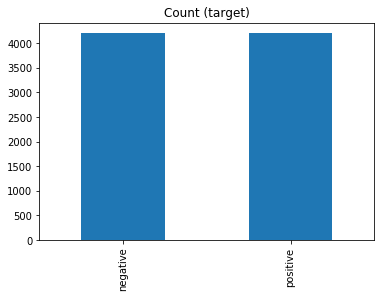

In [12]:
#Oversampling negative reviews data to balance the dataset
reviews_negative_over = reviews_negative.sample(reviews_positive.shape[0], replace=True)
reviews_over = pd.concat([reviews_positive, reviews_negative_over], axis=0, ignore_index=False)

print('Random over-sampling:')
print(reviews_over.Rating.value_counts())

reviews_over.Rating.value_counts().plot(kind='bar', title='Count (target)');

In [15]:
type(reviews_over)

pandas.core.frame.DataFrame

In [16]:
#Resetting indices to remove duplicated indices of negative reviews
reviews_over.index = range(reviews_over.shape[0])

In [17]:
#Shuffling the dataset
#Could also use .sample for this -> reviews_train_over.sample(reviews_train_over.shape[0], replace=False)
reviews_over = reviews_over.reindex(np.random.permutation(reviews_over.index), axis=0)
reviews_over

Review    Rating
2766  It was worth the trip down to Kensington. My a...  positive
3364  Food: 5\nPrice: $\nInterior: 4\n\n\nWe had lun...  positive
7391  Great late night bar with good late night food...  negative
425   This review is for the charcuterie class and t...  positive
5708  So here's the thing... the Ripley's Aquariums ...  negative
...                                                 ...       ...
2856  I've been to Tinuno multiple times and they ne...  positive
2852  About last night... What a great Filipino Kama...  positive
1999  Had to check out this place after seeing all t...  positive
7667  This place is conveniently located a couple bl...  negative
566   Bang Bang Ice Cream is the only place on my no...  positive

[8410 rows x 2 columns]

In [18]:
#No duplicated indices
reviews_over[reviews_over.index.duplicated()]

Empty DataFrame
Columns: [Review, Rating]
Index: []

In [19]:
#Using lists to balance dataset without oversampling. Ignore this...
"""#Separating positive and negative reviews
positive_rev = []
negative_rev = []
for review in review_features:
    positive_rev.append(review) if review[1] == 'positive' else negative_rev.append(review)
print(len(positive_rev))
print(len(negative_rev))

#Balancing positive and negative reviews
positive_len = len(positive_rev)
negative_len = len(negative_rev)
while(positive_len > negative_len):
    positive_rev.pop(random.randrange(len(positive_rev)))
    positive_len -= 1
print(len(positive_rev))
print(len(negative_rev))

review_features_balanced = positive_rev + negative_rev
review_features_balanced"""

"#Separating positive and negative reviews\npositive_rev = []\nnegative_rev = []\nfor review in review_features:\n    positive_rev.append(review) if review[1] == 'positive' else negative_rev.append(review)\nprint(len(positive_rev))\nprint(len(negative_rev))\n\n#Balancing positive and negative reviews\npositive_len = len(positive_rev)\nnegative_len = len(negative_rev)\nwhile(positive_len > negative_len):\n    positive_rev.pop(random.randrange(len(positive_rev)))\n    positive_len -= 1\nprint(len(positive_rev))\nprint(len(negative_rev))\n\nreview_features_balanced = positive_rev + negative_rev\nreview_features_balanced"

In [23]:
pd.set_option('display.max_colwidth', -1)
file = open("data.json", "w", encoding="utf-8")
file.write(reviews_over.to_json(orient = "records"))
file.close()

In [115]:
#Splitting review description in an array
reviews_over.Review = reviews_over.Review.apply(lambda x: x.split(' '))
reviews_over

AttributeError: 'list' object has no attribute 'split'

In [122]:
review_features_balanced_df = reviews_over

In [117]:
len(review_features_balanced_df)

8406

In [123]:
review_features_balanced = list(review_features_balanced_df.itertuples(index=False))

In [124]:
from nltk.sentiment import SentimentAnalyzer
import nltk.sentiment.util
from nltk.classify import NaiveBayesClassifier

training_docs = []
test_docs = []
training_docs = review_features_balanced[:5500]
test_docs = review_features_balanced[5500:]

print("Training: %d, Testing: %d" % (len(training_docs), len(test_docs)))

sentim_analyzer = SentimentAnalyzer()

Training: 5500, Testing: 2906


In [125]:
all_words_neg = sentim_analyzer.all_words([nltk.sentiment.util.mark_negation(doc) for doc in training_docs])
all_words_neg

['Had',
 'an',
 'absolutely',
 'fantastic',
 'time',
 'here',
 '!',
 'We',
 'had',
 'reservations',
 'for',
 '7pm',
 'on',
 'a',
 'Wednesday',
 'evening',
 'and',
 'when',
 'we',
 'arrived',
 'the',
 'place',
 'was',
 'absolutely',
 'packed.',
 'It',
 'was',
 'super',
 'loud',
 'so',
 "I'm",
 'glad',
 'we',
 'were',
 'seated',
 'near',
 'the',
 'window',
 'at',
 'the',
 'front.',
 '\n\nWe',
 'opted',
 'for',
 'a',
 'tasting',
 'menu',
 '-',
 'minimum',
 '$60',
 'per',
 'person.',
 'The',
 'server',
 'asked',
 'everyone',
 'likes/dislikes',
 'and',
 'anything',
 'that',
 'we',
 'for',
 'sure',
 'wanted',
 'to',
 'have.',
 'It',
 'was',
 'so',
 'fun',
 'to',
 'be',
 'surprised',
 'with',
 'what',
 'we',
 'were',
 'going',
 'to',
 'eat',
 'and',
 'everything',
 'was',
 'so',
 'delicious.',
 'My',
 'favourite',
 'was',
 'the',
 'foie',
 'gras.',
 'Other',
 'highlights',
 'were',
 'definitely',
 'the',
 'chips',
 'n',
 'boquerones,',
 'chorizo,',
 'manchego',
 'cheese',
 'eaten',
 'with',
 

In [126]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
sentim_analyzer.add_feat_extractor(nltk.sentiment.util.extract_unigram_feats, unigrams=unigram_feats)

In [127]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(test_docs)

In [129]:
training_set

[({'contains(the_NEG)': False, 'contains(and_NEG)': False, 'contains(the)': True, 'contains(a_NEG)': False, 'contains(and)': True, 'contains(to_NEG)': False, 'contains(was_NEG)': False, 'contains(I_NEG)': False, 'contains(a)': True, 'contains(of_NEG)': False, 'contains(I)': True, 'contains(was)': True, 'contains(to)': True, 'contains(it_NEG)': False, 'contains(for_NEG)': False, 'contains(of)': True, 'contains(is_NEG)': False, 'contains(but_NEG)': False, 'contains(is)': False, 'contains(with_NEG)': False, 'contains(for)': True, 'contains(in_NEG)': False, 'contains(The_NEG)': False, 'contains(that_NEG)': False, 'contains(_NEG)': False, 'contains(on_NEG)': False, 'contains(were_NEG)': False, 'contains(in)': False, 'contains(you_NEG)': False, 'contains(not_NEG)': False, 'contains(The)': True, 'contains(with)': True, 'contains(it)': False, 'contains(my_NEG)': False, 'contains(as_NEG)': False, 'contains(but)': False, 'contains(we_NEG)': False, 'contains(this_NEG)': False, 'contains(had_NEG)'

In [130]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
     print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.7887130075705437
F-measure [negative]: 0.7681268882175226
F-measure [positive]: 0.8059418457648546
Precision [negative]: 0.8546218487394958
Precision [positive]: 0.743006993006993
Recall [negative]: 0.6975308641975309
Recall [positive]: 0.880524861878453


<BarContainer object of 5 artists>

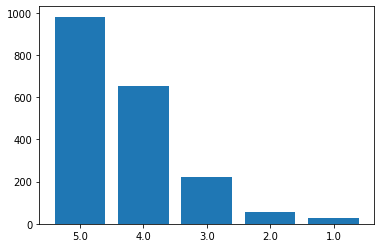

In [92]:
from collections import defaultdict

c = defaultdict(int)
for x in review_labels:
    c[x[1]] += 1

plt.bar(c.keys(), c.values())